In [1]:
import pandas as pd
train  = pd.read_csv('C:/Users\jeawo\PycharmProjects\motion/train_df.csv')
# test = pd.read_csv('/content/drive/My Drive/dacon/motion/test_df.csv')
sub = pd.read_csv('C:/Users\jeawo\PycharmProjects\motion/sample_submission.csv')

In [2]:
#glob를 활용해 이미지의 경로들을 불러옵니다.
import glob
train_paths = glob.glob('C:/Users\jeawo\PycharmProjects\motion/train_imgs/*.jpg')
print(train_paths)
# for i in train_paths:
# print(sorted(train_paths,key=lambda x: x[-25:-28]))
    # sorted(students, key=lambda student: student[2]

test_paths = glob.glob('C:/Users\jeawo\PycharmProjects\motion/test_imgs/*.jpg')
print(len(train_paths), len(test_paths))

['C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000001.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000003.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000005.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000007.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000009.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000011.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000013.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000015.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000017.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000019.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01-Z17_A-0000021.jpg', 'C:/Users\\jeawo\\PycharmProjects\\motion/train_imgs\\001-1-1-01

0
C:/Users\jeawo\PycharmProjects\motion/train_imgs\001-1-1-01-Z17_A-0000001.jpg


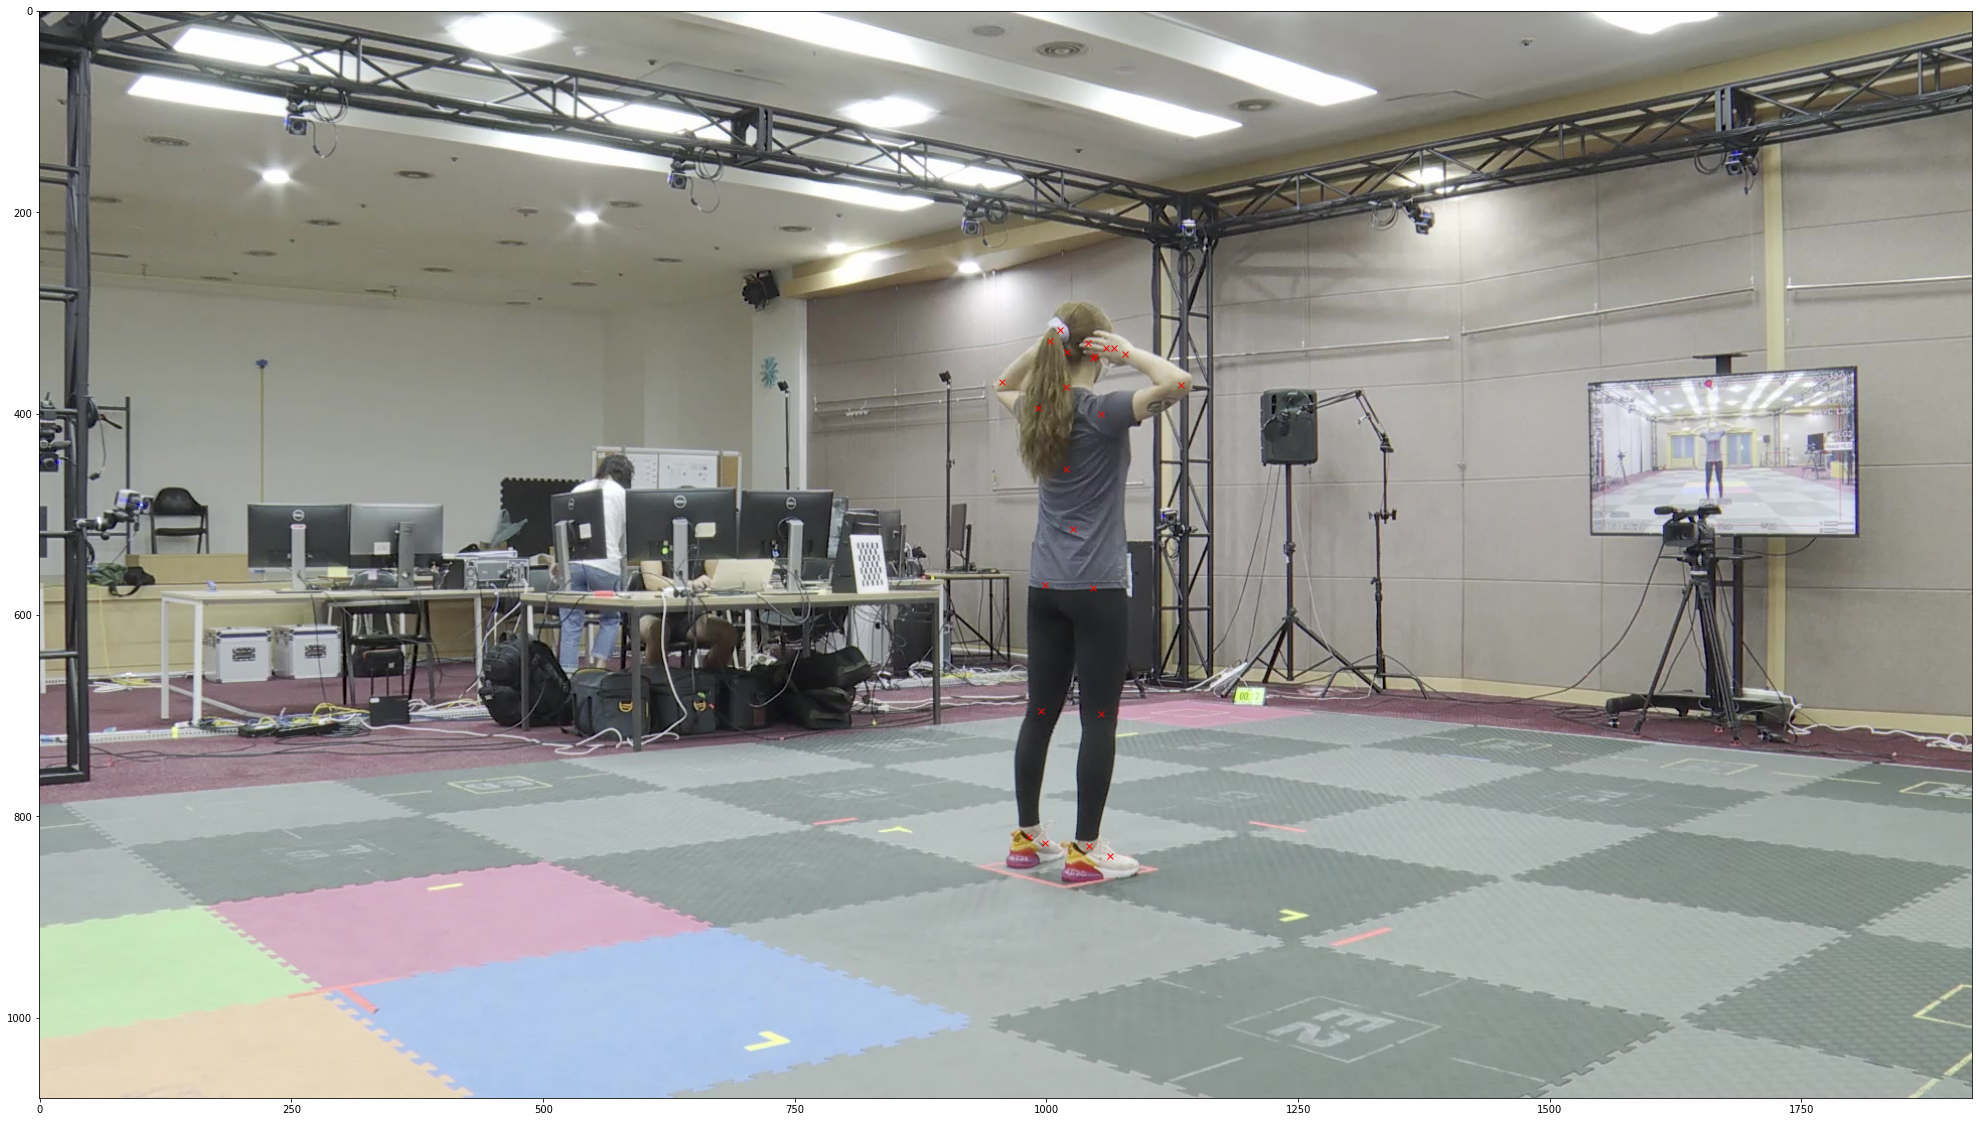

In [3]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
# from PIL import Image
import matplotlib.image as img

plt.figure(figsize=(40,20))
count=1

for i in range(0,1):
    print(i)
    # plt.subplot(3,2, count)
    
    img_sample_path = train_paths[i]
    print(img_sample_path)
    imgs =img.imread(img_sample_path)
    # print(imgs)
    # print("*"*20)
    # img_np = np.array(imgs)
    # print(img_np)
    keypoint = train.iloc[:,1:49]
    keypoint_sample = train.iloc[i,1:49] #위치키포인트 하나씩 확인
    # print(keypoint)
    # keypoint_sample = keypoint.iloc[i, :]
    
    for j in range(0,len(keypoint.columns),2):
        plt.plot(keypoint_sample[j], keypoint_sample[j+1],'rx')
        plt.imshow(imgs)
    
    count += 1

In [4]:
train['path'] = train_paths

In [5]:
import os
import cv2
from tqdm import tqdm
import tensorflow as tf

def trainGenerator():
    for i in range(len(train)):
        img = tf.io.read_file(train['path'][i]) # path(경로)를 통해 이미지 읽기
        img = tf.image.decode_jpeg(img, channels=3) # 경로를 통해 불러온 이미지를 tensor로 변환
        # print(img)
        # print('*'*100)
        img = tf.image.resize(img, [300,500]) # 이미지 resize
        print(img)
        target = train.iloc[:,1:49].iloc[i,:] # keypoint 뽑아주기
        # print(target)
        
        yield (img, target)
    
# trainGenerator = trainGenerator()
# trainGenerator
# #generator를 활용해 데이터셋 만들기        
train_dataset = tf.data.Dataset.from_generator(trainGenerator, (tf.float32, tf.float32), (tf.TensorShape([300,500,3]),tf.TensorShape([48])))
train_dataset = train_dataset.batch(32).prefetch(1)
train_dataset

<PrefetchDataset shapes: ((None, 300, 500, 3), (None, 48)), types: (tf.float32, tf.float32)>

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(300,500,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(48))

In [7]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [ ]:
model.fit(train_dataset,epochs = 10, verbose=1)

Epoch 1/10
tf.Tensor(
[[[ 88.600006  90.174     79.546005]
  [ 24.894     24.593998  25.421997]
  [ 42.36999   41.36999   48.76999 ]
  ...
  [137.12984  131.12984   98.52983 ]
  [140.3      134.3      101.7     ]
  [139.59402  133.59402  100.99403 ]]

 [[ 31.460001  29.460001  43.36    ]
  [ 71.969986  70.969986  78.44998 ]
  [143.83     143.83     143.82999 ]
  ...
  [138.6999   132.6999    96.699905]
  [139.874    133.874     97.874   ]
  [140.1      134.1       98.1     ]]

 [[ 90.11      89.11      95.69    ]
  [151.39     152.02     148.      ]
  [146.5      148.5      137.5     ]
  ...
  [141.94995  136.94995   98.94995 ]
  [143.5      138.5      100.5     ]
  [144.5      139.5      101.5     ]]

 ...

 [[231.       217.       190.      ]
  [231.       217.       190.      ]
  [232.       216.       190.      ]
  ...
  [162.94995  173.94995  165.94995 ]
  [162.65002  173.65002  165.65002 ]
  [163.44989  174.94989  166.36993 ]]

 [[231.90002  215.90002  189.90002 ]
  [231.90002  2

tf.Tensor(
[[[ 92.952     92.952     86.79201 ]
  [ 31.222     26.64      34.424   ]
  [ 39.70999   37.309994  47.20999 ]
  ...
  [136.86996  131.86996  100.01011 ]
  [139.3      133.3       99.3     ]
  [140.3      134.3       98.3     ]]

 [[ 25.816002  24.916004  38.716   ]
  [ 68.05998   67.29398   71.83999 ]
  [148.66998  149.76999  144.06999 ]
  ...
  [138.9      134.9       99.9     ]
  [141.9      135.9       99.9     ]
  [142.9      137.47995  100.320045]]

 [[ 88.77      89.479996  95.14    ]
  [149.98     150.59     145.20001 ]
  [146.55     148.1      134.55    ]
  ...
  [141.       137.       100.      ]
  [144.63     139.37     101.890015]
  [144.78998  139.78998  101.78998 ]]

 ...

 [[232.       216.       190.      ]
  [232.       216.       190.      ]
  [233.       217.       191.      ]
  ...
  [162.55005  173.55005  169.55005 ]
  [163.71997  174.71997  170.71997 ]
  [166.94989  177.94989  173.94989 ]]

 [[231.       215.       189.      ]
  [230.97401  214.97401  1

tf.Tensor(
[[[169.       170.       164.      ]
  [170.       171.       165.      ]
  [171.40001  172.40001  166.40001 ]
  ...
  [228.13277  219.96358  224.2629  ]
  [104.73999  104.47998  115.43994 ]
  [ 85.15482   87.09513  100.25504 ]]

 [[169.       170.       164.      ]
  [170.       171.       165.      ]
  [171.2      172.2      166.2     ]
  ...
  [235.7421   229.26279  235.38213 ]
  [102.26001  103.73999  114.69995 ]
  [ 86.88084   90.56101  102.56101 ]]

 [[169.       170.       164.      ]
  [170.5      171.5      165.5     ]
  [174.25     175.25     169.25    ]
  ...
  [247.65063  241.80127  246.85083 ]
  [100.609985 105.71997  114.43994 ]
  [ 88.62048   94.14075  103.14075 ]]

 ...

 [[189.87     206.16     202.29001 ]
  [185.5      201.87     197.76001 ]
  [188.25     204.70001  200.35    ]
  ...
  [193.65015  213.65015  211.65015 ]
  [196.87     216.87     214.87    ]
  [199.28998  219.28998  217.28998 ]]

 [[186.79393  202.79393  199.79393 ]
  [195.53198  211.53198  2

tf.Tensor(
[[[133.96599  140.12599  134.38599 ]
  [ 76.764     78.244     78.024   ]
  [ 47.830006  49.130005  51.230003]
  ...
  [ 61.629932  63.629932  62.629932]
  [ 61.921997  63.921997  62.921997]
  [ 65.22601   67.22601   66.22601 ]]

 [[131.202    137.362    131.622   ]
  [ 75.434     76.914     76.694   ]
  [ 47.700005  49.        51.1     ]
  ...
  [ 48.50972   50.50972   49.50972 ]
  [ 47.620026  49.620026  48.620026]
  [ 48.100006  50.100006  49.100006]]

 [[116.799995 122.96     117.22    ]
  [ 79.89001   81.37001   81.15001 ]
  [ 47.950005  49.25      51.350002]
  ...
  [ 36.849854  40.849854  39.849854]
  [ 38.73999   42.73999   41.73999 ]
  [ 42.579956  46.579956  45.579956]]

 ...

 [[127.63     138.63     130.63    ]
  [133.26     144.26     136.26    ]
  [131.5      142.5      134.5     ]
  ...
  [182.8999   189.05005  185.      ]
  [178.76001  186.26001  181.76001 ]
  [178.28998  185.78998  181.28998 ]]

 [[126.73796  138.73796  128.73796 ]
  [127.86597  139.86597  1

tf.Tensor(
[[[ 55.36      69.282005  68.508   ]
  [ 50.492     66.66      65.112   ]
  [ 49.27      70.4       68.4     ]
  ...
  [152.       157.       151.      ]
  [151.478    156.478    150.478   ]
  [150.7      155.7      149.7     ]]

 [[ 73.502     84.661995  83.08199 ]
  [ 65.965996  72.266     72.16599 ]
  [ 54.49      64.9       63.7     ]
  ...
  [150.1      155.1      149.1     ]
  [148.33401  153.33401  147.33401 ]
  [147.62196  152.62196  146.62196 ]]

 [[ 71.37      81.53      77.95    ]
  [121.139984 131.13998  127.639984]
  [159.85     173.40001  168.65001 ]
  ...
  [148.       153.       146.      ]
  [147.       152.       145.      ]
  [147.       152.       145.      ]]

 ...

 [[132.5      144.5      140.5     ]
  [132.5      144.5      140.5     ]
  [127.95     141.29999  136.85    ]
  ...
  [185.5      204.5      202.5     ]
  [185.73999  204.73999  202.73999 ]
  [186.21002  205.21002  202.21002 ]]

 [[132.85803  147.85803  140.85803 ]
  [128.28004  143.28004  1

tf.Tensor(
[[[ 57.907997  72.956     75.182   ]
  [ 51.19      65.89      68.29    ]
  [ 52.56      67.16      69.26    ]
  ...
  [155.       158.       151.      ]
  [152.26001  155.26001  148.26001 ]
  [150.874    153.874    146.874   ]]

 [[ 71.88      85.23999   85.18199 ]
  [ 63.758     69.258     72.058   ]
  [ 55.8       66.2       67.009995]
  ...
  [153.1      156.1      149.1     ]
  [150.33401  153.33401  146.33401 ]
  [149.042    152.042    145.042   ]]

 [[ 70.69      84.43      81.850006]
  [128.04999  134.54999  134.54999 ]
  [159.20001  171.80002  169.75    ]
  ...
  [150.5      153.5      146.5     ]
  [149.       152.       145.      ]
  [148.21002  151.21002  144.21002 ]]

 ...

 [[132.5      145.5      138.5     ]
  [132.87     144.87     140.87    ]
  [131.3      143.3      139.3     ]
  ...
  [185.44995  204.44995  202.44995 ]
  [185.87     204.87     202.87    ]
  [187.78998  206.78998  204.78998 ]]

 [[135.95801  147.95801  144.798   ]
  [130.38002  142.38002  1

tf.Tensor(
[[[132.       128.       125.      ]
  [132.       128.       125.      ]
  [131.       130.       128.      ]
  ...
  [133.41     151.41     158.34995 ]
  [137.58597  156.92195  168.71794 ]
  [187.18549  206.60147  218.50148 ]]

 [[132.       128.       125.      ]
  [132.       128.       125.      ]
  [130.19     129.19     127.19    ]
  ...
  [223.23022  248.94023  237.53062 ]
  [156.7062   182.74823  157.49826 ]
  [103.3508   130.6088    96.59089 ]]

 [[131.       127.       124.      ]
  [131.       127.       124.      ]
  [130.       129.       127.      ]
  ...
  [ 36.44995   57.150146  49.899902]
  [ 43.17993   59.69995   56.67993 ]
  [ 38.109802  51.73987   49.029846]]

 ...

 [[173.08     204.08     206.08    ]
  [177.91     208.91     210.91    ]
  [181.55     212.55     214.55    ]
  ...
  [250.5      236.5      210.44995 ]
  [251.       237.       210.87    ]
  [251.       237.       210.78998 ]]

 [[180.57796  211.57796  213.57796 ]
  [181.09998  212.09998  2

tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [126.11001  146.61002  153.01001 ]
  [140.86594  159.72195  167.51794 ]
  [187.64156  204.91554  214.12749 ]]

 [[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [226.33052  254.1901   236.82071 ]
  [158.7622   187.24823  161.36826 ]
  [100.32862  131.18661   98.11072 ]]

 [[129.       128.       126.      ]
  [129.       128.       126.      ]
  [130.       129.       127.      ]
  ...
  [ 38.700195  58.45044   50.100098]
  [ 43.04004   55.690063  53.06006 ]
  [ 40.710022  46.970154  51.630066]]

 ...

 [[174.29001  205.29001  207.29001 ]
  [178.01999  209.01999  211.01999 ]
  [181.35     212.35     214.35    ]
  ...
  [248.5      234.5      208.5     ]
  [250.5      236.5      210.5     ]
  [250.5      236.5      210.5     ]]

 [[181.24194  212.24194  214.24194 ]
  [181.17397  212.17397  2

tf.Tensor(
[[[ 91.01      92.29      84.176   ]
  [ 31.078001  30.518     34.244   ]
  [ 40.879993  40.909992  52.159992]
  ...
  [139.49991  133.49991   99.4999  ]
  [139.26001  133.26001   97.62402 ]
  [139.42004  133.42004   97.420044]]

 [[ 24.718002  22.776003  35.402   ]
  [ 68.25398   67.153984  75.13399 ]
  [146.93999  149.84999  141.40999 ]
  ...
  [141.7      135.7       99.7     ]
  [140.23401  134.974     97.49402 ]
  [141.942    136.942     98.942   ]]

 [[ 89.36      90.78      91.68    ]
  [151.44     155.07     142.05    ]
  [142.35     144.35     131.54999 ]
  ...
  [144.       140.       102.      ]
  [143.87     139.87     101.869995]
  [144.78998  140.78998  102.78998 ]]

 ...

 [[232.       216.       190.      ]
  [232.       216.       190.      ]
  [232.       216.       190.      ]
  ...
  [163.05005  174.05005  166.05005 ]
  [164.73999  175.73999  167.73999 ]
  [164.63007  175.63007  167.63007 ]]

 [[232.       216.       190.      ]
  [232.23401  216.23401  1

tf.Tensor(
[[[ 97.334     97.740005  95.722   ]
  [ 25.782001  24.704002  31.902   ]
  [ 38.59999   36.96999   46.76999 ]
  ...
  [138.22993  132.22993   99.62993 ]
  [138.7      132.7       96.7     ]
  [139.7      134.        97.4     ]]

 [[ 18.336004  16.336004  29.136003]
  [ 64.67399   63.67399   69.639984]
  [143.13998  143.22998  141.14    ]
  ...
  [139.7999   134.7999    96.799904]
  [141.566    136.566     98.565994]
  [142.42197  137.42197   99.42196 ]]

 [[ 89.02      88.02      95.18    ]
  [153.98001  154.61     150.46    ]
  [148.05     150.05     138.05    ]
  ...
  [141.7998   136.7998    98.59961 ]
  [144.37     138.37     102.369995]
  [145.5      139.5      104.079956]]

 ...

 [[232.       216.       190.      ]
  [232.       216.       190.      ]
  [232.       216.       190.      ]
  ...
  [163.44995  174.44995  168.44995 ]
  [162.76001  173.76001  165.76001 ]
  [164.07996  175.07996  167.07996 ]]

 [[231.90002  215.90002  189.90002 ]
  [231.90002  215.90002  1

tf.Tensor(
[[[169.       170.       164.      ]
  [170.       171.       165.      ]
  [170.1      171.1      165.1     ]
  ...
  [225.30322  217.67368  222.00333 ]
  [ 98.742065 105.29797  110.47998 ]
  [ 82.70088   88.221146  95.221146]]

 [[169.       170.       164.      ]
  [170.       171.       165.      ]
  [171.1      172.1      166.1     ]
  ...
  [236.00195  230.20215  232.10185 ]
  [100.53406  105.974    111.71399 ]
  [ 87.46079   90.4011    98.4011  ]]

 [[168.84     169.84     163.84    ]
  [170.26     171.26     165.26    ]
  [174.35     175.35     169.35    ]
  ...
  [242.85132  238.05151  239.25122 ]
  [ 95.78003  106.71997  110.21997 ]
  [ 87.46057   97.14075  102.85077 ]]

 ...

 [[187.37     203.87     199.37    ]
  [184.       200.63     195.74    ]
  [189.55     206.55     200.55    ]
  ...
  [199.55005  215.55005  214.55005 ]
  [198.5      214.5      211.5     ]
  [201.07996  217.07996  214.07996 ]]

 [[186.05391  201.05391  198.05391 ]
  [196.60597  211.60597  2

tf.Tensor(
[[[168.       170.       165.      ]
  [169.       171.       166.      ]
  [171.       173.       168.      ]
  ...
  [227.0728   222.57329  225.9727  ]
  [100.07805  105.51799  111.25798 ]
  [ 84.14075   87.48702   93.42903 ]]

 [[168.       170.       165.      ]
  [168.952    170.952    165.952   ]
  [171.1      173.1      168.1     ]
  ...
  [238.17163  233.67212  237.27173 ]
  [ 97.56006  103.       110.071976]
  [ 87.72262   90.662926  98.662926]]

 [[168.       170.       165.      ]
  [169.63     171.63     166.63    ]
  [171.15     173.15     168.15    ]
  ...
  [246.90088  241.30127  244.00098 ]
  [ 99.02002  101.609985 109.69995 ]
  [ 94.12048   95.01068  104.880615]]

 ...

 [[187.32     204.32     198.32    ]
  [186.26001  203.26001  197.26001 ]
  [190.54999  205.54999  200.54999 ]
  ...
  [197.05005  216.05005  214.05005 ]
  [195.76001  214.76001  210.76001 ]
  [200.       219.       215.      ]]

 [[187.27396  202.27396  199.27396 ]
  [196.432    211.432    2

tf.Tensor(
[[[131.68     141.26     139.42    ]
  [ 79.39601   80.87601   80.29201 ]
  [ 44.41      44.24      47.28    ]
  ...
  [ 63.409813  65.40981   64.40981 ]
  [ 64.4       66.4       65.4     ]
  [ 64.32793   66.32793   65.32793 ]]

 [[131.118    138.858    137.438   ]
  [ 76.134     79.354004  79.134   ]
  [ 51.12      52.32      57.52    ]
  ...
  [ 45.39019   47.39019   46.39019 ]
  [ 49.279984  51.279984  50.279984]
  [ 45.75608   47.75608   46.75608 ]]

 [[113.740005 121.479996 118.899994]
  [ 77.170006  80.39001   80.170006]
  [ 45.100002  46.300003  51.5     ]
  ...
  [ 38.100098  43.100098  39.100098]
  [ 39.73999   44.73999   40.73999 ]
  [ 39.579956  44.579956  40.579956]]

 ...

 [[127.       138.       130.      ]
  [133.85     144.85     136.85    ]
  [129.6      140.6      132.6     ]
  ...
  [179.       190.       184.      ]
  [177.       188.       182.      ]
  [177.       188.       182.      ]]

 [[126.26204  139.26204  130.26204 ]
  [127.06005  140.06004  1

tf.Tensor(
[[[133.98     139.98     137.38    ]
  [ 75.05801   78.53801   77.53801 ]
  [ 44.339996  46.539997  45.6     ]
  ...
  [ 60.96997   65.96997   61.96997 ]
  [ 62.361988  67.361984  61.361988]
  [ 61.573986  66.57399   60.573986]]

 [[130.502    136.082    132.082   ]
  [ 77.12601   79.12601   78.12601 ]
  [ 46.52      47.82      49.92    ]
  ...
  [ 45.09009   50.09009   46.09009 ]
  [ 47.153984  52.153984  46.153984]
  [ 45.015995  50.015995  44.015995]]

 [[119.43     124.43     120.43    ]
  [ 72.78001   74.520004  74.3     ]
  [ 45.500004  49.5       52.65    ]
  ...
  [ 34.650146  39.650146  35.650146]
  [ 36.869995  41.869995  35.869995]
  [ 39.289978  44.289978  38.289978]]

 ...

 [[128.54999  140.54999  130.54999 ]
  [132.26     144.26     134.26    ]
  [130.4      142.4      132.4     ]
  ...
  [179.5      190.5      184.5     ]
  [178.       189.       183.      ]
  [178.       189.       183.      ]]

 [[126.74002  140.74002  127.74002 ]
  [130.24606  143.72606  1

tf.Tensor(
[[[ 57.596     71.596     73.996   ]
  [ 54.326     69.544     70.168   ]
  [ 48.800003  67.6       66.53001 ]
  ...
  [151.       156.       150.      ]
  [151.       156.       150.      ]
  [150.       155.       149.      ]]

 [[ 74.065994  84.368     78.946   ]
  [ 68.897995  73.09799   72.049995]
  [ 58.72      67.909996  67.10999 ]
  ...
  [151.       156.       150.      ]
  [149.1      154.1      148.1     ]
  [148.1      153.1      147.1     ]]

 [[ 73.869995  82.770004  77.03    ]
  [127.679985 133.32999  129.19998 ]
  [157.65001  173.65001  166.15001 ]
  ...
  [149.       154.       148.      ]
  [148.       153.       147.      ]
  [147.       152.       146.      ]]

 ...

 [[131.42     143.42     141.42    ]
  [133.       145.       143.      ]
  [127.399994 142.4      139.4     ]
  ...
  [185.44995  204.44995  202.44995 ]
  [185.37     204.37     202.37    ]
  [187.       206.       204.      ]]

 [[131.95801  146.95801  141.95801 ]
  [128.40602  143.40602  1

tf.Tensor(
[[[ 55.96      72.226     74.046   ]
  [ 55.68      70.562     72.416   ]
  [ 50.93      66.93      65.93    ]
  ...
  [151.73003  156.73003  150.73003 ]
  [151.       156.       149.      ]
  [150.       155.       148.      ]]

 [[ 73.048     82.40799   83.728   ]
  [ 67.608     72.908     75.808   ]
  [ 58.54      68.92      69.73    ]
  ...
  [151.       156.       150.      ]
  [149.1      154.1      147.1     ]
  [148.1      153.1      146.1     ]]

 [[ 70.74      82.770004  78.69    ]
  [124.93999  129.93999  128.95999 ]
  [161.70001  175.20001  172.70001 ]
  ...
  [149.1001   154.1001   148.1001  ]
  [148.       153.       146.      ]
  [147.       152.       145.      ]]

 ...

 [[131.79001  143.79001  139.79001 ]
  [133.13     145.13     141.13    ]
  [128.95     140.95     136.95    ]
  ...
  [185.55005  204.55005  202.55005 ]
  [186.23999  205.23999  203.23999 ]
  [188.       207.       204.42004 ]]

 [[134.80005  147.80005  140.80005 ]
  [131.51405  144.51405  1

tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [130.43994  151.73994  156.54985 ]
  [137.25793  157.73994  168.41191 ]
  [188.81917  207.79123  221.16116 ]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [131.       130.       128.      ]
  ...
  [223.74052  249.27055  239.57076 ]
  [150.36632  176.98831  159.83835 ]
  [103.56104  132.46104  105.00305 ]]

 [[129.       128.       126.      ]
  [129.       128.       126.      ]
  [129.       128.       126.      ]
  ...
  [ 41.        59.5       49.5     ]
  [ 42.5       60.5       54.23999 ]
  [ 34.020264  51.020264  49.520264]]

 ...

 [[172.13     203.13     205.13    ]
  [176.89     207.89     209.89    ]
  [179.5      210.5      212.5     ]
  ...
  [250.       236.       209.94995 ]
  [251.       237.       210.87    ]
  [251.       237.       210.78998 ]]

 [[181.94202  212.94202  214.94202 ]
  [182.66602  213.66602  2

tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [130.       129.       127.      ]
  ...
  [124.62012  142.95015  149.71992 ]
  [141.76595  159.50395  169.93594 ]
  [185.3776   202.8776   213.3776  ]]

 [[131.       130.       128.      ]
  [131.       130.       128.      ]
  [130.       129.       127.      ]
  ...
  [233.9106   255.       241.39098 ]
  [156.26024  182.78426  156.53226 ]
  [ 97.97638  125.65825   96.53629 ]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [130.       129.       127.      ]
  ...
  [ 37.600098  55.200195  47.55005 ]
  [ 44.95996   58.589966  54.329956]
  [ 38.710022  49.630066  46.420044]]

 ...

 [[172.66     203.66     205.66    ]
  [179.65     210.65     212.65    ]
  [179.4      210.4      212.4     ]
  ...
  [249.5      235.5      209.5     ]
  [251.       237.       211.      ]
  [251.       237.       211.      ]]

 [[182.09998  213.09998  216.09998 ]
  [180.17397  211.17397  2

tf.Tensor(
[[[ 55.33      55.030003  56.27    ]
  [ 21.325996  20.025995  27.525995]
  [ 69.03998   67.06998   77.97998 ]
  ...
  [140.82983  134.82983   98.829834]
  [141.182    135.182     99.18201 ]
  [140.       134.        98.      ]]

 [[ 31.663998  29.041996  44.907997]
  [101.70598  100.63197  106.81998 ]
  [143.4      144.29999  139.89    ]
  ...
  [139.       133.        97.      ]
  [140.9      134.9       98.9     ]
  [141.9      135.9       99.9     ]]

 [[ 98.58      97.58     102.869995]
  [148.23999  149.23999  143.09    ]
  [145.05     147.05     134.25    ]
  ...
  [142.5      137.5       99.5     ]
  [144.5      139.5      101.5     ]
  [145.5      140.5      102.5     ]]

 ...

 [[232.       216.       190.      ]
  [232.       216.       190.      ]
  [232.       216.       190.      ]
  ...
  [162.3999   173.3999   165.3999  ]
  [164.10999  175.10999  167.10999 ]
  [163.78998  174.78998  166.78998 ]]

 [[232.       216.       190.      ]
  [231.       215.       1

tf.Tensor(
[[[ 51.708     53.114002  54.148003]
  [ 31.746     31.668001  42.788   ]
  [ 62.57998   60.60998   73.48998 ]
  ...
  [138.82983  132.82983   98.229836]
  [140.       134.73999   97.26001 ]
  [140.       135.        95.6     ]]

 [[ 27.536001  27.536001  38.58    ]
  [105.35599  106.515976 109.81598 ]
  [147.29     148.2      142.39    ]
  ...
  [137.82983  132.82983   94.829834]
  [141.9      136.9       98.9     ]
  [141.9      136.9       98.9     ]]

 [[ 93.93      95.64      94.509995]
  [149.61     152.61     145.35    ]
  [143.95     145.5      135.85    ]
  ...
  [144.3999   139.3999   101.19971 ]
  [143.5      137.76001  101.23999 ]
  [145.78998  139.78998  103.78998 ]]

 ...

 [[230.       216.       189.      ]
  [231.       217.       190.      ]
  [232.       216.       190.      ]
  ...
  [159.7002   170.7002   164.7002  ]
  [164.       175.       170.73999 ]
  [164.15991  174.86993  171.73987 ]]

 [[232.90002  216.90002  190.90002 ]
  [231.90002  215.90002  1

tf.Tensor(
[[[ 50.658005  56.518     51.884003]
  [ 28.576     29.056     34.162003]
  [ 57.31998   56.149982  63.119984]
  ...
  [137.       131.        97.14014 ]
  [140.73999  134.73999  100.296   ]
  [140.17398  134.17398   98.17399 ]]

 [[ 30.689999  34.227997  43.469997]
  [102.237976 102.95198  106.583984]
  [144.87     145.58     140.86    ]
  ...
  [139.8099   133.8099    98.01011 ]
  [142.63998  136.63998  100.63999 ]
  [142.47995  136.47995  100.47996 ]]

 [[ 88.28999   93.869995  90.45    ]
  [150.33     153.07     142.55    ]
  [143.95001  146.25     131.45    ]
  ...
  [143.3999   137.3999   101.3999  ]
  [144.       138.       102.      ]
  [145.5      139.5      103.5     ]]

 ...

 [[231.       217.       190.      ]
  [232.       218.       191.      ]
  [232.       216.       190.      ]
  ...
  [163.       174.       168.      ]
  [163.87     174.87     168.87    ]
  [164.84009  175.84009  169.84009 ]]

 [[232.       216.       190.      ]
  [231.64003  215.64003  1

tf.Tensor(
[[[169.87401  170.87401  164.87401 ]
  [169.778    170.778    164.778   ]
  [169.1      172.1      165.1     ]
  ...
  [229.95268  223.39311  229.79253 ]
  [104.000046 106.43999  117.43999 ]
  [ 86.61473   91.134995 103.120926]]

 [[169.522    170.522    164.522   ]
  [169.234    170.234    164.234   ]
  [171.       174.       167.      ]
  ...
  [238.62167  233.93198  237.81168 ]
  [100.56006  105.73999  115.21997 ]
  [ 91.20066   95.720924 107.30088 ]]

 [[170.13     171.13     165.13    ]
  [169.02     170.02     164.02    ]
  [173.1      176.1      169.1     ]
  ...
  [250.95044  245.20068  248.8003  ]
  [100.76001  106.67993  115.04993 ]
  [ 92.57037   97.7207   108.46057 ]]

 ...

 [[189.16     204.16     199.16    ]
  [186.76     201.76     196.76    ]
  [189.95     204.95     199.95    ]
  ...
  [197.5      216.5      214.5     ]
  [196.5      215.5      213.5     ]
  [198.86993  217.86993  215.86993 ]]

 [[185.57388  200.57388  197.57388 ]
  [194.90002  209.90002  2

tf.Tensor(
[[[168.174    170.768    164.58    ]
  [166.95999  172.038    164.804   ]
  [166.57     171.84     164.03    ]
  ...
  [233.22226  227.39282  233.55229 ]
  [100.82007  106.18201  112.6     ]
  [ 86.47465   89.414955  96.57487 ]]

 [[168.478    171.478    164.478   ]
  [166.74     172.74     162.74    ]
  [168.2      174.2      164.2     ]
  ...
  [241.32149  236.82198  242.22139 ]
  [ 99.50806  104.76599  112.73999 ]
  [ 89.78062   92.720924 101.88084 ]]

 [[168.       171.       163.16    ]
  [168.26     174.26     163.74    ]
  [169.6      175.6      163.8     ]
  ...
  [249.85034  244.25073  249.40039 ]
  [102.28003  105.23999  115.45996 ]
  [ 94.57037   95.830505 107.62048 ]]

 ...

 [[191.58     207.16     201.87    ]
  [187.63     203.       200.      ]
  [188.20001  203.65     200.65    ]
  ...
  [198.7998   217.7998   214.7998  ]
  [195.13     214.13     210.13    ]
  [198.5      217.5      215.5     ]]

 [[187.23785  202.23785  197.23785 ]
  [195.1659   210.1659   2

tf.Tensor(
[[[129.734    140.474    136.054   ]
  [ 82.576004  83.536     81.576004]
  [ 45.27      46.57      48.67    ]
  ...
  [ 63.839844  65.83984   64.83984 ]
  [ 63.66001   65.66001   64.66001 ]
  [ 64.85991   66.85991   65.85991 ]]

 [[127.202    137.36201  132.942   ]
  [ 83.146     84.62601   82.406006]
  [ 43.170002  46.9       48.19    ]
  ...
  [ 50.889896  52.889896  51.889896]
  [ 50.565994  52.565994  51.565994]
  [ 52.000004  54.000004  53.000004]]

 [[116.14     123.88     120.46    ]
  [ 86.07001   90.81001   87.59001 ]
  [ 43.9       49.05      49.75    ]
  ...
  [ 38.5       40.5       39.5     ]
  [ 39.869995  41.869995  40.869995]
  [ 42.289978  44.289978  43.289978]]

 ...

 [[127.5      138.5      130.5     ]
  [133.02     144.02     136.02    ]
  [131.95     142.95     134.95    ]
  ...
  [179.44995  189.55005  184.      ]
  [177.87     188.13     182.5     ]
  [177.78998  188.21002  182.5     ]]

 [[127.27803  138.27803  130.27803 ]
  [131.86009  142.86009  1

tf.Tensor(
[[[129.954    137.694    133.954   ]
  [ 81.952     85.172005  84.952   ]
  [ 45.56      46.86      48.76    ]
  ...
  [ 64.62993   66.62993   65.62993 ]
  [ 63.        65.        64.      ]
  [ 63.80597   65.80597   64.80597 ]]

 [[126.184    133.92401  130.184   ]
  [ 81.98801   85.20801   84.98801 ]
  [ 43.72      45.019997  46.92    ]
  ...
  [ 47.11011   49.11011   48.11011 ]
  [ 47.63999   49.63999   48.63999 ]
  [ 49.158     51.158     50.158   ]]

 [[122.86     128.02     125.28    ]
  [ 85.590004  87.33001   87.11001 ]
  [ 46.300003  47.6       49.5     ]
  ...
  [ 39.5       41.5       40.5     ]
  [ 42.47998   44.47998   43.47998 ]
  [ 42.5       44.5       43.5     ]]

 ...

 [[127.5      138.5      130.5     ]
  [131.02     142.02     134.02    ]
  [131.5      142.5      134.5     ]
  ...
  [179.8999   190.8999   184.8999  ]
  [177.       188.       182.      ]
  [177.       188.       182.      ]]

 [[126.75602  139.75601  130.75601 ]
  [129.02013  142.02013  1

tf.Tensor(
[[[131.212    142.772    135.092   ]
  [ 83.200005  88.68001   85.46001 ]
  [ 48.73      50.360004  50.47    ]
  ...
  [ 63.96987   65.96987   64.96987 ]
  [ 63.47998   65.47998   64.47998 ]
  [ 65.95203   67.95203   66.95203 ]]

 [[130.984    141.144    137.564   ]
  [ 85.48601   88.854004  88.56001 ]
  [ 49.19      50.19      52.19    ]
  ...
  [ 49.89019   51.89019   50.89019 ]
  [ 48.16001   50.16001   49.16001 ]
  [ 50.94201   52.94201   51.94201 ]]

 [[119.8      125.8      125.8     ]
  [ 84.83      88.05      89.31001 ]
  [ 48.9       50.199997  52.1     ]
  ...
  [ 38.100098  42.100098  41.100098]
  [ 38.52002   42.52002   41.52002 ]
  [ 40.130066  44.130066  43.130066]]

 ...

 [[126.71     137.70999  129.70999 ]
  [131.13     142.13     134.13    ]
  [129.95     140.95     132.95    ]
  ...
  [178.5      189.5      183.5     ]
  [178.       189.       183.      ]
  [177.       188.       182.      ]]

 [[131.45813  143.45813  133.45813 ]
  [132.46019  144.46019  1

tf.Tensor(
[[[ 51.488     69.7       68.993996]
  [ 53.781998  67.782     70.182   ]
  [ 50.530003  66.64      68.87    ]
  ...
  [152.       157.       151.      ]
  [151.       156.       150.      ]
  [151.       156.       150.      ]]

 [[ 72.7       83.86      82.28    ]
  [ 63.991997  70.19199   70.392   ]
  [ 53.020004  67.4       67.21    ]
  ...
  [150.1      155.1      149.1     ]
  [148.1      153.1      147.1     ]
  [148.1      153.1      147.1     ]]

 [[ 70.43      85.33      80.17    ]
  [125.41998  128.68     127.679985]
  [159.85     173.6      169.00002 ]
  ...
  [147.1001   152.1001   146.1001  ]
  [147.       152.       146.      ]
  [146.       151.       145.      ]]

 ...

 [[132.70999  144.70999  142.13    ]
  [132.87     144.87     142.13    ]
  [129.4      141.4      139.4     ]
  ...
  [186.       205.       201.      ]
  [184.87     203.87     199.87    ]
  [187.       206.       202.      ]]

 [[134.90002  147.90002  140.90002 ]
  [131.28004  144.28004  1

tf.Tensor(
[[[ 53.112     70.078     69.098   ]
  [ 52.236     68.236     67.717995]
  [ 52.54      66.979996  68.51    ]
  ...
  [152.       157.       150.      ]
  [149.6      155.6      145.6     ]
  [150.       156.       146.      ]]

 [[ 68.58199   82.26399   80.69799 ]
  [ 62.843998  71.044     72.96999 ]
  [ 53.2       67.2       67.39    ]
  ...
  [150.1      155.1      148.1     ]
  [151.134    157.134    147.134   ]
  [149.9      155.9      145.9     ]]

 [[ 65.369995  84.479996  78.53    ]
  [126.679985 132.41998  130.54999 ]
  [162.6      174.75     170.70001 ]
  ...
  [149.       155.       145.      ]
  [149.       154.       147.      ]
  [148.       153.       146.      ]]

 ...

 [[132.5      144.5      140.5     ]
  [132.5      144.5      140.5     ]
  [130.4      142.4      140.4     ]
  ...
  [184.94995  203.94995  201.94995 ]
  [187.37     206.37     204.37    ]
  [187.92004  206.92004  203.92004 ]]

 [[133.32002  146.32002  139.32002 ]
  [130.30605  143.30605  1

tf.Tensor(
[[[130.7      129.7      127.7     ]
  [131.7      130.7      128.7     ]
  [130.       129.       127.      ]
  ...
  [127.779396 147.77939  151.11934 ]
  [146.22787  165.00989  174.31987 ]
  [196.149    213.79698  225.80893 ]]

 [[130.       129.       127.      ]
  [129.766    128.766    126.766   ]
  [130.       129.       127.      ]
  ...
  [205.0112   229.17116  210.29156 ]
  [131.66623  157.31422  129.88626 ]
  [ 83.09067  110.09067   75.17467 ]]

 [[129.       128.       126.      ]
  [129.       128.       126.      ]
  [130.       129.       127.      ]
  ...
  [ 38.800293  55.800293  43.650146]
  [ 45.150024  60.910034  55.26001 ]
  [ 31.280396  47.280396  39.780396]]

 ...

 [[176.08     207.08     209.08    ]
  [178.02     209.02     211.02    ]
  [180.9      211.9      214.9     ]
  ...
  [248.5      234.5      207.5     ]
  [251.       237.       210.      ]
  [251.       237.       210.      ]]

 [[178.34192  209.34192  211.34192 ]
  [180.40796  211.40796  2

tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [130.33965  150.60971  155.59952 ]
  [149.28586  173.14384  182.56184 ]
  [193.28143  219.95137  232.8373  ]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [130.       129.       127.      ]
  ...
  [209.4315   236.01167  218.52179 ]
  [140.15619  166.67221  142.84424 ]
  [ 87.152275 112.63032   83.19236 ]]

 [[129.       128.       126.      ]
  [129.       128.       126.      ]
  [130.       129.       127.      ]
  ...
  [ 43.499023  61.549072  54.398926]
  [ 38.28003   51.930054  52.390015]
  [ 40.029846  48.369934  56.609802]]

 ...

 [[175.63     206.63     208.63    ]
  [179.15     210.15     212.15    ]
  [181.9      212.9      214.9     ]
  ...
  [250.       236.       210.      ]
  [251.       237.       211.      ]
  [251.       237.       211.      ]]

 [[180.57796  211.57796  213.57796 ]
  [181.       212.       2

tf.Tensor(
[[[131.7      130.7      126.7     ]
  [131.7      130.7      126.7     ]
  [132.       131.       127.      ]
  ...
  [129.15996  148.15996  157.45987 ]
  [148.97987  168.20187  182.05388 ]
  [198.26971  218.16566  230.06566 ]]

 [[130.       129.       125.      ]
  [130.       129.       125.      ]
  [131.       130.       126.      ]
  ...
  [206.51169  235.02159  216.79205 ]
  [131.18219  159.97818  131.27621 ]
  [ 86.46443  112.59045   84.59236 ]]

 [[130.       129.       125.      ]
  [130.       129.       125.      ]
  [130.       129.       125.      ]
  ...
  [ 41.600098  59.85034   55.      ]
  [ 40.869995  56.76001   58.369995]
  [ 36.020264  50.940308  54.730286]]

 ...

 [[175.79001  206.79001  208.79001 ]
  [180.89     211.89     213.89    ]
  [180.45     211.45     213.45    ]
  ...
  [248.5      236.5      210.5     ]
  [250.       238.       212.      ]
  [250.       238.       212.      ]]

 [[179.09998  213.09998  214.09998 ]
  [178.19995  212.19995  2

tf.Tensor(
[[[ 55.794003  56.200005  54.182003]
  [ 29.592     29.888     36.334   ]
  [ 58.35998   58.86998   67.12998 ]
  ...
  [140.62993  134.62993   98.62993 ]
  [140.       134.        98.      ]
  [141.       135.        99.      ]]

 [[ 29.84      27.84      38.840004]
  [112.46597  111.69998  116.071976]
  [157.76001  158.96     150.97002 ]
  ...
  [139.87997  133.87997   97.87998 ]
  [141.9      135.9       99.9     ]
  [142.9      136.9      100.9     ]]

 [[ 96.        96.        97.16    ]
  [149.72     151.35     141.20001 ]
  [145.1      148.1      131.1     ]
  ...
  [143.44995  139.44995  102.44995 ]
  [144.37     140.37     103.369995]
  [145.28998  141.28998  104.28998 ]]

 ...

 [[231.       217.       190.      ]
  [231.       217.       190.      ]
  [231.       215.       189.      ]
  ...
  [167.       173.       169.      ]
  [164.39001  174.87     169.13    ]
  [163.05011  174.05011  168.05011 ]]

 [[232.90002  216.90002  190.90002 ]
  [232.90002  216.90002  1

tf.Tensor(
[[[ 60.428     59.134003  59.430004]
  [ 31.320002  28.438002  39.548   ]
  [ 62.449986  60.079987  68.84999 ]
  ...
  [137.92993  131.92993   96.13013 ]
  [140.51799  134.51799   98.51799 ]
  [142.       137.        99.      ]]

 [[ 28.116     27.116     41.115997]
  [108.87198  110.031975 113.183975]
  [145.45     148.54     137.63    ]
  ...
  [138.6999   132.6999    96.699905]
  [141.874    135.874     99.874   ]
  [143.858    138.858    100.857994]]

 [[ 90.19      93.19      85.770004]
  [150.94     153.92     142.2     ]
  [143.1      144.1      138.1     ]
  ...
  [144.       139.       101.      ]
  [144.5      138.76001  102.23999 ]
  [145.5      139.5      103.5     ]]

 ...

 [[231.       217.       190.      ]
  [231.       217.       190.      ]
  [232.       216.       190.      ]
  ...
  [162.5      173.5      166.3999  ]
  [165.       176.       168.73999 ]
  [164.5      175.5      168.07996 ]]

 [[231.90002  215.90002  189.90002 ]
  [232.80005  216.80005  1

      6/Unknown - 525s 85s/step - loss: 35703.3320 - mae: 149.3620tf.Tensor(
[[[166.       171.       164.      ]
  [167.       172.       165.      ]
  [167.7      172.7      165.7     ]
  ...
  [236.28203  226.09282  233.55229 ]
  [ 99.742065 103.66199  115.40198 ]
  [ 85.01473   89.534996 103.09491 ]]

 [[166.       171.       164.      ]
  [167.       172.       165.      ]
  [167.20001  172.20001  165.20001 ]
  ...
  [244.8311   235.5418   243.0313  ]
  [ 98.46006  103.63999  111.83999 ]
  [ 87.72262   92.662926 103.402794]]

 [[167.58     169.42     163.      ]
  [169.26     172.26     165.26    ]
  [172.       177.       170.      ]
  ...
  [250.05054  244.90088  248.60059 ]
  [ 97.76001  105.19995  110.19995 ]
  [ 91.730286  97.25055  103.41046 ]]

 ...

 [[189.74     205.74     203.58    ]
  [185.74     201.74     198.74    ]
  [187.1      203.20001  199.9     ]
  ...
  [198.05005  214.05005  213.05005 ]
  [197.5      213.5      212.5     ]
  [200.07996  216.07996  215.07996 ]

tf.Tensor(
[[[166.6      169.6      159.44    ]
  [167.6      170.6      162.12001 ]
  [170.       173.       166.      ]
  ...
  [233.8523   225.3628   230.0625  ]
  [104.04004  106.       114.73999 ]
  [ 85.686806  93.52689  101.94694 ]]

 [[167.9      170.9      160.73999 ]
  [168.9      171.9      163.42    ]
  [170.1      173.1      166.1     ]
  ...
  [240.60156  234.73198  238.52168 ]
  [101.474045 104.1      112.83999 ]
  [ 87.46079   95.30088  103.720924]]

 [[168.       171.       160.84    ]
  [169.26     172.26     163.78    ]
  [173.45     176.45     169.45    ]
  ...
  [249.15063  244.00098  247.70068 ]
  [100.04004  105.21997  113.21997 ]
  [ 90.36035   96.46057  105.46057 ]]

 ...

 [[189.16     206.16     199.16    ]
  [183.52     200.52     193.78    ]
  [189.54999  206.5      200.65    ]
  ...
  [201.05005  217.05005  216.05005 ]
  [198.37     214.37     213.37    ]
  [200.78998  216.78998  215.78998 ]]

 [[187.45792  202.45792  197.45792 ]
  [196.95201  211.95201  2

tf.Tensor(
[[[132.14601  139.406    134.98601 ]
  [ 77.422005  83.422005  81.422005]
  [ 42.33      46.33      47.33    ]
  ...
  [ 60.8001    64.800095  63.8001  ]
  [ 61.43999   65.43999   64.43999 ]
  [ 60.753944  64.753944  63.753944]]

 [[129.3      136.56     132.14    ]
  [ 79.19401   85.19401   83.19401 ]
  [ 43.1       47.1       48.1     ]
  ...
  [ 46.210014  50.210014  49.210014]
  [ 47.234013  51.234013  50.234013]
  [ 49.958     53.958     52.958   ]]

 [[121.38     128.64     124.22    ]
  [ 83.07001   89.07001   87.07001 ]
  [ 45.25      49.25      50.25    ]
  ...
  [ 38.650146  42.650146  41.650146]
  [ 38.869995  42.869995  41.869995]
  [ 38.710022  42.710022  41.710022]]

 ...

 [[127.13     138.13     130.13    ]
  [130.51999  141.51999  133.51999 ]
  [130.95     141.95     133.95    ]
  ...
  [181.8999   188.05005  184.      ]
  [181.       187.39001  183.26001 ]
  [181.15991  187.78998  183.57996 ]]

 [[127.74002  139.74002  129.74002 ]
  [130.17403  142.17403  1

tf.Tensor(
[[[131.3      141.88     133.88    ]
  [ 83.240005  86.46001   86.240005]
  [ 47.469997  48.469997  52.469997]
  ...
  [ 62.439747  66.43974   65.43974 ]
  [ 61.361988  65.361984  64.361984]
  [ 64.385925  68.385925  67.385925]]

 [[128.824    138.404    131.664   ]
  [ 81.80801   85.02801   84.80801 ]
  [ 52.81      54.109997  58.01    ]
  ...
  [ 46.770367  50.770367  49.770367]
  [ 51.63999   55.63999   54.63999 ]
  [ 48.94201   52.94201   51.94201 ]]

 [[126.11     133.85     129.27    ]
  [ 79.61001   82.83001   82.61001 ]
  [ 47.9       49.199997  51.1     ]
  ...
  [ 38.750244  42.750244  41.750244]
  [ 38.73999   42.73999   41.73999 ]
  [ 41.710022  45.710022  44.710022]]

 ...

 [[129.5      140.5      132.5     ]
  [131.63     142.63     134.63    ]
  [131.05     142.05     134.05    ]
  ...
  [178.5      189.5      183.5     ]
  [178.       189.       183.      ]
  [177.       188.       182.      ]]

 [[126.42     139.42     129.42    ]
  [129.46606  142.46606  1

tf.Tensor(
[[[ 58.58      69.768     68.174   ]
  [ 53.224     69.144     68.548004]
  [ 52.260002  69.630005  69.86    ]
  ...
  [151.       156.       150.      ]
  [150.7      155.7      149.7     ]
  [150.7      155.7      149.7     ]]

 [[ 71.35599   85.09599   82.51599 ]
  [ 60.525997  70.673996  71.6     ]
  [ 52.9       63.93      65.920006]
  ...
  [150.01001  155.01001  149.01001 ]
  [149.33401  154.33401  148.33401 ]
  [148.042    153.042    147.042   ]]

 [[ 71.22      80.380005  81.8     ]
  [123.28998  132.54999  131.54999 ]
  [158.05002  173.1      170.1     ]
  ...
  [149.       154.       148.      ]
  [148.63     153.63     147.63    ]
  [148.       153.       147.      ]]

 ...

 [[133.84     145.84     141.84    ]
  [132.87     144.87     140.87    ]
  [129.9      141.9      137.9     ]
  ...
  [185.5      204.5      202.5     ]
  [187.23999  203.23999  202.23999 ]
  [190.5      206.5      204.5     ]]

 [[133.378    145.378    141.378   ]
  [131.04604  143.04604  1

tf.Tensor(
[[[ 57.258     71.064     69.498   ]
  [ 58.904     69.682     72.046   ]
  [ 55.3       70.67      72.560005]
  ...
  [152.       157.       151.      ]
  [150.       155.       149.      ]
  [151.       153.       148.      ]]

 [[ 70.696     81.855995  81.116   ]
  [ 66.87599   72.93      75.57    ]
  [ 54.059998  70.09      69.08    ]
  ...
  [150.1      155.1      149.1     ]
  [148.1      153.1      147.1     ]
  [149.1      151.1      146.1     ]]

 [[ 69.53      83.85      83.270004]
  [125.80998  128.69998  130.06998 ]
  [160.95001  173.25     169.15002 ]
  ...
  [149.       154.       147.      ]
  [147.       152.       145.      ]
  [148.       151.       144.      ]]

 ...

 [[133.       145.       141.      ]
  [133.       145.       141.      ]
  [128.6      141.95     137.5     ]
  ...
  [186.       205.       203.      ]
  [186.73999  205.73999  203.73999 ]
  [187.5      206.5      204.5     ]]

 [[133.06003  148.06003  141.06003 ]
  [130.38002  145.38002  1

tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [129.13022  148.13022  153.0002  ]
  [154.27988  172.46188  182.07187 ]
  [200.81917  217.54922  229.56117 ]]

 [[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [214.38068  234.9106   221.08087 ]
  [137.9501   160.67612  132.96213 ]
  [ 89.85036  113.80835   81.934364]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [130.       129.       127.      ]
  ...
  [ 38.14966   55.64966   46.449463]
  [ 35.54004   52.04004   47.04004 ]
  [ 31.210022  47.710022  41.630066]]

 ...

 [[174.       205.       207.      ]
  [179.52     210.52     212.52    ]
  [180.45     211.45     214.45    ]
  ...
  [251.       237.       210.      ]
  [251.       237.       210.      ]
  [251.       237.       210.      ]]

 [[181.32002  211.32002  213.32002 ]
  [182.35997  212.35997  2

tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [125.88999  147.48999  155.18999 ]
  [149.07593  170.26791  182.53792 ]
  [203.32962  223.98953  236.2955  ]]

 [[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [202.80157  232.50177  210.50208 ]
  [132.92816  157.94418  128.89218 ]
  [ 83.98831  107.88831   76.18831 ]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [129.55     128.55     126.55    ]
  ...
  [ 39.849854  56.600098  46.      ]
  [ 46.52002   58.02002   52.890015]
  [ 37.76013   47.26013   46.55011 ]]

 ...

 [[172.5      203.5      205.5     ]
  [178.52     209.52     211.52    ]
  [181.29999  212.29999  214.29999 ]
  ...
  [250.       236.       210.      ]
  [251.       237.       211.      ]
  [251.       237.       211.      ]]

 [[180.51997  211.51997  213.51997 ]
  [180.66602  211.66602  2

tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [127.98999  147.95976  154.65987 ]
  [149.9299   169.63391  180.5439  ]
  [197.44539  217.10147  229.00148 ]]

 [[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [201.47194  228.27203  210.9424  ]
  [132.53018  159.22421  133.17023 ]
  [ 81.92435  110.68234   79.76635 ]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [130.       129.       127.      ]
  ...
  [ 37.5       59.05005   53.349854]
  [ 39.76001   57.150024  55.52002 ]
  [ 36.        50.05011   48.55011 ]]

 ...

 [[173.5      204.5      206.5     ]
  [178.52     209.52     211.52    ]
  [180.35     211.35     213.35    ]
  ...
  [250.44995  236.44995  210.44995 ]
  [251.       237.       211.      ]
  [251.       237.       211.      ]]

 [[181.05798  212.05798  215.05798 ]
  [179.97401  210.97401  2

tf.Tensor(
[[[ 36.74      38.440002  37.616   ]
  [ 30.991999  28.991999  41.73    ]
  [ 82.97998   81.27998   93.179985]
  ...
  [139.22993  135.22993   98.37007 ]
  [138.3      134.3       97.078   ]
  [139.57996  135.57996   97.873985]]

 [[ 39.153996  38.153996  55.197994]
  [124.61198  123.84598  127.749985]
  [149.1      150.01     144.20001 ]
  ...
  [140.8999   135.7998    98.      ]
  [141.926    136.926     98.926   ]
  [143.47995  138.47995  100.47996 ]]

 [[ 93.47      94.47      98.34    ]
  [147.54001  148.17     144.15    ]
  [146.05     148.05     137.05    ]
  ...
  [144.44995  139.44995  101.44995 ]
  [145.       140.       100.52002 ]
  [147.       142.       102.      ]]

 ...

 [[232.       216.       190.      ]
  [232.       216.       190.      ]
  [232.       216.       190.      ]
  ...
  [160.2998   173.2998   165.1997  ]
  [162.76001  175.76001  167.5     ]
  [164.73987  177.73987  169.31982 ]]

 [[231.       215.       189.      ]
  [229.90002  213.90002  1

      8/Unknown - 710s 87s/step - loss: 33434.4023 - mae: 144.8630tf.Tensor(
[[[ 36.132004  41.238     35.672   ]
  [ 30.603998  31.122     37.932   ]
  [ 82.25999   80.65999   89.82999 ]
  ...
  [138.26997  133.1999    95.34004 ]
  [139.26001  134.26001   95.81602 ]
  [139.57996  134.57996   95.168015]]

 [[ 33.657997  35.657997  48.28    ]
  [124.209984 125.36998  128.49597 ]
  [149.51     150.42     144.6     ]
  ...
  [140.7999   135.7999    96.0001  ]
  [140.76599  135.76599   95.76599 ]
  [143.       138.        98.      ]]

 [[ 95.       100.        93.5     ]
  [152.07     155.70001  142.81    ]
  [145.2      147.2      134.29999 ]
  ...
  [142.44995  139.44995   98.44995 ]
  [143.5      140.5       98.02002 ]
  [144.5      141.5       98.5     ]]

 ...

 [[230.       216.       189.      ]
  [231.       217.       190.      ]
  [230.       216.       189.      ]
  ...
  [162.6001   173.7002   166.55005 ]
  [162.37     173.63     168.23999 ]
  [164.5      175.71002  171.28998 ]

tf.Tensor(
[[[169.       170.       165.      ]
  [170.       171.       166.      ]
  [171.       172.       167.      ]
  ...
  [238.31168  230.12256  237.18193 ]
  [ 99.26011  107.66199  114.18201 ]
  [ 90.51495   90.72903  101.67509 ]]

 [[169.       170.       164.      ]
  [170.       171.       165.      ]
  [171.19     172.19     166.19    ]
  ...
  [243.66104  238.17163  242.04121 ]
  [ 98.38606  106.75195  113.24597 ]
  [ 91.56462   93.5448   103.864845]]

 [[169.       170.       164.      ]
  [170.26     171.26     165.26    ]
  [172.15     173.15     167.15    ]
  ...
  [252.3003   248.15063  251.3003  ]
  [ 99.04004  106.47998  113.47998 ]
  [ 90.07037   95.04053  104.46057 ]]

 ...

 [[193.29001  205.29001  201.29001 ]
  [188.39     202.28     197.65    ]
  [187.55     204.75     198.75    ]
  ...
  [197.1001   216.1001   214.1001  ]
  [195.34998  214.34998  212.34998 ]
  [199.94989  218.94989  216.94989 ]]

 [[187.31595  202.31595  199.31595 ]
  [195.506    210.506    2

tf.Tensor(
[[[168.       171.       162.      ]
  [169.       172.       163.      ]
  [170.       173.       164.      ]
  ...
  [238.4418   230.08243  234.68204 ]
  [100.56006  105.47998  112.95996 ]
  [ 85.34863   92.7689   102.62881 ]]

 [[168.       171.       162.      ]
  [169.       172.       163.      ]
  [171.       174.       165.      ]
  ...
  [244.8311   239.2415   242.94121 ]
  [ 99.04004  105.69995  114.29195 ]
  [ 83.7207    93.82092  103.980835]]

 [[167.29001  170.29001  163.29001 ]
  [169.13     172.13     165.13    ]
  [174.1      177.1      170.1     ]
  ...
  [249.8003   246.60059  248.8003  ]
  [ 99.78003  104.95996  113.69995 ]
  [ 92.41046   96.51068  108.880615]]

 ...

 [[194.5      207.5      200.5     ]
  [188.24     202.5      196.01999 ]
  [189.54999  204.54999  199.54999 ]
  ...
  [197.05005  216.05005  214.05005 ]
  [196.60999  215.60999  213.60999 ]
  [199.28998  218.28998  216.28998 ]]

 [[186.93793  201.93793  196.93793 ]
  [197.09998  212.09998  2

tf.Tensor(
[[[130.448    134.448    133.448   ]
  [ 82.02001   86.02001   85.02001 ]
  [ 44.64      48.64      49.64    ]
  ...
  [ 59.56997   63.56997   62.56997 ]
  [ 63.17998   67.17998   66.17998 ]
  [ 64.97996   68.97996   67.97996 ]]

 [[133.358    137.358    136.358   ]
  [ 84.968     88.968     87.968   ]
  [ 45.48      49.48      50.48    ]
  ...
  [ 46.180084  50.180084  49.180084]
  [ 47.739994  51.739994  50.739994]
  [ 47.679962  51.679962  50.679962]]

 [[122.62     126.62     125.62    ]
  [ 88.18001   92.18001   91.18001 ]
  [ 47.6       51.6       52.6     ]
  ...
  [ 38.94995   42.94995   41.94995 ]
  [ 39.369995  43.369995  42.369995]
  [ 40.5       44.5       43.5     ]]

 ...

 [[128.70999  139.70999  131.70999 ]
  [130.76     141.76     133.76    ]
  [131.35     142.35     134.35    ]
  ...
  [178.44995  189.44995  183.44995 ]
  [178.13     187.13     182.13    ]
  [179.07996  185.71002  181.5     ]]

 [[127.317986 138.31798  130.31798 ]
  [129.714    140.714    1

tf.Tensor(
[[[129.314    140.054    136.474   ]
  [ 83.09801   86.05801   85.31801 ]
  [ 50.340004  50.440002  52.440002]
  ...
  [ 61.370068  65.37007   64.37007 ]
  [ 59.96001   63.96001   62.96001 ]
  [ 62.553944  66.55394   65.55394 ]]

 [[126.981995 137.142    131.562   ]
  [ 87.354004  91.574005  88.354004]
  [ 50.699997  51.609997  53.809998]
  ...
  [ 49.800003  53.800003  52.800003]
  [ 50.279984  54.279984  53.279984]
  [ 50.798088  54.798088  53.798088]]

 [[122.990005 129.99     122.990005]
  [ 88.83001   93.05001   89.83001 ]
  [ 44.6       45.899998  48.      ]
  ...
  [ 39.55005   43.55005   42.55005 ]
  [ 41.109985  45.109985  44.109985]
  [ 42.5       46.5       45.5     ]]

 ...

 [[126.84     137.84     129.84    ]
  [132.23999  143.23999  135.23999 ]
  [131.55     142.55     134.55    ]
  ...
  [179.5      190.5      184.5     ]
  [178.5      189.5      183.5     ]
  [178.5      189.5      183.5     ]]

 [[127.32002  139.32002  129.32002 ]
  [130.80005  142.80005  1

tf.Tensor(
[[[ 55.266003  70.686005  66.874   ]
  [ 47.262     67.48      63.482   ]
  [ 49.429996  66.56      66.53    ]
  ...
  [153.73003  155.73003  150.73003 ]
  [153.       155.       150.      ]
  [153.       155.       150.      ]]

 [[ 68.584     83.584     80.584   ]
  [ 58.681995  70.436     68.596   ]
  [ 53.420002  65.990005  63.800003]
  ...
  [153.       155.       150.      ]
  [151.1      153.1      148.1     ]
  [149.52005  151.52005  146.52005 ]]

 [[ 71.        88.74      85.16    ]
  [120.52998  131.89998  127.89998 ]
  [162.85     177.95001  170.90002 ]
  ...
  [152.       154.       149.      ]
  [148.       150.       145.      ]
  [147.21002  149.21002  144.21002 ]]

 ...

 [[132.       144.79001  138.42    ]
  [132.       144.87     138.26001 ]
  [130.95     143.9      137.04999 ]
  ...
  [185.5      204.05005  202.94995 ]
  [186.23999  205.23999  203.23999 ]
  [188.21002  207.21002  205.21002 ]]

 [[132.       147.       144.      ]
  [128.54005  143.54005  1

tf.Tensor(
[[[ 54.912     73.534004  71.060005]
  [ 55.622     72.798004  70.914   ]
  [ 50.77      66.17      65.5     ]
  ...
  [152.       157.       151.      ]
  [150.7      155.7      149.7     ]
  [150.7      155.7      149.7     ]]

 [[ 66.481995  82.642     77.062   ]
  [ 66.13      71.858     72.563995]
  [ 56.29      66.3       67.399994]
  ...
  [150.1      155.1      149.1     ]
  [149.33401  154.33401  148.33401 ]
  [148.042    153.042    147.042   ]]

 [[ 69.899994  83.06      83.06    ]
  [124.679985 131.18     133.68    ]
  [158.50002  172.20001  169.65001 ]
  ...
  [149.       154.       147.      ]
  [147.       152.       145.      ]
  [147.       152.       145.      ]]

 ...

 [[133.5      145.5      141.5     ]
  [133.5      145.5      141.5     ]
  [129.9      141.9      137.9     ]
  ...
  [185.44995  204.44995  202.34985 ]
  [185.73999  204.73999  202.73999 ]
  [186.42004  205.42004  203.42004 ]]

 [[134.90002  147.48003  141.74002 ]
  [132.56604  144.56604  1

tf.Tensor(
[[[ 51.525997  70.554     68.332   ]
  [ 53.115997  71.034004  69.776   ]
  [ 50.        69.33      70.299995]
  ...
  [152.       157.       151.      ]
  [151.       156.       151.47998 ]
  [150.       155.       151.      ]]

 [[ 71.175995  84.91599   82.336   ]
  [ 64.546     73.411995  73.16599 ]
  [ 53.98      64.38      65.2     ]
  ...
  [150.1      155.1      149.1     ]
  [149.1      154.1      148.1     ]
  [148.1      153.1      147.1     ]]

 [[ 70.06      83.8       81.22    ]
  [118.719986 128.47998  127.34999 ]
  [158.15002  171.65002  167.15002 ]
  ...
  [149.       154.       147.1001  ]
  [147.26001  152.26001  145.26001 ]
  [145.42004  150.42004  143.42004 ]]

 ...

 [[132.5      144.5      140.5     ]
  [131.5      143.5      139.5     ]
  [129.       141.       137.      ]
  ...
  [185.       204.       202.      ]
  [186.23999  205.23999  203.23999 ]
  [188.       207.       205.      ]]

 [[131.90002  146.90002  143.90002 ]
  [130.54005  145.54005  1

tf.Tensor(
[[[131.       130.       126.      ]
  [131.       130.       126.      ]
  [131.7      130.7      128.7     ]
  ...
  [129.41963  150.9899   158.14966 ]
  [146.98195  168.15996  178.99594 ]
  [201.47546  220.94945  231.21341 ]]

 [[131.       130.       126.      ]
  [131.       130.       126.      ]
  [130.       129.       127.      ]
  ...
  [202.06223  225.75221  211.35242 ]
  [129.00809  158.51407  131.72011 ]
  [ 71.20835  106.20835   74.03032 ]]

 [[130.       129.       125.      ]
  [130.       129.       125.      ]
  [130.       129.       127.      ]
  ...
  [ 34.00049   55.40039   39.95044 ]
  [ 41.609985  60.26001   54.47998 ]
  [ 36.5       53.630066  47.920044]]

 ...

 [[173.92     204.92     206.92    ]
  [177.65     208.65     210.65    ]
  [180.29999  211.29999  213.29999 ]
  ...
  [251.5      236.55005  213.3999  ]
  [252.       237.13     213.73999 ]
  [252.       237.21002  213.57996 ]]

 [[182.90002  213.90002  215.90002 ]
  [181.09998  212.09998  2

tf.Tensor(
[[[129.       128.       126.      ]
  [130.       129.       127.      ]
  [131.       130.       128.      ]
  ...
  [126.95986  147.75986  153.45987 ]
  [152.31592  174.9919   182.1299  ]
  [203.78336  227.05734  235.23538 ]]

 [[129.       128.       126.      ]
  [130.       129.       127.      ]
  [131.       130.       128.      ]
  ...
  [197.6627   226.11256  207.67282 ]
  [123.926186 154.04819  126.55219 ]
  [ 73.21646  102.04247   71.92243 ]]

 [[130.       129.       125.      ]
  [130.       129.       125.      ]
  [130.       129.       125.      ]
  ...
  [ 45.600098  61.100098  53.899902]
  [ 44.52002   56.28003   52.52002 ]
  [ 34.86035   47.65033   45.730286]]

 ...

 [[172.5      203.5      205.5     ]
  [180.63     211.63     213.63    ]
  [181.35     212.35     214.35    ]
  ...
  [249.5      235.5      209.5     ]
  [250.       236.       209.87    ]
  [250.       236.       209.78998 ]]

 [[177.15796  211.15796  212.15796 ]
  [180.76599  214.76599  2

tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [130.2      129.2      127.2     ]
  ...
  [129.09038  144.95035  151.22012 ]
  [155.8619   174.26588  183.05388 ]
  [200.79933  220.29337  231.43729 ]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [130.2      129.2      127.2     ]
  ...
  [199.47134  229.53151  204.86183 ]
  [125.68818  155.30617  122.9342  ]
  [ 77.848434 104.690445  70.29044 ]]

 [[128.70999  127.71     125.71    ]
  [129.63     128.63     126.630005]
  [130.       129.       127.      ]
  ...
  [ 45.650146  58.90039   50.250244]
  [ 46.109985  58.23999   55.95996 ]
  [ 36.26013   49.31024   54.76013 ]]

 ...

 [[174.29001  205.29001  207.29001 ]
  [179.52     210.52     212.52    ]
  [180.8      211.8      213.8     ]
  ...
  [250.5      236.5      209.5     ]
  [251.       237.       210.      ]
  [251.       237.       210.      ]]

 [[182.09998  213.09998  215.09998 ]
  [180.06592  211.06592  2

tf.Tensor(
[[[ 40.436     41.316     38.776   ]
  [ 30.386     27.907999  35.806   ]
  [ 83.50999   78.40999   89.30998 ]
  ...
  [138.8999   132.8999    96.8999  ]
  [140.       134.        98.      ]
  [141.       135.        99.      ]]

 [[ 31.751999  34.752     43.668   ]
  [122.359985 123.073975 124.90598 ]
  [149.04     149.95     144.14    ]
  ...
  [139.9      133.9       97.9     ]
  [141.66599  135.66599   99.66599 ]
  [142.52196  136.52196  100.52196 ]]

 [[ 94.5       95.92      96.66    ]
  [150.22     151.22     145.33    ]
  [144.       144.05     132.85    ]
  ...
  [143.94995  137.94995  101.94995 ]
  [144.87     138.87     102.869995]
  [145.78998  139.78998  103.78998 ]]

 ...

 [[229.5      215.5      188.5     ]
  [230.5      216.5      189.5     ]
  [231.       215.       189.      ]
  ...
  [164.24976  175.2998   167.1997  ]
  [163.28003  174.28003  167.76001 ]
  [164.63007  175.63007  169.63007 ]]

 [[230.90002  214.90002  188.90002 ]
  [230.90002  214.90002  1

tf.Tensor(
[[[ 38.012     37.712     38.526   ]
  [ 31.657999  29.476     43.204   ]
  [ 82.91998   81.319984  89.94998 ]
  ...
  [138.7      133.7       95.7     ]
  [141.       136.        98.      ]
  [142.       137.        99.      ]]

 [[ 38.121998  35.6       50.788   ]
  [122.365974 122.29198  123.651985]
  [147.20999  149.11     138.59    ]
  ...
  [142.6999   137.6999    99.699905]
  [141.974    136.974     98.974   ]
  [142.958    137.958     99.95799 ]]

 [[ 95.85      96.06      94.59    ]
  [152.7      154.7      141.44    ]
  [142.85     144.85     131.5     ]
  ...
  [145.8999   139.8999   103.8999  ]
  [146.       140.       104.      ]
  [147.       141.       105.      ]]

 ...

 [[232.       216.       190.      ]
  [232.       216.       190.      ]
  [232.       216.       190.      ]
  ...
  [162.1001   173.1001   165.1001  ]
  [163.10999  174.10999  167.58997 ]
  [163.92004  174.92004  168.92004 ]]

 [[231.       215.       189.      ]
  [230.87404  214.87404  1

tf.Tensor(
[[[170.28     171.28     163.28    ]
  [169.95999  170.95999  162.95999 ]
  [172.       173.       167.      ]
  ...
  [232.6523   226.41304  232.68233 ]
  [100.30208  107.47998  116.73999 ]
  [ 84.53456   90.42903  101.70088 ]]

 [[168.958    169.958    161.958   ]
  [168.926    169.926    161.926   ]
  [172.09001  173.09001  167.09001 ]
  ...
  [241.1311   235.8317   239.61128 ]
  [100.32605  106.98596  115.72595 ]
  [ 90.98253   94.25887  105.88084 ]]

 [[167.84     168.84     160.84    ]
  [170.78     171.78     163.78    ]
  [172.75     173.75     167.75    ]
  ...
  [250.45044  245.50098  248.90039 ]
  [ 97.170044 106.71997  113.95996 ]
  [ 90.62048   97.14075  107.30066 ]]

 ...

 [[189.58     206.37     201.      ]
  [184.65     201.65     195.65    ]
  [191.       208.       202.      ]
  ...
  [196.6001   215.6001   213.6001  ]
  [196.73999  215.73999  213.73999 ]
  [198.78998  217.78998  215.78998 ]]

 [[185.9359   200.9359   197.9359  ]
  [195.60597  210.60597  2

tf.Tensor(
[[[168.       171.       164.      ]
  [169.       172.       165.      ]
  [170.       173.       166.      ]
  ...
  [237.78183  229.55258  234.15219 ]
  [102.740036 107.65996  115.65996 ]
  [ 88.44289   92.24097  101.11495 ]]

 [[168.       171.       164.      ]
  [169.       172.       165.      ]
  [170.09001  173.09001  166.09001 ]
  ...
  [244.56113  236.36191  240.96152 ]
  [101.27405  106.19397  114.19397 ]
  [ 89.96676   91.82092  102.18297 ]]

 [[168.42     171.42     164.42    ]
  [170.       173.       166.      ]
  [172.7      175.7      168.7     ]
  ...
  [253.8999   250.8003   253.5     ]
  [ 97.54004  105.47998  114.      ]
  [ 91.49042   95.330505 107.62048 ]]

 ...

 [[190.16     205.16     200.16    ]
  [188.37     203.37     198.37    ]
  [188.2      203.2      198.2     ]
  ...
  [199.6001   215.6001   214.6001  ]
  [198.87     214.87     213.87    ]
  [201.28998  217.28998  216.28998 ]]

 [[188.99796  203.99796  198.99796 ]
  [196.286    211.286    2

tf.Tensor(
[[[169.       170.       164.87401 ]
  [170.       171.       164.48    ]
  [171.3      172.3      164.3     ]
  ...
  [239.88164  229.48222  237.08183 ]
  [101.33806  106.25798  115.73796 ]
  [ 87.58061   90.52092  101.68083 ]]

 [[169.       170.       164.58    ]
  [170.       171.       164.48    ]
  [171.20001  172.20001  164.20001 ]
  ...
  [245.731    237.17154  242.0411  ]
  [ 99.240036 104.41997  113.89995 ]
  [ 91.89661   95.96484  107.08275 ]]

 [[168.       169.       163.      ]
  [171.26     172.26     164.26    ]
  [173.5      174.5      166.5     ]
  ...
  [248.65063  245.45093  248.55054 ]
  [101.95996  107.13989  116.61987 ]
  [ 90.91046   95.01068  106.17059 ]]

 ...

 [[189.48001  204.48001  197.48001 ]
  [184.24     199.24     192.76    ]
  [192.7      207.7      202.7     ]
  ...
  [196.55005  216.55005  214.55005 ]
  [195.87     215.5      213.5     ]
  [198.07996  218.07996  216.07996 ]]

 [[187.43193  202.43193  197.43193 ]
  [197.02599  212.02599  2

  [177.       188.       182.      ]]], shape=(300, 500, 3), dtype=float32)
tf.Tensor(
[[[130.048    139.80199  138.028   ]
  [ 86.962006  87.44201   90.22201 ]
  [ 48.3       48.5       50.2     ]
  ...
  [ 61.169872  66.56987   64.86987 ]
  [ 61.43999   66.83999   65.13999 ]
  [ 64.27995   69.679955  67.97996 ]]

 [[130.246    137.98601  133.406   ]
  [ 83.82601   87.712006  85.546005]
  [ 50.600002  51.9       53.600002]
  ...
  [ 51.700005  53.700005  52.700005]
  [ 49.974003  51.974003  50.974003]
  [ 53.20597   55.20597   54.20597 ]]

 [[122.46001  131.2      123.619995]
  [ 84.61001   88.700005  85.87001 ]
  [ 43.199997  44.499996  46.199997]
  ...
  [ 40.899902  40.899902  40.899902]
  [ 41.73999   41.73999   41.73999 ]
  [ 43.5       43.5       43.5     ]]

 ...

 [[127.92     138.92     130.92    ]
  [132.26     143.26     135.26    ]
  [132.3      143.3      135.3     ]
  ...
  [179.5      190.5      184.5     ]
  [177.76001  188.76001  182.76001 ]
  [176.78998  187.78998  1

tf.Tensor(
[[[130.768    140.522    138.748   ]
  [ 85.76001   86.72201   87.9     ]
  [ 49.43      49.600002  50.13    ]
  ...
  [ 61.73003   67.73003   65.73003 ]
  [ 60.96001   66.96001   64.96001 ]
  [ 62.753944  68.753944  66.753944]]

 [[131.042    141.20201  136.462   ]
  [ 89.054     90.534004  89.79401 ]
  [ 52.51      52.609997  54.609997]
  ...
  [ 46.9899    50.9899    49.9899  ]
  [ 50.591995  54.591995  53.591995]
  [ 49.43604   53.43604   52.43604 ]]

 [[116.12     126.28     120.700005]
  [ 86.68001   88.16      85.94    ]
  [ 49.850002  49.95      52.149998]
  ...
  [ 39.05005   43.05005   42.05005 ]
  [ 37.369995  41.369995  40.369995]
  [ 40.579956  44.579956  43.579956]]

 ...

 [[128.42     139.42     131.42    ]
  [131.5      142.5      134.5     ]
  [131.5      142.5      134.5     ]
  ...
  [179.       190.       184.      ]
  [178.       189.       183.      ]
  [178.       189.       183.      ]]

 [[128.22005  140.22005  130.22005 ]
  [130.46606  142.46606  1

tf.Tensor(
[[[ 52.654     71.222     67.588   ]
  [ 54.882     70.882     69.282   ]
  [ 51.170002  70.41      68.340004]
  ...
  [154.       157.       150.      ]
  [153.       156.       147.156   ]
  [152.       155.       146.      ]]

 [[ 71.164     83.408     76.785995]
  [ 63.654     73.348     70.01399 ]
  [ 54.579998  66.979996  65.079994]
  ...
  [152.1      154.99991  148.2001  ]
  [151.1      154.1      147.1     ]
  [150.1      153.1      146.1     ]]

 [[ 66.240005  82.3       78.14    ]
  [122.789986 128.43999  126.67998 ]
  [159.40001  169.30002  165.75    ]
  ...
  [152.       155.       148.      ]
  [149.26001  152.26001  145.26001 ]
  [147.42004  150.42004  141.42004 ]]

 ...

 [[132.29001  144.29001  140.29001 ]
  [133.74     145.74     141.74    ]
  [128.9      140.9      136.9     ]
  ...
  [188.8999   204.8999   203.8999  ]
  [188.73999  204.73999  203.73999 ]
  [190.       206.       205.      ]]

 [[134.95801  147.95801  140.95801 ]
  [131.38002  144.38002  1

tf.Tensor(
[[[ 52.941998  68.242     70.342   ]
  [ 53.416     70.58      72.098   ]
  [ 51.64      69.04      70.44    ]
  ...
  [151.7      156.7      150.7     ]
  [150.3      155.3      148.3     ]
  [150.3      155.3      148.3     ]]

 [[ 73.546     84.96399   83.368   ]
  [ 65.798     69.97199   70.95    ]
  [ 58.480003  67.69      66.7     ]
  ...
  [151.       156.       150.      ]
  [149.1      154.1      147.1     ]
  [149.1      154.1      147.1     ]]

 [[ 71.4       84.56      77.770004]
  [123.32999  131.47998  126.71998 ]
  [159.75002  176.       168.40002 ]
  ...
  [149.       154.       148.      ]
  [148.63     153.63     146.63    ]
  [148.       153.       146.      ]]

 ...

 [[131.5      143.5      139.5     ]
  [131.5      143.5      139.5     ]
  [128.9      140.9      136.9     ]
  ...
  [186.       205.       203.      ]
  [185.63     204.63     202.63    ]
  [188.92004  207.92004  204.92004 ]]

 [[134.09998  146.09998  142.09998 ]
  [132.51405  144.51405  1

tf.Tensor(
[[[ 54.554     73.714     73.548004]
  [ 51.578     66.278     68.678   ]
  [ 51.67      66.369995  68.83    ]
  ...
  [152.       157.       151.      ]
  [151.       156.       150.      ]
  [150.12004  155.12004  149.12004 ]]

 [[ 69.76399   84.906     80.659996]
  [ 63.277996  69.006004  69.712   ]
  [ 55.190002  63.21      65.3     ]
  ...
  [150.1      155.1      149.1     ]
  [149.1      154.1      148.1     ]
  [148.42004  153.42004  147.42004 ]]

 [[ 72.399994  86.43      83.850006]
  [124.289986 131.78998  131.28998 ]
  [159.70001  173.20001  168.70001 ]
  ...
  [152.       154.       149.      ]
  [149.       151.       146.      ]
  [148.       150.       145.      ]]

 ...

 [[133.       144.       140.      ]
  [133.       144.       140.      ]
  [128.95     140.95     136.95    ]
  ...
  [186.       205.       203.      ]
  [185.73999  204.23999  203.23999 ]
  [187.71002  206.71002  204.13007 ]]

 [[134.58     146.58     142.58    ]
  [130.54005  142.54005  1

tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [131.       130.       128.      ]
  ...
  [126.52993  146.72993  153.32993 ]
  [146.76189  168.16188  177.96188 ]
  [205.85115  227.86714  237.07907 ]]

 [[131.       130.       128.      ]
  [131.       130.       128.      ]
  [130.       129.       127.      ]
  ...
  [199.81187  227.10178  206.83209 ]
  [127.07418  154.59021  124.52821 ]
  [ 77.20451  105.23053   66.52862 ]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [130.       129.       127.      ]
  ...
  [ 34.94995   54.5       46.249756]
  [ 41.54004   57.54004   55.78003 ]
  [ 33.5       46.55011   50.210022]]

 ...

 [[174.70999  205.70999  207.70999 ]
  [180.02     211.02     213.02    ]
  [180.9      211.9      213.9     ]
  ...
  [249.94995  235.94995  209.94995 ]
  [251.       237.       211.      ]
  [251.       237.       211.      ]]

 [[184.09998  216.09998  215.09998 ]
  [183.76599  215.76599  2

tf.Tensor(
[[[131.       130.       126.      ]
  [131.       130.       126.      ]
  [132.       131.       127.      ]
  ...
  [127.37949  147.87949  156.30942 ]
  [155.78987  177.21187  186.88185 ]
  [202.23943  224.21341  234.01341 ]]

 [[131.       130.       126.      ]
  [131.       130.       126.      ]
  [131.       130.       126.      ]
  ...
  [194.27223  223.23239  204.67262 ]
  [124.37221  155.14423  129.41823 ]
  [ 75.00069  104.278725  76.57873 ]]

 [[130.       129.       125.      ]
  [130.       129.       125.      ]
  [130.       129.       125.      ]
  ...
  [ 43.349365  56.09961   52.449463]
  [ 39.56006   50.190063  50.30005 ]
  [ 33.520264  45.520264  47.10022 ]]

 ...

 [[173.5      204.5      206.5     ]
  [180.5      211.5      213.5     ]
  [182.8      213.8      215.8     ]
  ...
  [249.       237.       211.      ]
  [250.       238.       212.      ]
  [250.       238.       212.      ]]

 [[182.09998  213.09998  215.09998 ]
  [180.19995  211.19995  2

tf.Tensor(
[[[ 32.484     32.59      33.2     ]
  [ 35.101997  32.92      47.01    ]
  [ 99.94998   99.349976 101.639984]
  ...
  [138.8999   132.8999    97.04004 ]
  [140.       134.222     97.778   ]
  [140.       135.        97.      ]]

 [[ 51.83599   50.213993  61.297993]
  [143.03798  143.93797  138.01799 ]
  [144.40001  146.21     135.78    ]
  ...
  [140.9      135.7999    98.0001  ]
  [141.63998  136.63998   98.63999 ]
  [143.42197  138.42197  100.42196 ]]

 [[ 96.71      96.13      99.869995]
  [150.94     152.57     142.16    ]
  [142.55     145.       129.65001 ]
  ...
  [144.       139.       101.      ]
  [145.       140.       102.      ]
  [146.71002  141.71002  103.71002 ]]

 ...

 [[231.       217.       190.      ]
  [231.       217.       190.      ]
  [233.       217.       191.      ]
  ...
  [161.65015  172.55005  164.55005 ]
  [165.56995  176.56995  168.56995 ]
  [161.84009  172.84009  164.84009 ]]

 [[231.       215.       189.      ]
  [229.90002  213.90002  1

tf.Tensor(
[[[ 29.604     29.710001  37.885998]
  [ 37.213997  34.291996  52.457996]
  [101.02998   99.429985 108.12998 ]
  ...
  [139.8999   133.8999    97.8999  ]
  [138.6      132.6       96.6     ]
  [139.6      133.6       97.6     ]]

 [[ 54.075993  53.97599   65.535995]
  [139.58998  139.48997  141.54399 ]
  [145.99     146.9      142.08    ]
  ...
  [141.61983  135.61983   99.61983 ]
  [141.9      135.9       99.9     ]
  [142.9      136.9      100.9     ]]

 [[ 97.42      99.42      95.58    ]
  [146.85     147.85     139.85    ]
  [142.6      143.6      135.7     ]
  ...
  [145.5      139.5      103.5     ]
  [145.5      139.5      103.5     ]
  [146.5      140.5      104.5     ]]

 ...

 [[232.       216.       190.      ]
  [232.       216.       190.      ]
  [230.       216.       189.      ]
  ...
  [164.       175.       170.7998  ]
  [162.5      173.5      169.5     ]
  [165.6098   176.31982  173.18976 ]]

 [[231.84204  215.84204  189.84204 ]
  [229.74     213.74     1

tf.Tensor(
[[[168.       171.       164.      ]
  [169.       172.       165.      ]
  [169.1      172.1      163.1     ]
  ...
  [236.78145  232.08174  238.88155 ]
  [101.78003  104.73999  115.47998 ]
  [ 86.760574  90.54097  101.28084 ]]

 [[168.       171.       164.      ]
  [169.       172.       165.      ]
  [169.2      172.2      163.2     ]
  ...
  [245.35103  240.65132  246.26094 ]
  [ 98.59802  104.47998  112.44597 ]
  [ 90.94053   94.720924 104.30088 ]]

 [[168.84     171.84     164.84    ]
  [170.26     173.26     166.26    ]
  [172.5      175.5      166.5     ]
  ...
  [250.95044  249.05054  250.8003  ]
  [ 99.650024 107.349976 113.95996 ]
  [ 92.20044   97.7207   106.7207  ]]

 ...

 [[187.95001  202.95001  199.37    ]
  [188.28     203.28     199.02    ]
  [187.70001  203.6      198.15    ]
  ...
  [195.55005  214.55005  210.55005 ]
  [195.13     214.13     212.13    ]
  [200.28998  219.28998  217.28998 ]]

 [[182.8939   198.8939   195.8939  ]
  [193.76599  209.76599  2

tf.Tensor(
[[[168.       169.       164.      ]
  [168.       170.       165.      ]
  [170.73     172.73     167.73    ]
  ...
  [237.66171  228.4625   235.76181 ]
  [102.260056 106.91997  117.17998 ]
  [ 83.30066   92.414955 102.80685 ]]

 [[168.       169.       164.      ]
  [168.       170.       165.      ]
  [170.       172.       167.      ]
  ...
  [245.821    240.1414   244.11108 ]
  [100.53406  105.71399  115.19397 ]
  [ 86.620705  94.88084  104.88084 ]]

 [[168.70999  169.70999  164.70999 ]
  [169.52     171.52     166.52    ]
  [173.4      175.4      170.4     ]
  ...
  [251.35034  248.15063  251.1001  ]
  [ 96.670044 104.109985 111.849976]
  [ 90.25055   99.67059  108.67059 ]]

 ...

 [[190.58     207.58     201.58    ]
  [182.76     199.76     193.76    ]
  [187.       204.2      198.4     ]
  ...
  [199.       215.15015  214.1001  ]
  [198.23999  214.23999  213.23999 ]
  [201.57996  217.57996  216.57996 ]]

 [[183.87994  202.87994  198.87994 ]
  [194.74     210.74     2

tf.Tensor(
[[[168.       171.       163.4     ]
  [169.       172.       164.4     ]
  [168.1      171.1      162.70001 ]
  ...
  [239.27133  229.41245  232.5416  ]
  [100.30208  107.21794  113.69995 ]
  [ 89.89469   91.15482  100.73478 ]]

 [[168.       171.       160.      ]
  [169.       172.       163.      ]
  [169.38     172.38     165.38    ]
  ...
  [246.54092  236.27164  239.57095 ]
  [ 98.66006  105.00796  111.77395 ]
  [ 91.35866   92.50279  102.14075 ]]

 [[168.42     171.42     164.42    ]
  [168.76     171.76     164.76    ]
  [174.05     177.05     168.05    ]
  ...
  [254.1001   251.40039  251.8999  ]
  [ 97.54004  105.97998  111.95996 ]
  [ 93.52026   98.20044  106.780396]]

 ...

 [[191.24     206.24     201.24    ]
  [187.89     202.89     197.89    ]
  [188.04999  204.95001  199.25    ]
  ...
  [197.55005  216.6001   214.6001  ]
  [195.26001  214.26001  212.26001 ]
  [198.57996  217.57996  215.57996 ]]

 [[189.39993  204.39993  201.39993 ]
  [197.       212.       2

tf.Tensor(
[[[131.98601  141.74     139.966   ]
  [ 89.57001   92.79001   94.05001 ]
  [ 42.600002  43.600002  45.739998]
  ...
  [ 61.23994   66.63994   64.93994 ]
  [ 60.895996  66.296     64.59599 ]
  [ 62.46588   67.86588   66.16588 ]]

 [[128.2      137.2      134.2     ]
  [ 89.85601   93.076004  94.336006]
  [ 47.690002  48.989998  50.89    ]
  ...
  [ 49.51983   53.51983   52.51983 ]
  [ 50.105984  54.105984  53.105984]
  [ 52.178043  56.178043  55.178043]]

 [[120.380005 128.12     125.54    ]
  [ 86.15001   89.630005  88.630005]
  [ 47.65      48.95      50.850002]
  ...
  [ 42.399902  44.399902  43.399902]
  [ 40.47998   42.47998   41.47998 ]
  [ 42.869934  44.869934  43.869934]]

 ...

 [[127.92     138.92     130.92    ]
  [132.76     143.76     135.76    ]
  [130.4      141.4      133.4     ]
  ...
  [179.44995  189.55005  184.      ]
  [176.87     187.13     181.5     ]
  [176.78998  187.21002  181.5     ]]

 [[126.32002  138.32002  128.32002 ]
  [131.08604  143.08604  1

tf.Tensor(
[[[131.96599  142.652    141.246   ]
  [ 83.978004  88.45801   91.978004]
  [ 45.94      46.94      51.94    ]
  ...
  [ 62.859863  66.259865  65.259865]
  [ 62.595997  65.995995  64.995995]
  [ 64.17399   67.57399   66.57399 ]]

 [[127.619995 137.2      136.2     ]
  [ 89.880005  93.174     96.434006]
  [ 49.        50.        55.      ]
  ...
  [ 52.700005  52.700005  52.700005]
  [ 51.405983  51.405983  51.405983]
  [ 52.420048  52.420048  52.420048]]

 [[123.02     129.01999  127.86    ]
  [ 88.18001   91.40001   93.18001 ]
  [ 48.300003  49.6       53.5     ]
  ...
  [ 40.749756  42.849854  41.849854]
  [ 41.73999   44.        43.      ]
  [ 44.44989   46.869934  45.869934]]

 ...

 [[127.42     138.42     130.42    ]
  [131.13     142.13     134.13    ]
  [127.5      138.5      130.5     ]
  ...
  [178.       189.       183.      ]
  [178.       189.       183.      ]
  [178.       189.       183.      ]]

 [[126.27803  139.27803  130.27803 ]
  [130.06004  143.06004  1

tf.Tensor(
[[[ 53.488     70.582     69.993996]
  [ 53.278     71.378     68.714005]
  [ 54.        68.93      66.14    ]
  ...
  [153.       158.       152.      ]
  [151.       156.       150.      ]
  [150.       155.       149.      ]]

 [[ 72.986     82.986     81.986   ]
  [ 64.841995  74.142     71.04199 ]
  [ 55.22      67.520004  63.42    ]
  ...
  [151.1      156.1      150.1     ]
  [149.1      154.1      148.1     ]
  [148.1      153.1      147.1     ]]

 [[ 69.19      84.09      78.93    ]
  [126.91998  132.41998  128.41998 ]
  [154.1      167.40001  160.35    ]
  ...
  [151.       153.       148.      ]
  [149.       151.       146.      ]
  [149.       151.       146.      ]]

 ...

 [[133.       145.       141.      ]
  [133.       145.       141.      ]
  [129.8      141.8      137.8     ]
  ...
  [184.1001   203.1001   199.1001  ]
  [186.23999  205.23999  201.23999 ]
  [187.5      206.5      202.5     ]]

 [[136.05798  147.05798  143.05798 ]
  [131.89409  143.15408  1

tf.Tensor(
[[[ 52.434     69.394     74.354004]
  [ 51.84      67.74      69.84    ]
  [ 48.64      69.549995  69.939995]
  ...
  [152.       157.       150.      ]
  [150.182    155.182    148.922   ]
  [149.82602  154.82602  148.82602 ]]

 [[ 71.091995  83.05      83.134   ]
  [ 60.337997  72.738     70.689995]
  [ 53.61      67.810005  67.72    ]
  ...
  [150.1      155.1      148.1     ]
  [150.       155.       148.      ]
  [149.       154.       147.      ]]

 [[ 69.53      84.270004  83.270004]
  [129.15997  136.65997  133.9     ]
  [156.75     171.75     164.75    ]
  ...
  [148.1001   154.       144.3003  ]
  [148.       154.       144.      ]
  [147.       153.       143.      ]]

 ...

 [[132.       144.       140.      ]
  [133.       145.       141.      ]
  [128.9      140.9      136.9     ]
  ...
  [185.5      204.5      202.5     ]
  [185.87     204.87     202.87    ]
  [187.78998  206.78998  204.78998 ]]

 [[134.95801  146.95801  142.95801 ]
  [130.77406  142.77406  1

tf.Tensor(
[[[ 50.96      70.708     70.248   ]
  [ 54.704     71.18      75.062   ]
  [ 52.13      69.43      75.53    ]
  ...
  [152.8001   155.8001   148.8001  ]
  [151.3      154.3      147.3     ]
  [148.89403  151.89403  144.89403 ]]

 [[ 70.296     83.65599   83.59799 ]
  [ 63.965996  70.217995  70.418   ]
  [ 54.17      69.09      66.479996]
  ...
  [152.1001   155.1001   148.1001  ]
  [150.2      153.2      146.2     ]
  [147.87804  150.87804  143.87804 ]]

 [[ 70.240005  83.350006  80.56    ]
  [128.65997  132.67998  129.04999 ]
  [159.90001  176.00002  168.45001 ]
  ...
  [149.1001   152.1001   145.1001  ]
  [149.       152.       145.      ]
  [148.       151.       144.      ]]

 ...

 [[129.70999  144.70999  139.70999 ]
  [131.       146.       141.      ]
  [128.35     143.35     138.35    ]
  ...
  [186.34985  205.34985  203.34985 ]
  [184.87     203.87     200.87    ]
  [186.55011  205.55011  202.13007 ]]

 [[132.       148.       145.      ]
  [129.38002  144.38002  1

tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [130.17     129.17     127.17    ]
  ...
  [132.02983  151.32983  158.82983 ]
  [158.21388  177.31389  187.20587 ]
  [214.62897  234.15306  245.29698 ]]

 [[131.       130.       128.      ]
  [131.       130.       128.      ]
  [129.19     128.19     126.19    ]
  ...
  [187.5324   211.4323   190.72269 ]
  [121.85614  146.75613  117.208145]
  [ 72.64439   97.64439   65.84439 ]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [131.       130.       128.      ]
  ...
  [ 40.899902  56.5       51.349854]
  [ 42.02002   56.410034  56.390015]
  [ 37.630066  49.26013   52.55011 ]]

 ...

 [[176.70999  207.70999  209.70999 ]
  [178.78     209.78     211.78    ]
  [179.85     210.85     212.85    ]
  ...
  [250.94995  236.94995  210.44995 ]
  [250.       236.       209.87    ]
  [250.       236.       209.78998 ]]

 [[181.09998  212.09998  214.09998 ]
  [182.09998  213.09998  2

     15/Unknown - 1351s 89s/step - loss: 32828.9219 - mae: 142.2139tf.Tensor(
[[[131.       130.       128.      ]
  [131.       130.       128.      ]
  [130.1      129.1      127.1     ]
  ...
  [123.46006  146.54985  154.41992 ]
  [160.92783  184.70583  194.63184 ]
  [214.42108  234.16714  245.18504 ]]

 [[131.       130.       128.      ]
  [131.       130.       128.      ]
  [130.       129.       127.      ]
  ...
  [177.80344  203.52336  180.11365 ]
  [117.300186 146.09619  116.92619 ]
  [ 71.59044  101.53245   76.892365]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [130.       129.       127.      ]
  ...
  [ 37.249756  53.249756  47.699707]
  [ 47.630005  58.630005  57.630005]
  [ 36.55011   49.55011   48.05011 ]]

 ...

 [[173.58     204.58     206.58    ]
  [178.28     209.28     211.28    ]
  [180.4      211.4      213.4     ]
  ...
  [250.94995  236.44995  211.94995 ]
  [251.       236.5      212.      ]
  [251.       236.5      212.      

tf.Tensor(
[[[ 35.858     35.258     39.146   ]
  [ 36.704     34.704     46.511997]
  [108.87999  108.249985 112.10999 ]
  ...
  [139.7      133.7       97.7     ]
  [138.222    132.222     96.222   ]
  [141.       135.        99.      ]]

 [[ 57.26599   56.165993  63.825993]
  [143.05798  143.21799  141.086   ]
  [148.11     149.11     141.29001 ]
  ...
  [140.70992  134.70992   98.709915]
  [141.874    135.874     99.874   ]
  [143.42197  137.42197  101.42196 ]]

 [[ 97.16      98.87      98.32    ]
  [149.77     152.14001  146.40001 ]
  [145.8      147.9      142.70001 ]
  ...
  [146.2998   140.2998   104.299805]
  [146.       140.       104.      ]
  [146.       140.       104.      ]]

 ...

 [[231.       215.       189.      ]
  [232.       216.       190.      ]
  [232.       216.       190.      ]
  ...
  [163.       174.       170.      ]
  [162.15002  173.15002  169.15002 ]
  [161.28998  172.28998  168.28998 ]]

 [[230.80005  214.80005  188.80005 ]
  [231.72606  215.72606  1

tf.Tensor(
[[[ 29.258     26.664001  33.480003]
  [ 36.211998  33.031998  47.451996]
  [103.999985 103.29999  108.68999 ]
  ...
  [136.2002   130.2002    94.200195]
  [139.56001  133.56001   97.56001 ]
  [141.126    135.126     99.126015]]

 [[ 51.57399   49.95199   61.035988]
  [139.82599  140.72598  135.93999 ]
  [147.17     148.26999  139.97    ]
  ...
  [139.1001   133.1001    97.1001  ]
  [143.06001  137.06001  101.06001 ]
  [144.27805  138.27805  102.27804 ]]

 [[ 98.79     101.21      95.11    ]
  [148.57     152.44     138.83    ]
  [145.20001  148.1      138.      ]
  ...
  [143.44995  139.44995  102.44995 ]
  [146.       142.       105.      ]
  [147.       143.       106.      ]]

 ...

 [[230.       216.       189.      ]
  [231.       217.       190.      ]
  [232.       216.       190.      ]
  ...
  [162.8999   173.8999   167.8999  ]
  [165.87     176.87     170.87    ]
  [164.84009  175.84009  170.84009 ]]

 [[230.378    214.378    188.378   ]
  [230.66602  214.66602  1

tf.Tensor(
[[[168.      171.      164.     ]
  [169.      172.      165.     ]
  [170.      173.      166.     ]
  ...
  [240.9313  235.16153 238.86124]
  [100.78003 106.73999 115.95996]
  [ 89.63456  90.99491 104.15482]]

 [[168.      171.      164.     ]
  [169.      172.      165.     ]
  [169.91    172.91    165.91   ]
  ...
  [247.71078 243.00117 246.43062]
  [ 98.62002 104.57998 112.46797]
  [ 91.98253  93.92284 107.08275]]

 [[168.      171.      162.     ]
  [170.26    173.26    164.26   ]
  [172.1     175.1     166.1    ]
  ...
  [250.40039 248.60059 249.3003 ]
  [100.26001 106.21997 113.69995]
  [ 94.36035  97.30066 108.46057]]

 ...

 [[190.24    207.24    201.24   ]
  [186.11    203.11    197.11   ]
  [186.15    203.15    197.15   ]
  ...
  [200.2998  219.2998  217.2998 ]
  [195.5     214.5     212.5    ]
  [199.36993 218.36993 216.36993]]

 [[185.4739  200.4739  197.4739 ]
  [195.34596 210.34596 207.34596]
  [186.69    201.69    196.69   ]
  ...
  [202.89014 220.99023 220.

tf.Tensor(
[[[169.       170.       164.      ]
  [170.       171.       165.      ]
  [171.       172.       166.      ]
  ...
  [236.8519   230.29233  236.69174 ]
  [104.7      107.13994  118.13994 ]
  [ 87.14075   91.980835 103.80685 ]]

 [[169.       170.       164.      ]
  [170.       171.       165.      ]
  [171.1      172.1      166.1     ]
  ...
  [246.6309   240.1314   246.6309  ]
  [103.       105.43994  116.43994 ]
  [ 89.20066   93.30088  104.46079 ]]

 [[168.42     169.42     163.42    ]
  [171.13     172.13     166.13    ]
  [176.7      177.7      171.7     ]
  ...
  [253.2002   247.60059  252.75024 ]
  [101.54004  105.609985 114.97998 ]
  [ 93.41046   95.09064  105.51068 ]]

 ...

 [[190.08     205.08     198.08    ]
  [187.13     202.13     195.65    ]
  [187.75     202.75     197.75    ]
  ...
  [198.1001   217.1001   213.1001  ]
  [197.       216.       212.      ]
  [199.57996  218.57996  214.57996 ]]

 [[187.41592  202.41592  196.25592 ]
  [195.19801  210.19801  2

tf.Tensor(
[[[168.7      171.7      162.7     ]
  [169.3      170.3      162.3     ]
  [171.07     172.07     166.07    ]
  ...
  [239.88155  229.5522   235.352   ]
  [101.92204  107.87795  114.83994 ]
  [ 88.49469   90.56079  104.12667 ]]

 [[167.478    170.478    161.478   ]
  [170.234    171.234    163.234   ]
  [172.       173.       167.      ]
  ...
  [247.6208   237.25142  244.83101 ]
  [100.40005  107.11997  112.367966]
  [ 89.24266   93.04266  104.72262 ]]

 [[167.29001  170.29001  161.29001 ]
  [171.26001  172.26001  164.26001 ]
  [173.3      174.3      168.3     ]
  ...
  [253.65015  246.30078  252.75024 ]
  [ 95.30005  102.73999  107.73999 ]
  [ 92.04053   96.14075  106.46057 ]]

 ...

 [[189.66     204.66     199.66    ]
  [188.5      203.5      200.5     ]
  [190.6      205.6      202.6     ]
  ...
  [200.1001   216.1001   215.1001  ]
  [197.5      213.5      212.5     ]
  [202.71002  218.71002  217.71002 ]]

 [[185.21597  201.21597  198.21597 ]
  [193.89197  209.89197  2

tf.Tensor(
[[[132.314    142.474    135.734   ]
  [ 86.162     91.642006  90.422005]
  [ 45.97      50.070004  51.27    ]
  ...
  [ 61.900196  63.900196  62.900196]
  [ 66.73999   68.73999   67.73999 ]
  [ 65.87996   67.87996   66.87996 ]]

 [[128.478    138.638    131.898   ]
  [ 89.59401   95.074005  93.854004]
  [ 46.780003  50.880005  52.08    ]
  ...
  [ 50.17017   52.17017   51.17017 ]
  [ 51.03401   53.03401   52.03401 ]
  [ 53.07804   55.07804   54.07804 ]]

 [[119.86     130.01999  123.28    ]
  [ 90.81001   96.29001   95.07001 ]
  [ 42.95      47.05      48.25    ]
  ...
  [ 40.299805  42.299805  41.299805]
  [ 37.52002   39.52002   38.52002 ]
  [ 43.630066  45.630066  44.630066]]

 ...

 [[127.29     138.29001  130.29001 ]
  [132.       143.       135.      ]
  [131.4      142.4      134.4     ]
  ...
  [182.5      188.5      184.5     ]
  [178.13     187.87     182.5     ]
  [177.78998  188.21002  182.5     ]]

 [[126.32002  138.32002  128.32002 ]
  [129.80005  141.80005  1

tf.Tensor(
[[[134.274    142.014    138.03401 ]
  [ 91.022     92.50201   90.726006]
  [ 46.870003  48.84      47.93    ]
  ...
  [ 62.899902  64.8999    61.899902]
  [ 66.021996  68.021996  67.021996]
  [ 64.37996   66.37996   65.37996 ]]

 [[127.638    135.378    132.798   ]
  [ 91.98      93.46001   93.240005]
  [ 48.710003  50.01      51.91    ]
  ...
  [ 53.709915  55.709915  52.709915]
  [ 53.439995  55.439995  54.439995]
  [ 52.537956  54.537956  53.537956]]

 [[121.17     126.33     125.59    ]
  [ 88.09001   91.31001   92.57001 ]
  [ 46.800003  50.800003  52.      ]
  ...
  [ 40.        42.        41.      ]
  [ 40.869995  42.869995  39.869995]
  [ 43.289978  45.289978  42.289978]]

 ...

 [[128.34     139.92     131.63    ]
  [132.13     143.87     135.5     ]
  [130.       141.       133.      ]
  ...
  [179.       190.       184.      ]
  [177.63     188.63     182.63    ]
  [177.78998  188.78998  182.78998 ]]

 [[124.       140.       130.      ]
  [127.06005  143.06004  1

tf.Tensor(
[[[ 51.572     71.145996  70.686005]
  [ 51.806     71.206     71.906   ]
  [ 51.63      69.        70.49    ]
  ...
  [154.       157.       150.      ]
  [153.       156.       149.      ]
  [152.       155.       148.      ]]

 [[ 69.77799   84.77799   80.734   ]
  [ 60.855995  73.130005  71.576   ]
  [ 56.609997  68.69      68.89    ]
  ...
  [152.1      155.1      148.1     ]
  [151.1      154.1      147.1     ]
  [150.1      153.1      146.1     ]]

 [[ 68.04      85.36      81.78    ]
  [123.93999  133.19998  132.19998 ]
  [157.80002  172.50002  167.6     ]
  ...
  [151.       154.       147.      ]
  [150.       153.       146.      ]
  [150.       153.       146.      ]]

 ...

 [[132.70999  144.70999  142.70999 ]
  [133.5      145.5      143.5     ]
  [128.95     140.95     136.95    ]
  ...
  [184.94995  203.94995  201.94995 ]
  [184.87     203.87     201.87    ]
  [186.21002  205.21002  203.21002 ]]

 [[134.378    146.378    142.378   ]
  [130.28004  142.28004  1

tf.Tensor(
[[[ 55.385998  71.946     71.772   ]
  [ 56.32      67.554     70.876   ]
  [ 50.030003  68.16      69.73    ]
  ...
  [152.       157.       150.      ]
  [149.7      154.7      147.7     ]
  [149.7      154.7      147.7     ]]

 [[ 72.96599   82.065994  81.065994]
  [ 61.537994  68.64      68.506   ]
  [ 51.689995  65.89      65.78999 ]
  ...
  [150.1      155.1      148.1     ]
  [150.       155.       148.      ]
  [150.       155.       148.      ]]

 [[ 70.009995  86.119995  80.75    ]
  [129.28998  130.80998  130.18    ]
  [156.95001  170.70001  166.1     ]
  ...
  [150.1001   153.1001   146.1001  ]
  [149.       152.       145.      ]
  [148.       151.       144.      ]]

 ...

 [[132.5      144.5      140.5     ]
  [132.5      144.5      140.5     ]
  [127.899994 139.9      135.9     ]
  ...
  [185.5      204.5      202.3999  ]
  [184.5      203.5      201.5     ]
  [187.63007  206.63007  204.63007 ]]

 [[134.47798  146.47798  142.47798 ]
  [132.28004  144.28004  1

tf.Tensor(
[[[ 54.706     71.672005  70.044   ]
  [ 52.302     68.302     67.484   ]
  [ 53.77      68.51      68.87    ]
  ...
  [152.       157.       153.      ]
  [151.       156.       150.36401 ]
  [150.       155.57996  146.84009 ]]

 [[ 71.495995  85.236     82.656   ]
  [ 62.755997  71.622     71.376   ]
  [ 50.920002  64.920006  64.920006]
  ...
  [150.1      155.1      151.1     ]
  [149.1      154.1      148.1     ]
  [148.1      153.67996  144.9401  ]]

 [[ 66.03      84.93      80.770004]
  [124.97998  130.71999  130.84998 ]
  [159.1      171.25002  169.20001 ]
  ...
  [150.       155.       149.      ]
  [148.52002  153.52002  146.78003 ]
  [145.84009  151.42004  142.68018 ]]

 ...

 [[133.       145.       143.      ]
  [133.       145.       143.      ]
  [131.3      143.3      139.3     ]
  ...
  [184.6001   203.6001   201.6001  ]
  [184.73999  203.73999  201.73999 ]
  [186.5      205.5      203.5     ]]

 [[134.378    146.378    142.378   ]
  [129.30605  144.30605  1

tf.Tensor(
[[[130.       129.       127.      ]
  [130.       129.       127.      ]
  [131.       130.       128.      ]
  ...
  [129.83965  150.56978  159.19962 ]
  [161.32788  181.98586  193.05586 ]
  [212.17311  233.52322  242.60915 ]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [131.       130.       128.      ]
  ...
  [189.20187  213.95212  193.70236 ]
  [116.47414  142.44814  113.92614 ]
  [ 71.830536  97.63053   69.97446 ]]

 [[129.       128.       126.      ]
  [129.       128.       126.      ]
  [129.       128.       126.      ]
  ...
  [ 40.949463  57.59961   50.09961 ]
  [ 38.        56.        50.5     ]
  [ 27.94989   47.94989   41.94989 ]]

 ...

 [[172.16     203.16     205.16    ]
  [178.15     209.15     211.15    ]
  [180.5      212.5      211.5     ]
  ...
  [250.       235.05005  211.8999  ]
  [251.       236.13     212.73999 ]
  [251.       236.21002  212.57996 ]]

 [[181.50192  212.50192  214.50192 ]
  [181.83998  212.83998  2

tf.Tensor(
[[[130.       129.       127.      ]
  [130.       129.       127.      ]
  [131.       130.       128.      ]
  ...
  [126.700195 144.77026  155.16006 ]
  [158.71986  177.83786  189.89386 ]
  [215.10722  233.5373   243.3373  ]]

 [[130.       129.       127.      ]
  [130.       129.       127.      ]
  [130.       129.       127.      ]
  ...
  [183.47234  212.61256  191.95271 ]
  [115.44819  146.46619  115.4602  ]
  [ 72.334145 103.63414   69.734146]]

 [[129.       128.       126.      ]
  [129.       128.       126.      ]
  [128.55     127.55     125.55    ]
  ...
  [ 41.699707  58.349854  53.09961 ]
  [ 36.04004   52.04004   51.54004 ]
  [ 34.130066  48.630066  47.630066]]

 ...

 [[174.20999  205.20999  207.20999 ]
  [180.63     211.63     213.63    ]
  [180.35     211.35     213.35    ]
  ...
  [250.       236.       210.      ]
  [250.13     236.13     210.13    ]
  [250.28998  236.28998  210.28998 ]]

 [[180.19995  211.19995  213.19995 ]
  [179.17397  210.17397  2

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [250.83994  254.1001   253.71011 ]
  [203.14449  220.1644   235.83025 ]
  [109.840904 114.05328  130.41385 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [252.9      252.9      250.9     ]
  [173.8964   207.05032  224.04424 ]
  [136.04967  151.45393  161.9002  ]]

 [[ 46.        51.        55.      ]
  [ 46.        51.        55.      ]
  [ 46.        51.        55.      ]
  ...
  [252.7998   255.       253.15015 ]
  [215.43005  229.67004  232.28003 ]
  [249.42004  255.       254.78998 ]]

 ...

 [[205.       219.       220.      ]
  [206.       220.       221.      ]
  [205.       219.       220.      ]
  ...
  [232.       238.       238.      ]
  [232.       238.       238.      ]
  [232.       238.       238.      ]]

 [[205.       219.       219.      ]
  [205.       219.       2

tf.Tensor(
[[[ 44.        49.        53.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [253.13985  251.94003  252.53995 ]
  [203.22046  221.9524   236.94424 ]
  [112.751144 117.68954  134.13603 ]]

 [[ 44.        49.        53.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [250.59018  253.91983  254.70972 ]
  [175.40637  205.18832  223.22224 ]
  [134.53943  146.89978  159.6482  ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  ...
  [253.55005  254.44995  254.05005 ]
  [218.45007  229.30005  228.78003 ]
  [250.57996  254.13007  253.84009 ]]

 ...

 [[205.       219.       220.      ]
  [206.       220.       221.      ]
  [205.       219.       220.      ]
  ...
  [233.       237.       238.      ]
  [233.       237.       238.      ]
  [233.       237.       238.      ]]

 [[205.       219.       220.      ]
  [205.       219.       2

tf.Tensor(
[[[229.  239.  241. ]
  [229.  239.  241. ]
  [231.  241.  243. ]
  ...
  [ 44.3  52.3  63.3]
  [ 44.3  52.3  63.3]
  [ 44.3  53.3  62.3]]

 [[229.  239.  241. ]
  [229.  239.  241. ]
  [231.  241.  243. ]
  ...
  [ 46.9  54.9  65.9]
  [ 45.   53.   64. ]
  [ 45.   54.   63. ]]

 [[229.  239.  241. ]
  [229.  239.  241. ]
  [231.  241.  243. ]
  ...
  [ 47.   55.   66. ]
  [ 44.   52.   63. ]
  [ 44.   53.   62. ]]

 ...

 [[254.  254.  254. ]
  [254.  254.  254. ]
  [254.  254.  254. ]
  ...
  [251.  255.  254. ]
  [251.  255.  255. ]
  [251.  255.  255. ]]

 [[254.  254.  254. ]
  [254.  254.  254. ]
  [254.  254.  254. ]
  ...
  [251.  255.  254. ]
  [250.  255.  254. ]
  [250.  255.  254. ]]

 [[254.  254.  254. ]
  [254.  254.  254. ]
  [254.  254.  254. ]
  ...
  [251.  255.  254. ]
  [250.  255.  254. ]
  [250.  255.  254. ]]], shape=(300, 500, 3), dtype=float32)
tf.Tensor(
[[[229.      239.      241.     ]
  [230.      240.      242.     ]
  [231.      241.      243.

tf.Tensor(
[[[228.58     238.58     239.58    ]
  [230.26     240.26     241.26    ]
  [231.       241.       242.      ]
  ...
  [ 45.        53.        64.      ]
  [ 43.52002   51.52002   62.52002 ]
  [ 43.420044  51.420044  62.420044]]

 [[228.58     238.58     239.58    ]
  [230.26     240.26     241.26    ]
  [231.       241.       242.      ]
  ...
  [ 45.        53.        64.      ]
  [ 43.52002   51.52002   62.52002 ]
  [ 43.420044  51.420044  62.420044]]

 [[229.       239.       240.      ]
  [229.       239.       240.      ]
  [230.       240.       241.      ]
  ...
  [ 47.        55.        66.      ]
  [ 45.        53.        64.      ]
  [ 46.        54.        65.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [251.       255.       254.      ]
  [251.       255.       254.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 93.       109.       109.      ]
  [ 93.       109.       109.      ]
  [ 93.       109.       109.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 93.       109.       109.      ]
  [ 93.       109.       109.      ]
  [ 93.       109.       109.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 91.       107.       107.      ]
  [ 91.73999  107.73999  107.73999 ]
  [ 91.420044 107.420044 107.420044]]

 ...

 [[250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  ...
  [241.05005  245.05005  244.05005 ]
  [238.87     242.87     241.87    ]
  [243.57996  247.57996  246.57996 ]]

 [[250.       254.       253.      ]
  [250.       254.       2

tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 93.3      107.3      108.3     ]
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 94.       108.       109.      ]
  [ 93.       107.       108.      ]
  [ 93.       107.       108.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 92.       106.       107.      ]
  [ 93.630005 107.630005 108.630005]
  [ 93.       107.       108.      ]]

 ...

 [[250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  ...
  [239.2002   243.2002   242.2002  ]
  [238.63     242.63     241.63    ]
  [244.15991  248.15991  247.15991 ]]

 [[250.       254.       253.      ]
  [250.       254.       2

     19/Unknown - 1712s 90s/step - loss: 32682.2461 - mae: 141.3264tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.3     107.3     108.3    ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.6001  245.6001  244.6001 ]
  [238.73999 242.73999 241.73999]
  [244.07996 248.07996 247.07996]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]


tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [227.13    237.13    239.13   ]
  [226.21002 236.21002 238.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [227.      237.      239.     ]
  [227.      237.      239.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.

tf.Tensor(
[[[ 94.312004  92.406    113.934   ]
  [104.112     93.051994 114.520004]
  [102.51      93.75     101.08    ]
  ...
  [220.       231.       233.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[174.05798  199.51799  221.19598 ]
  [149.17798  164.85797  193.65997 ]
  [ 94.420006 104.52     133.89    ]
  ...
  [220.9      231.9      233.9     ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[176.54999  209.13     222.42    ]
  [175.98     210.48     224.5     ]
  [171.19998  207.04999  224.45    ]
  ...
  [223.       234.       236.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [220.       231.       233.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[221.       232.       234.      ]
  [221.       232.       2

tf.Tensor(
[[[ 97.632     91.852    112.578   ]
  [103.21999   92.864    106.942   ]
  [100.22      88.26      97.560005]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[176.10199  203.45998  224.45998 ]
  [148.49397  170.81398  195.49397 ]
  [ 91.850006 104.47     131.23001 ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[178.68     210.68     224.1     ]
  [173.       206.78     222.52    ]
  [172.95     209.75     222.20001 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[221.       232.       234.      ]
  [221.       232.       2

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [253.96997 252.74014 255.     ]
  [203.22046 224.17236 236.34424]
  [110.58718 112.90745 130.84009]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [252.0999  254.1901  251.46005]
  [177.78438 209.15031 226.21823]
  [134.96588 153.21193 161.77441]]

 [[ 46.       51.       55.     ]
  [ 46.       51.       55.     ]
  [ 46.       51.       55.     ]
  ...
  [253.      255.      252.2002 ]
  [218.39001 230.63    229.87   ]
  [250.07996 254.36993 253.36993]]

 ...

 [[204.42    218.42    219.42   ]
  [205.87    219.87    220.87   ]
  [205.      219.      220.     ]
  ...
  [233.      237.      238.     ]
  [232.      238.      238.     ]
  [232.      238.      238.     ]]

 [[204.      218.      219.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [232.      238.      238.

tf.Tensor(
[[[ 42.       52.       54.     ]
  [ 43.       51.       54.     ]
  [ 44.       52.       55.     ]
  ...
  [251.22993 253.37007 252.37007]
  [202.68843 222.45036 235.14023]
  [113.10722 118.9454  131.69403]]

 [[ 42.       52.       54.     ]
  [ 43.       51.       54.     ]
  [ 44.       52.       55.     ]
  ...
  [251.38017 253.28008 251.6997 ]
  [176.88838 207.4003  224.72823]
  [131.8518  150.058   162.60449]]

 [[ 42.       52.       54.     ]
  [ 43.       51.       54.     ]
  [ 44.       52.       55.     ]
  ...
  [250.44995 255.      254.55005]
  [218.80005 228.65002 231.87   ]
  [249.65991 254.36993 255.     ]]

 ...

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [232.      238.      238.     ]
  [232.      238.      238.     ]
  [232.      238.      238.     ]]

 [[204.      218.      219.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [233.      237.      238.

tf.Tensor(
[[[229.       239.       241.      ]
  [230.       240.       242.      ]
  [232.       242.       244.      ]
  ...
  [ 44.899902  54.899902  64.8999  ]
  [ 44.        54.        64.      ]
  [ 43.        53.        63.      ]]

 [[229.       239.       241.      ]
  [230.       240.       242.      ]
  [232.       242.       244.      ]
  ...
  [ 44.899902  54.899902  64.8999  ]
  [ 44.        54.        64.      ]
  [ 43.        53.        63.      ]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [231.       241.       243.      ]
  ...
  [ 43.94995   53.94995   63.94995 ]
  [ 45.52002   55.52002   65.52002 ]
  [ 43.        53.        63.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       255.      ]
  [250.       254.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[229.       239.       241.      ]
  [230.       240.       242.      ]
  [230.1      240.1      242.1     ]
  ...
  [ 40.899902  53.899902  62.899902]
  [ 43.3       53.3       62.3     ]
  [ 42.594032  52.594032  61.594032]]

 [[229.       239.       241.      ]
  [230.       240.       242.      ]
  [230.       240.       242.      ]
  ...
  [ 41.809914  54.809914  63.809914]
  [ 44.        54.        63.      ]
  [ 43.37804   53.37804   62.37804 ]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [231.       241.       243.      ]
  ...
  [ 46.        56.        66.      ]
  [ 42.        55.        63.      ]
  [ 42.        55.        63.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [250.44995  255.       254.      ]
  [250.37     255.       254.      ]
  [250.28998  255.       254.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 95.      109.      110.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 93.      107.      108.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [242.      246.      245.     ]
  [238.76001 242.76001 241.76001]
  [243.5     247.5     246.5    ]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [240.1001  246.1001  244.

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.3     107.3     108.3    ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      108.     ]
  [ 94.      108.      108.     ]
  [ 94.      108.      108.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 91.      105.      105.     ]
  [ 94.      108.      108.     ]
  [ 94.      108.      108.     ]]

 ...

 [[249.      253.      252.     ]
  [249.      253.      252.     ]
  [250.      254.      253.     ]
  ...
  [242.55005 246.55005 245.55005]
  [238.87    242.87    241.87   ]
  [244.36993 248.36993 247.36993]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.      247.      245.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [233.      243.      244.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.     ]
  [227.13    237.13    238.13   ]
  [226.21002 236.21002 237.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.09009 237.09009 239.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.     ]
  [227.13    237.13    238.13   ]
  [226.21002 236.21002 237.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [226.09009 236.09009 237.

tf.Tensor(
[[[ 91.168     91.388    111.656   ]
  [100.37      95.192    109.858   ]
  [ 97.39001   94.39001  104.79001 ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[182.10799  208.20798  228.34799 ]
  [148.86598  168.65797  195.70598 ]
  [ 88.64001  104.630005 131.94    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.1      209.1      219.1     ]
  [176.46     211.11     222.23999 ]
  [172.95     209.45     220.45    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.05005  229.94995 ]
  [216.73999  227.87     229.60999 ]
  [218.       229.21002  230.78998 ]]

 [[219.       230.       232.      ]
  [220.       231.       2

tf.Tensor(
[[[ 96.29     91.694   113.682  ]
  [102.232    93.61    112.456  ]
  [102.47     95.86    103.33001]
  ...
  [220.7     231.7     233.7    ]
  [220.      231.      233.     ]
  [220.      231.      233.     ]]

 [[174.54    201.19199 221.27399]
  [145.62198 164.32199 195.88997]
  [ 88.49     98.5     127.69   ]
  ...
  [222.9     233.9     235.9    ]
  [220.9     231.9     233.9    ]
  [220.9     231.9     233.9    ]]

 [[173.      209.84    221.42   ]
  [172.63    209.46    221.85   ]
  [177.5     209.65    223.6    ]
  ...
  [223.      234.      236.     ]
  [223.      234.      236.     ]
  [223.      234.      236.     ]]

 ...

 [[221.      232.      234.     ]
  [221.      232.      234.     ]
  [221.      232.      234.     ]
  ...
  [216.      227.      229.     ]
  [217.      228.      230.     ]
  [217.      228.      230.     ]]

 [[221.      232.      234.     ]
  [221.      232.      234.     ]
  [221.      232.      234.     ]
  ...
  [217.      228.      230.

tf.Tensor(
[[[ 95.582     90.882    111.782005]
  [101.19      96.088    116.048004]
  [ 96.50001   92.130005  98.86    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.26999  207.34398  226.48598 ]
  [148.17798  172.85797  196.71198 ]
  [ 93.29     108.100006 133.86    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[171.47     207.76     221.76    ]
  [177.96     213.18001  227.44    ]
  [173.75     206.65     223.6     ]
  ...
  [221.5      232.5      234.5     ]
  [221.       232.       234.      ]
  [220.21002  231.21002  233.21002 ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[221.       232.       234.      ]
  [221.       232.       2

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [251.47017  253.26997  250.37007 ]
  [203.15446  219.62639  234.83623 ]
  [111.73472  117.903175 131.98953 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [251.39029  252.9899   252.1901  ]
  [181.26831  208.84225  225.4782  ]
  [135.15947  151.72365  162.22601 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [253.       255.       253.1001  ]
  [217.04004  229.54004  232.28003 ]
  [249.5      254.71002  254.21002 ]]

 ...

 [[205.       219.       220.      ]
  [204.       218.       219.      ]
  [205.       219.       220.      ]
  ...
  [232.       238.       238.      ]
  [232.       238.       238.      ]
  [232.       238.       238.      ]]

 [[203.       217.       218.      ]
  [204.90002  218.90002  2

     23/Unknown - 2045s 88s/step - loss: 32216.7207 - mae: 139.8934tf.Tensor(
[[[ 44.        49.        53.      ]
  [ 44.        49.        53.      ]
  [ 46.        51.        55.      ]
  ...
  [251.77017  253.56998  250.67007 ]
  [201.06845  221.12239  237.38423 ]
  [111.81511  116.375465 131.54797 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [251.2001   252.89981  251.5997  ]
  [179.45036  204.55832  225.05823 ]
  [131.92984  147.33412  157.19852 ]]

 [[ 46.        51.        55.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [252.2002   254.       252.25024 ]
  [220.19006  228.67004  233.41003 ]
  [249.78998  254.42004  253.55011 ]]

 ...

 [[205.       219.       220.      ]
  [205.       219.       220.      ]
  [205.       219.       220.      ]
  ...
  [233.       237.       238.      ]
  [233.       237.       238.      ]
  [233.       237.       238.      

tf.Tensor(
[[[228.42     238.42     240.42    ]
  [230.26     240.26     242.26    ]
  [231.       241.       243.      ]
  ...
  [ 44.899902  52.899902  63.899902]
  [ 44.3       52.3       63.3     ]
  [ 44.7       52.7       63.7     ]]

 [[228.42     238.42     240.42    ]
  [230.26     240.26     242.26    ]
  [231.       241.       243.      ]
  ...
  [ 44.899902  52.899902  63.899902]
  [ 45.073997  53.073997  64.074   ]
  [ 43.957996  51.957996  62.957996]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [230.       240.       242.      ]
  ...
  [ 46.        54.        65.      ]
  [ 45.        53.        64.      ]
  [ 45.        53.        64.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[229.       239.       240.      ]
  [230.       240.       241.      ]
  [230.       240.       241.      ]
  ...
  [ 43.3       53.3       63.3     ]
  [ 44.3       53.3       62.3     ]
  [ 44.3       53.3       62.3     ]]

 [[229.       239.       240.      ]
  [230.       240.       241.      ]
  [230.       240.       241.      ]
  ...
  [ 45.        55.        65.      ]
  [ 45.026     54.026     63.026   ]
  [ 45.057995  54.057995  63.057995]]

 [[228.       238.       239.      ]
  [229.       239.       240.      ]
  [231.       241.       242.      ]
  ...
  [ 46.        56.        66.      ]
  [ 45.26001   54.26001   63.26001 ]
  [ 44.579956  53.579956  62.579956]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.18201 108.18201 109.18201]
  [ 93.82601 107.82601 108.82601]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.      107.      108.     ]
  [ 94.      108.      109.     ]
  [ 93.      107.      108.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 94.44995 108.44995 109.44995]
  [ 92.5     106.5     107.5    ]
  [ 92.5     106.5     107.5    ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.55005 245.55005 244.55005]
  [238.97998 242.97998 241.97998]
  [244.28998 248.28998 247.28998]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [242.80994 246.80994 245.

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 94.      110.      110.     ]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 94.      110.      110.     ]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [242.94995 246.94995 245.94995]
  [239.87    243.87    242.87   ]
  [243.57996 247.57996 246.57996]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [242.90002 246.90002 245.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.     ]
  [227.      237.      238.     ]
  [227.      237.      238.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [226.09009 237.09009 239.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [228.      238.      240.     ]
  [228.      238.      240.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.09009 237.09009 239.

tf.Tensor(
[[[ 96.926     89.954    113.462   ]
  [100.951996  90.308    111.098   ]
  [ 98.770004  92.47      98.270004]
  ...
  [221.92993  232.92993  234.92993 ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[173.122    203.178    217.87999 ]
  [157.58199  171.43398  198.59598 ]
  [ 95.94     101.439995 132.34    ]
  ...
  [222.8099   233.8099   235.8099  ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[177.81     212.68     221.39    ]
  [175.73999  211.89     219.51999 ]
  [172.65     211.04999  224.2     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [220.71002  231.71002  233.71002 ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [220.       231.       233.      ]
  ...
  [216.       227.       229.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[221.       232.       234.      ]
  [220.       231.       2

tf.Tensor(
[[[ 95.202     91.776    112.742   ]
  [ 98.716     93.392    116.758   ]
  [102.420006  95.39     104.880005]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[181.98999  207.206    223.28798 ]
  [150.01198  172.23198  198.59198 ]
  [ 98.44     111.24     137.91    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[177.95001  207.       224.24    ]
  [176.94     211.33     220.94    ]
  [173.85     209.1      218.20001 ]
  ...
  [221.5      232.5      234.5     ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [216.       227.       229.      ]
  [216.       227.       229.      ]]

 [[218.       232.       233.      ]
  [218.       232.       2

tf.Tensor(
[[[ 97.15      90.950005 112.25    ]
  [101.288     91.414    110.374   ]
  [100.07001   91.04      98.53    ]
  ...
  [221.       232.       234.      ]
  [220.       231.       233.      ]
  [220.       231.       233.      ]]

 [[177.67398  204.09198  225.77399 ]
  [157.11998  176.13197  205.49197 ]
  [ 89.560005 102.299995 130.96    ]
  ...
  [221.       232.       234.      ]
  [220.9      231.9      233.9     ]
  [220.9      231.9      233.9     ]]

 [[172.6      206.97     220.18    ]
  [177.98001  210.98001  227.24    ]
  [178.79999  210.85     227.2     ]
  ...
  [223.       234.       236.      ]
  [219.5      230.5      232.5     ]
  [219.5      230.5      232.5     ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [220.       231.       233.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[220.378    231.378    233.378   ]
  [221.23401  232.23401  2

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [253.1001   251.64005  252.51021 ]
  [198.6305   215.49045  230.34232 ]
  [110.829185 112.68954  127.168015]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [251.39029  253.09     251.9899  ]
  [179.92032  205.00227  225.81418 ]
  [132.99977  147.40405  163.4885  ]]

 [[ 44.        49.        53.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [251.2002   255.       254.      ]
  [221.65002  232.       234.10999 ]
  [247.73987  253.07996  254.21002 ]]

 ...

 [[204.42     218.42     219.42    ]
  [206.26     220.26     221.26    ]
  [207.       221.       222.      ]
  ...
  [233.       237.       238.      ]
  [233.       237.       238.      ]
  [233.       237.       238.      ]]

 [[205.       219.       220.      ]
  [205.       219.       2

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [252.37007  254.37007  251.51021 ]
  [198.4085   219.72441  231.89629 ]
  [107.670975 116.07141  126.92985 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [252.00009  253.8099   252.4998  ]
  [179.50237  205.9423   226.01022 ]
  [133.06352  149.94583  163.14627 ]]

 [[ 46.        51.        55.      ]
  [ 46.        51.        55.      ]
  [ 47.        52.        56.      ]
  ...
  [253.5      254.5      254.05005 ]
  [221.52002  228.89001  234.73999 ]
  [249.15991  255.       255.      ]]

 ...

 [[205.       219.       220.      ]
  [206.       220.       221.      ]
  [205.       219.       220.      ]
  ...
  [233.       237.       238.      ]
  [233.       237.       238.      ]
  [233.       237.       238.      ]]

 [[205.       219.       219.      ]
  [205.       219.       2

tf.Tensor(
[[[228.42     238.42     240.42    ]
  [230.74     240.74     242.74    ]
  [232.       242.       244.      ]
  ...
  [ 44.100098  54.100098  63.100098]
  [ 44.        55.        61.      ]
  [ 44.        55.        61.      ]]

 [[228.42     238.42     240.42    ]
  [230.74     240.74     242.74    ]
  [232.       242.       244.      ]
  ...
  [ 44.899902  54.899902  63.899902]
  [ 44.        55.        61.      ]
  [ 44.        55.        61.      ]]

 [[229.70999  239.70999  241.70999 ]
  [230.63     240.63     242.63    ]
  [230.55     240.55     242.55    ]
  ...
  [ 45.        55.        64.      ]
  [ 43.26001   54.26001   60.26001 ]
  [ 44.420044  55.420044  61.420044]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [249.37     254.63     253.      ]
  [249.28998  254.71002  253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[229.       239.       241.      ]
  [231.       241.       243.      ]
  [230.7      240.7      241.7     ]
  ...
  [ 43.529835  53.529835  63.529835]
  [ 43.6       53.6       63.6     ]
  [ 41.6       51.6       61.6     ]]

 [[229.       239.       241.      ]
  [229.1      239.1      241.1     ]
  [229.19     239.19     240.19    ]
  ...
  [ 42.91992   52.91992   61.91992 ]
  [ 43.9       53.9       62.9     ]
  [ 41.942005  51.942005  60.942005]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [230.1      240.1      241.1     ]
  ...
  [ 46.        56.        65.      ]
  [ 45.        55.        64.      ]
  [ 45.        55.        64.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 95.      109.      109.     ]
  [ 95.      109.      109.     ]
  [ 95.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 92.      106.      107.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.5     245.5     244.5    ]
  [239.87    243.87    242.87   ]
  [244.86993 248.86993 247.86993]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.      246.      242.

tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 94.       108.       109.      ]
  [ 92.3      106.3      107.3     ]
  [ 94.7      108.7      109.7     ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 94.       108.       109.      ]
  [ 93.9      107.9      108.9     ]
  [ 93.1      107.1      108.1     ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 94.       108.       109.      ]
  [ 92.630005 106.630005 107.630005]
  [ 92.       106.       107.      ]]

 ...

 [[250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  ...
  [241.15015  245.15015  244.15015 ]
  [238.37     242.37     241.37    ]
  [244.36993  248.36993  247.36993 ]]

 [[250.       254.       253.      ]
  [250.       254.       2

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [228.      238.      240.     ]
  [228.      238.      240.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [226.09009 238.09009 238.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [227.13    237.13    239.13   ]
  [226.21002 236.21002 238.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.09009 237.09009 239.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.1001  244.1001  245.1001 ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.1001  244.1001  245.1001 ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [228.13    238.13    240.13   ]
  [226.21002 236.21002 238.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.09009 237.09009 238.

tf.Tensor(
[[[ 95.092     92.292    111.74    ]
  [102.072     94.794    113.038   ]
  [ 98.950005  91.350006 102.380005]
  ...
  [220.3      231.3      233.3     ]
  [219.556    230.556    232.556   ]
  [219.74797  230.74797  232.74797 ]]

 [[173.332    203.09798  217.91599 ]
  [146.78398  171.02998  198.94397 ]
  [ 84.560005 102.079994 131.28    ]
  ...
  [222.       233.       235.      ]
  [221.63998  232.63998  234.63998 ]
  [221.32004  232.32004  234.32004 ]]

 [[173.63     209.04999  222.47    ]
  [172.48001  209.23999  224.37    ]
  [172.85     210.20001  223.65    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[221.       232.       234.      ]
  [220.       231.       233.      ]
  [221.       232.       234.      ]
  ...
  [216.       227.       229.      ]
  [216.       227.       229.      ]
  [216.       227.       229.      ]]

 [[220.       231.       233.      ]
  [221.       232.       2

tf.Tensor(
[[[ 98.156006  92.215996 108.736   ]
  [103.034     93.534    109.634   ]
  [103.380005  94.25     105.94    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.72998  203.04799  218.60799 ]
  [150.54398  168.98997  194.66998 ]
  [ 90.28     100.45     128.05    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.34     208.63     221.70999 ]
  [178.5      211.5      222.87    ]
  [177.75     211.04999  219.6     ]
  ...
  [223.       234.       236.      ]
  [222.       233.       235.      ]
  [222.       233.       235.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [216.1001   227.1001   229.1001  ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[219.       230.       232.      ]
  [220.       231.       2

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [251.74014 253.74014 249.68047]
  [198.45447 219.47038 233.36426]
  [109.10701 113.7213  127.6678 ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [250.39029 255.      250.9899 ]
  [177.98235 207.21428 223.90222]
  [135.44775 152.12793 161.21237]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [252.      254.5     254.55005]
  [218.80005 230.26001 231.26001]
  [249.5     253.92004 254.     ]]

 ...

 [[205.      219.      220.     ]
  [206.      220.      221.     ]
  [205.1     219.1     220.1    ]
  ...
  [232.      238.      238.     ]
  [230.      239.      238.     ]
  [230.      239.      238.     ]]

 [[207.      218.      220.     ]
  [207.      218.      220.     ]
  [207.      218.      220.     ]
  ...
  [233.      237.      238.

tf.Tensor(
[[[ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [251.57027 255.      252.51021]
  [196.36247 218.8984  231.67029]
  [108.51703 116.07738 128.59787]]

 [[ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [251.29037 254.98999 253.58989]
  [178.85832 206.04028 224.7002 ]
  [135.46948 152.87376 164.0162 ]]

 [[ 43.       51.       54.     ]
  [ 43.       51.       54.     ]
  [ 44.       52.       55.     ]
  ...
  [251.2002  254.94995 253.15015]
  [219.78003 230.76001 234.23999]
  [248.36993 254.71002 255.     ]]

 ...

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [233.      237.      238.     ]
  [233.      237.      238.     ]
  [233.      237.      238.     ]]

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [232.      238.      238.

tf.Tensor(
[[[ 43.        51.        54.      ]
  [ 43.        51.        54.      ]
  [ 42.        52.        54.      ]
  ...
  [253.8898   255.       255.      ]
  [198.64645  219.7824   234.10825 ]
  [104.813194 112.39934  124.0339  ]]

 [[ 43.        51.        54.      ]
  [ 43.        51.        54.      ]
  [ 42.        52.        54.      ]
  ...
  [251.99019  254.88998  254.79    ]
  [178.60641  205.22037  225.48828 ]
  [133.51363  149.07782  164.75629 ]]

 [[ 42.        52.        54.      ]
  [ 42.        52.        54.      ]
  [ 42.        50.        53.      ]
  ...
  [253.1001   253.1001   251.3003  ]
  [221.52002  229.26001  233.60999 ]
  [249.36993  255.       255.      ]]

 ...

 [[205.       219.       220.      ]
  [206.       220.       221.      ]
  [205.       219.       220.      ]
  ...
  [233.       237.       238.      ]
  [232.       238.       238.      ]
  [232.       238.       238.      ]]

 [[205.       219.       220.      ]
  [205.       219.       2

tf.Tensor(
[[[228.58     238.58     240.58    ]
  [230.26     240.26     242.26    ]
  [230.       240.       242.      ]
  ...
  [ 43.92993   53.92993   63.92993 ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[228.58     238.58     240.58    ]
  [230.26     240.26     242.26    ]
  [230.       240.       242.      ]
  ...
  [ 44.809914  54.809914  64.80991 ]
  [ 44.        54.        64.      ]
  [ 44.        54.        64.      ]]

 [[228.58     238.58     240.58    ]
  [230.26     240.26     242.26    ]
  [229.1      239.1      241.1     ]
  ...
  [ 45.        55.        65.      ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[229.7      239.7      240.7     ]
  [230.7      240.7      241.7     ]
  [230.       240.       242.      ]
  ...
  [ 43.        53.        63.      ]
  [ 43.3       53.3       63.3     ]
  [ 43.3       53.3       63.3     ]]

 [[228.       238.       239.      ]
  [229.       239.       240.      ]
  [230.       240.       242.      ]
  ...
  [ 44.        54.        64.      ]
  [ 43.1       53.1       63.1     ]
  [ 43.1       53.1       63.1     ]]

 [[228.       238.       239.      ]
  [229.       239.       240.      ]
  [230.       240.       242.      ]
  ...
  [ 46.        56.        66.      ]
  [ 44.630005  54.630005  64.630005]
  [ 44.        54.        64.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       255.      ]
  [250.       254.       255.      ]
  [250.       254.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 91.67007 107.67007 107.67007]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 91.91001 107.91001 107.91001]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [240.2002  244.2002  243.2002 ]
  [238.      242.      241.     ]
  [244.28998 248.28998 247.28998]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [248.      252.      251.     ]
  ...
  [241.19006 247.19006 245.

     29/Unknown - 2564s 88s/step - loss: 30000.1270 - mae: 135.3435tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 91.      107.      107.     ]
  [ 91.      107.      107.     ]
  [ 91.      107.      107.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [240.5     244.5     243.5    ]
  [237.60999 243.60999 241.60999]
  [243.36993 249.36993 247.36993]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]


tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      238.     ]
  [228.      238.      239.     ]
  [225.5     235.92004 236.71002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      238.      240.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [233.      245.      245.     ]
  [233.      245.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [233.      245.      245.     ]
  [233.      245.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [233.      245.      245.     ]
  [233.      245.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [229.      239.      241.     ]
  [228.      238.      240.     ]
  [227.78998 238.      240.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      237.1001  241.

tf.Tensor(
[[[ 92.198     90.832    108.752   ]
  [ 97.934     91.496    107.380005]
  [ 98.07      89.78001   97.41    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[170.956    203.898    221.67798 ]
  [151.06398  171.95198  196.90598 ]
  [ 94.31     110.03     139.51999 ]
  ...
  [222.9      233.9      235.9     ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.07     210.02     224.39    ]
  [179.96     211.96     225.48    ]
  [173.2      210.05     227.04999 ]
  ...
  [221.5      232.5      234.5     ]
  [221.5      232.5      234.5     ]
  [221.5      232.5      234.5     ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[220.378    231.378    233.378   ]
  [221.23401  232.23401  2

tf.Tensor(
[[[ 97.937996  92.656006 116.798   ]
  [ 99.152     90.832    110.492   ]
  [100.87      90.44      99.67    ]
  ...
  [218.       232.       233.      ]
  [219.       233.       234.      ]
  [219.       233.       234.      ]]

 [[175.05399  205.79199  226.71399 ]
  [149.18999  171.34998  195.70998 ]
  [ 93.32     106.12     132.69998 ]
  ...
  [218.9      232.9      233.9     ]
  [219.       233.       234.      ]
  [219.       233.       234.      ]]

 [[174.13     209.42     229.58    ]
  [175.85     212.09     222.20001 ]
  [176.9      210.9      221.4     ]
  ...
  [223.       234.       236.      ]
  [222.13     233.13     235.13    ]
  [220.21002  231.21002  233.21002 ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[220.       231.       233.      ]
  [221.       232.       2

tf.Tensor(
[[[ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [251.53012 252.74014 253.05014]
  [197.60652 217.36845 230.58032]
  [110.01894 113.79934 128.5599 ]]

 [[ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [248.58037 254.      251.9899 ]
  [176.17839 206.90434 225.47824]
  [127.17568 148.058   162.34244]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [252.1001  254.8999  254.55005]
  [223.37    232.      233.21997]
  [252.02985 254.57996 254.42004]]

 ...

 [[204.      218.      219.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [232.      238.      238.     ]
  [232.      238.      238.     ]
  [232.      238.      238.     ]]

 [[204.      218.      219.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [233.      237.      238.

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [251.68999  254.37007  251.57027 ]
  [198.35847  220.37439  233.58224 ]
  [110.597206 118.157555 130.67804 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [250.19028  254.88998  250.99008 ]
  [177.46634  206.72427  222.6182  ]
  [134.34967  152.17398  161.01237 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [251.2002   255.       254.      ]
  [219.91003  230.15002  236.87    ]
  [248.36993  254.28998  255.      ]]

 ...

 [[206.       220.       221.      ]
  [207.       221.       222.      ]
  [207.       221.       222.      ]
  ...
  [230.       239.       238.      ]
  [230.       239.       238.      ]
  [230.       239.       238.      ]]

 [[206.622    220.622    220.622   ]
  [205.07399  219.07399  2

tf.Tensor(
[[[ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [252.37007 254.37007 252.77007]
  [194.51053 219.12442 233.45027]
  [111.13493 115.62919 131.5098 ]]

 [[ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [252.09018 253.88998 251.17007]
  [174.07439 202.40231 224.39624]
  [133.07376 148.37804 160.34244]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [253.1001  254.8999  251.2002 ]
  [219.54004 229.41003 235.76001]
  [249.52985 254.21002 255.     ]]

 ...

 [[204.      218.      219.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [232.      236.      237.     ]
  [232.      236.      237.     ]
  [232.      236.      237.     ]]

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [232.      236.      237.

tf.Tensor(
[[[228.42     238.42     239.42    ]
  [230.26     240.26     241.26    ]
  [231.       241.       242.      ]
  ...
  [ 44.200195  54.200195  64.200195]
  [ 42.3       52.3       62.3     ]
  [ 42.3       52.3       62.3     ]]

 [[228.42     238.42     239.42    ]
  [230.26     240.26     241.26    ]
  [231.       241.       242.      ]
  ...
  [ 44.200195  54.200195  64.200195]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[228.       238.       239.      ]
  [229.       239.       240.      ]
  [231.       241.       242.      ]
  ...
  [ 44.        54.        64.      ]
  [ 44.        54.        64.      ]
  [ 44.        54.        64.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [251.       255.       254.      ]
  [251.       255.       254.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[227.42     238.42     240.42    ]
  [229.26     240.26     242.26    ]
  [231.1      242.       244.      ]
  ...
  [ 42.670067  52.670067  62.670067]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[227.42     238.42     240.42    ]
  [229.26     240.26     242.26    ]
  [231.1      242.       244.      ]
  ...
  [ 44.        54.        64.      ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[228.       239.       241.      ]
  [228.       239.       241.      ]
  [229.1      240.       242.      ]
  ...
  [ 45.        54.        63.      ]
  [ 44.5       53.5       62.5     ]
  [ 44.5       53.5       62.5     ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 92.      106.      107.     ]
  [ 92.      106.      107.     ]
  [ 92.      106.      107.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.5     245.5     244.5    ]
  [238.37    242.37    241.37   ]
  [243.36993 247.36993 246.36993]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [240.90002 246.90002 244.

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 93.7     107.7     108.7    ]
  [ 93.7     107.7     108.7    ]
  [ 93.7     107.7     108.7    ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 91.      107.      107.     ]
  [ 91.      107.      107.     ]
  [ 91.      107.      107.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [239.1001  243.1001  242.1001 ]
  [237.63    241.63    240.63   ]
  [241.28998 245.28998 244.28998]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.70996 247.70996 245.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      239.     ]
  [228.      238.      240.     ]
  [228.      238.      240.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      238.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [228.      238.      240.     ]
  [227.      237.      239.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      239.

tf.Tensor(
[[[ 92.168     90.368    109.03001 ]
  [100.024     96.482    112.402   ]
  [105.28001   96.28001  103.68001 ]
  ...
  [221.       232.       234.      ]
  [220.       231.       233.      ]
  [220.       231.       233.      ]]

 [[179.23799  206.55598  222.11598 ]
  [147.95398  166.65997  190.45998 ]
  [ 87.92999  101.45999  124.329994]
  ...
  [221.       232.       234.      ]
  [220.9      231.9      233.9     ]
  [220.9      231.9      233.9     ]]

 [[176.18     208.47     223.47    ]
  [177.11     209.11     226.61    ]
  [175.7      212.7      225.1     ]
  ...
  [223.       234.       236.      ]
  [221.       232.       234.      ]
  [222.57996  233.57996  235.57996 ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [218.       229.       231.      ]
  [218.       229.       231.      ]
  [218.       229.       231.      ]]

 [[221.       232.       234.      ]
  [221.       232.       2

tf.Tensor(
[[[ 96.266     93.514    109.414   ]
  [ 99.348     93.273994 108.532   ]
  [102.43      95.340004 103.270004]
  ...
  [220.       231.       233.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.39198  202.708    224.84999 ]
  [154.76398  175.24399  198.60397 ]
  [ 94.5      105.31     131.08    ]
  ...
  [220.9      231.9      233.9     ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[174.63     206.84     220.84    ]
  [173.78     210.41     221.43    ]
  [180.04999  214.35     228.8     ]
  ...
  [223.       234.       236.      ]
  [221.5      232.5      234.5     ]
  [221.5      232.5      234.5     ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [218.       229.       231.      ]
  [218.       229.       231.      ]]

 [[220.       231.       233.      ]
  [221.       232.       2

tf.Tensor(
[[[ 98.23801   95.144    115.126   ]
  [101.32      93.       111.78001 ]
  [102.850006  93.75001  102.450005]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[176.25598  203.19398  224.43599 ]
  [152.87198  171.46599  198.69998 ]
  [ 90.72     103.64     129.22    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.18     209.05     224.76001 ]
  [175.98001  208.98001  224.98001 ]
  [173.       206.       219.4     ]
  ...
  [223.       234.       236.      ]
  [220.       231.       233.      ]
  [220.       231.       233.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [216.       227.       229.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[220.       231.       233.      ]
  [221.       232.       2

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [249.5002   253.74014  252.03032 ]
  [198.00444  220.74838  234.55624 ]
  [109.9213   115.801476 129.55394 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [249.2001   253.08989  251.7999  ]
  [177.04439  206.27632  224.96223 ]
  [133.70958  150.62387  162.86823 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [251.2002   254.94995  253.15015 ]
  [220.67004  229.41003  234.02002 ]
  [248.78998  254.71002  255.      ]]

 ...

 [[204.       218.       219.      ]
  [205.       219.       220.      ]
  [205.       219.       220.      ]
  ...
  [232.       238.       238.      ]
  [233.       237.       238.      ]
  [233.       237.       238.      ]]

 [[203.       217.       218.      ]
  [204.       218.       2

     33/Unknown - 2892s 87s/step - loss: 28392.5977 - mae: 131.4763tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [250.3     255.      251.51021]
  [196.50845 219.4484  234.85225]
  [110.78099 116.49315 131.12772]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [250.10019 254.7999  250.87997]
  [177.77834 208.49228 227.5122 ]
  [132.58954 149.9938  161.33626]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [251.2002  255.      253.1001 ]
  [221.78003 229.28003 234.73999]
  [248.44989 254.78998 254.71002]]

 ...

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [233.      237.      238.     ]
  [233.      237.      238.     ]
  [233.      237.      238.     ]]

 [[205.      219.      220.     ]
  [205.      219.      220.     ]


tf.Tensor(
[[[229.       239.       241.      ]
  [230.       240.       242.      ]
  [232.       242.       244.      ]
  ...
  [ 43.899902  53.899902  62.899902]
  [ 43.482006  54.482006  60.482006]
  [ 42.89403   53.89403   59.89403 ]]

 [[229.       239.       241.      ]
  [230.       240.       242.      ]
  [232.       242.       244.      ]
  ...
  [ 43.899902  53.899902  62.899902]
  [ 44.073997  55.073997  61.073997]
  [ 44.1       55.1       61.1     ]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [230.       240.       242.      ]
  ...
  [ 46.        56.        65.      ]
  [ 44.5       55.5       61.5     ]
  [ 44.5       55.5       61.5     ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       255.      ]
  [250.       254.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[230.       240.       242.      ]
  [231.       241.       243.      ]
  [230.       240.       242.      ]
  ...
  [ 44.599903  54.599903  64.5999  ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[230.       240.       242.      ]
  [231.       241.       243.      ]
  [230.       240.       242.      ]
  ...
  [ 43.809914  53.809914  63.809914]
  [ 44.        54.        64.      ]
  [ 44.        54.        64.      ]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [230.       240.       242.      ]
  ...
  [ 45.        55.        65.      ]
  [ 43.369995  53.369995  63.369995]
  [ 43.210022  53.210022  63.210022]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 94.       108.       109.      ]
  [ 93.26001  107.26001  108.26001 ]
  [ 92.17399  106.17399  107.17399 ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 94.       108.       109.      ]
  [ 92.434006 106.434006 107.434006]
  [ 93.679955 107.679955 108.679955]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 91.5      105.5      106.5     ]
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]]

 ...

 [[250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  ...
  [241.05005  245.05005  244.05005 ]
  [237.76001  241.76001  240.76001 ]
  [244.28998  248.28998  247.28998 ]]

 [[250.       254.       253.      ]
  [250.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 94.      108.      109.     ]
  [ 93.7     107.7     108.7    ]
  [ 93.7     107.7     108.7    ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 92.55005 106.55005 107.55005]
  [ 92.5     106.5     107.5    ]
  [ 92.5     106.5     107.5    ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.15015 245.15015 244.15015]
  [238.63    242.63    241.63   ]
  [243.65991 247.65991 246.65991]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [242.80994 246.80994 245.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [233.      245.      245.     ]
  [233.      245.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [233.      245.      245.     ]
  [233.      245.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      246.      246.     ]
  [234.      246.      246.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [228.      238.      240.     ]
  [228.      238.      239.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [226.      238.      238.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [226.      236.      238.     ]
  [225.      235.      237.     ]
  [225.      235.      237.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [225.      236.      238.

tf.Tensor(
[[[ 98.046     90.672    109.22    ]
  [103.914     91.714005 114.114006]
  [102.740005  94.340004 101.04    ]
  ...
  [223.       234.       236.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[177.28398  198.68399  212.46399 ]
  [148.76398  168.57797  189.12598 ]
  [ 89.79     106.7      127.979996]
  ...
  [223.       234.       236.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[174.5      205.54999  216.13    ]
  [174.       208.       219.26001 ]
  [177.       209.85     227.70001 ]
  ...
  [223.       234.       236.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [216.       227.       229.8999  ]
  [217.       228.       230.73999 ]
  [217.       228.       230.57996 ]]

 [[220.       231.       233.      ]
  [221.       232.       2

tf.Tensor(
[[[ 95.186005  88.686005 113.934   ]
  [101.172     93.53     110.192   ]
  [ 97.98      89.21      99.68    ]
  ...
  [220.37007  231.37007  233.37007 ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[178.202    204.47598  224.55798 ]
  [148.90997  171.35599  198.08398 ]
  [ 90.64     104.37     132.94    ]
  ...
  [221.09009  232.09009  234.09009 ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[173.54999  207.42     223.13    ]
  [173.54     209.54     224.54    ]
  [178.25     212.6      225.9     ]
  ...
  [223.       234.       236.      ]
  [221.5      232.5      234.5     ]
  [221.5      232.5      234.5     ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[220.       231.       233.      ]
  [220.       231.       2

tf.Tensor(
[[[ 95.988     90.58     113.322   ]
  [102.09      92.212    107.770004]
  [102.48      92.48     101.350006]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[179.228    205.41798  223.54199 ]
  [155.89197  171.51999  202.14798 ]
  [ 94.020004 103.83     135.31999 ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.34     211.84     226.84    ]
  [174.72     212.22     226.72    ]
  [174.85     209.65     221.70001 ]
  ...
  [223.       234.       236.      ]
  [219.5      230.5      232.5     ]
  [219.5      230.5      232.5     ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[219.       230.       232.      ]
  [220.       231.       2

tf.Tensor(
[[[ 44.58     49.58     53.58   ]
  [ 44.26     49.26     53.26   ]
  [ 46.       51.       55.     ]
  ...
  [254.37007 253.3     251.51021]
  [203.17044 219.84839 235.51424]
  [109.26095 113.34731 128.44179]]

 [[ 44.58     49.58     53.58   ]
  [ 44.26     49.26     53.26   ]
  [ 46.       51.       55.     ]
  ...
  [253.00009 252.98999 250.51982]
  [177.67839 202.83232 219.97826]
  [133.33582 148.54008 158.50449]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [253.      254.44995 254.55005]
  [223.02002 229.02002 234.23999]
  [252.36993 254.07996 255.     ]]

 ...

 [[204.      218.      219.     ]
  [205.      219.      220.     ]
  [204.9     218.9     219.9    ]
  ...
  [232.      238.      238.     ]
  [233.      237.      238.     ]
  [233.      237.      238.     ]]

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [207.      218.      220.     ]
  ...
  [232.      238.      238.

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [252.47017  254.26997  252.77007 ]
  [199.78047  220.3164   234.86426 ]
  [110.26095  117.287186 130.39168 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [250.19028  254.88998  250.79008 ]
  [179.1604   207.00835  223.07626 ]
  [132.03558  152.55585  158.6403  ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [253.05005  253.94995  255.      ]
  [220.67004  228.54004  231.78003 ]
  [249.21002  254.71002  254.42004 ]]

 ...

 [[204.       218.       219.      ]
  [205.       219.       220.      ]
  [205.       219.       220.      ]
  ...
  [232.       238.       238.      ]
  [232.       238.       238.      ]
  [232.       238.       238.      ]]

 [[205.       219.       220.      ]
  [205.       219.       2

tf.Tensor(
[[[229.       239.       240.      ]
  [230.       240.       241.      ]
  [232.       242.       243.      ]
  ...
  [ 44.        54.        64.      ]
  [ 43.7       53.7       63.7     ]
  [ 43.3       53.3       63.3     ]]

 [[229.       239.       240.      ]
  [230.       240.       241.      ]
  [232.       242.       243.      ]
  ...
  [ 44.        54.        64.      ]
  [ 43.        53.        63.      ]
  [ 44.        54.        64.      ]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [231.       241.       243.      ]
  ...
  [ 46.        56.        66.      ]
  [ 46.21997   56.21997   66.21997 ]
  [ 43.470154  53.470154  63.470154]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [251.       255.       254.      ]
  [251.       255.       254.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[228.58     238.58     240.58    ]
  [230.26     240.26     242.26    ]
  [231.       241.       243.      ]
  ...
  [ 43.        53.        63.      ]
  [ 43.26001   53.26001   63.26001 ]
  [ 43.579956  53.579956  63.579956]]

 [[228.58     238.58     240.58    ]
  [230.26     240.26     242.26    ]
  [231.       241.       243.      ]
  ...
  [ 43.98999   53.98999   63.98999 ]
  [ 43.308006  53.308006  63.308006]
  [ 43.563965  53.563965  63.563965]]

 [[228.58     238.58     240.58    ]
  [230.26     240.26     242.26    ]
  [231.       241.       243.      ]
  ...
  [ 44.        54.        64.      ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       255.      ]
  [250.       254.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 92.      106.      107.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [240.2002  244.2002  243.2002 ]
  [239.37    243.37    242.37   ]
  [242.07996 246.07996 245.07996]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [240.      246.      244.

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 93.      107.      108.     ]
  [ 93.      107.      108.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 92.026   106.026   107.026  ]
  [ 92.058   106.058   107.058  ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 94.      108.      109.     ]
  [ 92.      106.      107.     ]
  [ 92.      106.      107.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [239.7002  243.7002  242.7002 ]
  [237.37    241.37    240.37   ]
  [243.36993 247.36993 246.36993]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [243.      247.      246.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [227.13    237.13    239.13   ]
  [226.21002 236.21002 238.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [226.      237.      239.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [228.      238.      240.     ]
  [228.28998 237.71002 240.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      239.

tf.Tensor(
[[[ 96.046     90.638    112.78    ]
  [102.358     92.636    109.624   ]
  [ 98.89001   94.00001  105.03    ]
  ...
  [222.6997   233.6997   235.6997  ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[174.46799  201.702    219.41998 ]
  [149.88998  170.36996  195.29799 ]
  [ 88.189995 103.81     129.59    ]
  ...
  [222.45976  233.45976  235.45976 ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[173.42     212.42     222.34    ]
  [172.78     209.78     222.54    ]
  [173.35     210.3      222.7     ]
  ...
  [223.       234.       236.      ]
  [221.5      232.5      234.5     ]
  [221.5      232.5      234.5     ]]

 ...

 [[220.42     232.29001  234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [216.       227.       229.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[218.       234.       234.      ]
  [219.       233.       2

tf.Tensor(
[[[ 98.854004  91.942    113.008   ]
  [102.086     97.313995 111.57    ]
  [100.32001   96.22     101.920006]
  ...
  [219.       233.       234.      ]
  [219.       233.       234.      ]
  [219.       233.       234.      ]]

 [[175.90999  200.59     219.15    ]
  [152.19998  170.64597  196.47397 ]
  [ 94.05     104.33     133.63    ]
  ...
  [219.       233.       234.      ]
  [219.       233.       234.      ]
  [219.       233.       234.      ]]

 [[177.34     208.47     224.34    ]
  [175.5      209.24     219.37    ]
  [175.65     208.65     219.75    ]
  ...
  [222.44995  233.44995  235.44995 ]
  [220.5      231.5      233.5     ]
  [220.5      231.5      233.5     ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[220.       231.       233.      ]
  [220.       231.       2

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [253.35995 253.4001  251.91031]
  [200.78047 221.47237 233.48824]
  [110.50509 113.95137 127.48401]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [253.09    254.1901  254.6997 ]
  [178.83835 207.49826 225.7522 ]
  [135.0437  150.44797 161.99638]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.1      50.1      54.1    ]
  ...
  [253.5     254.05005 254.8999 ]
  [221.91003 231.39001 231.89001]
  [251.5     253.42004 255.     ]]

 ...

 [[205.      219.      220.     ]
  [204.      218.      219.     ]
  [205.15    219.15    220.15   ]
  ...
  [232.      238.      238.     ]
  [233.      237.      238.     ]
  [233.      237.      238.     ]]

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [204.      218.      219.     ]
  ...
  [232.      238.      238.

tf.Tensor(
[[[ 43.       51.       54.     ]
  [ 43.       51.       54.     ]
  [ 43.       51.       54.     ]
  ...
  [251.4001  253.34004 250.51021]
  [199.98645 218.86841 233.89426]
  [110.9891  113.85542 129.4759 ]]

 [[ 43.       51.       54.     ]
  [ 43.       51.       54.     ]
  [ 43.       51.       54.     ]
  ...
  [249.67036 253.90991 249.99008]
  [175.94438 203.87033 219.91226]
  [133.46352 148.66779 158.43219]]

 [[ 43.       51.       54.     ]
  [ 43.       51.       54.     ]
  [ 44.       52.       55.     ]
  ...
  [250.1001  254.1001  254.1001 ]
  [220.91003 228.04004 232.76001]
  [251.15991 254.71002 255.     ]]

 ...

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [232.      238.      238.     ]
  [232.      238.      238.     ]
  [232.      238.      238.     ]]

 [[207.      219.      219.     ]
  [207.      219.      219.     ]
  [206.      218.      218.     ]
  ...
  [233.      237.      238.

tf.Tensor(
[[[ 41.126     52.        54.      ]
  [ 42.26      51.74      54.      ]
  [ 44.199997  51.9       55.      ]
  ...
  [250.83012  253.64005  250.37007 ]
  [203.50845  220.6044   235.81424 ]
  [110.87311  115.7874   128.40788 ]]

 [[ 42.        52.        54.      ]
  [ 42.26      51.74      54.      ]
  [ 44.199997  51.9       55.      ]
  ...
  [251.3002   253.09     252.17007 ]
  [177.52634  207.3083   226.00821 ]
  [132.96565  149.2      162.52644 ]]

 [[ 43.        51.        54.      ]
  [ 43.52      50.74      54.      ]
  [ 45.        50.        54.      ]
  ...
  [253.05005  254.94995  254.05005 ]
  [218.15002  231.89001  234.23999 ]
  [249.6098   254.71002  255.      ]]

 ...

 [[204.       218.       219.      ]
  [204.       218.       219.      ]
  [205.       219.       220.      ]
  ...
  [232.       238.       238.      ]
  [232.       238.       238.      ]
  [232.       238.       238.      ]]

 [[205.       219.       220.      ]
  [205.       219.       2

tf.Tensor(
[[[228.       238.       237.      ]
  [229.       239.       238.      ]
  [231.       241.       240.      ]
  ...
  [ 44.        54.        63.      ]
  [ 43.        53.        62.      ]
  [ 43.        53.        62.      ]]

 [[228.       238.       237.      ]
  [229.       239.       238.      ]
  [231.       241.       240.      ]
  ...
  [ 45.        55.        64.      ]
  [ 43.926003  53.926003  62.926003]
  [ 43.957996  53.957996  62.957996]]

 [[228.       238.       239.      ]
  [229.       239.       240.      ]
  [231.       241.       242.      ]
  ...
  [ 46.        56.        65.      ]
  [ 43.73999   53.73999   62.73999 ]
  [ 44.579956  54.579956  63.579956]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [251.       255.       254.      ]
  [251.       255.       254.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[228.       238.       240.      ]
  [230.       240.       242.      ]
  [230.       240.       242.      ]
  ...
  [ 43.        53.        62.      ]
  [ 44.        54.        63.      ]
  [ 43.        53.        62.      ]]

 [[228.       238.       240.      ]
  [228.1      238.1      240.1     ]
  [230.       240.       242.      ]
  ...
  [ 43.        53.        63.      ]
  [ 44.        54.        64.      ]
  [ 43.        53.        63.      ]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [230.       240.       242.      ]
  ...
  [ 44.        54.        64.      ]
  [ 43.        53.        63.      ]
  [ 42.210022  52.210022  62.210022]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [251.       255.       254.      ]
  [251.       255.       254.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 93.       107.       108.      ]
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 93.       107.       108.      ]
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 93.8999   107.8999   108.8999  ]
  [ 93.130005 107.130005 108.130005]
  [ 91.       105.       106.      ]]

 ...

 [[250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  ...
  [240.7002   244.7002   243.7002  ]
  [239.       243.       242.      ]
  [242.15991  246.15991  245.15991 ]]

 [[250.       254.       253.      ]
  [250.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.7     108.7     109.7    ]
  [ 94.7     108.7     109.7    ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 93.      107.      108.     ]
  [ 93.      107.      108.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 92.1001  106.1001  107.1001 ]
  [ 91.      105.      106.     ]
  [ 91.      105.      106.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.05005 245.05005 244.05005]
  [237.63    241.63    240.63   ]
  [244.78998 248.78998 247.78998]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [242.80005 246.80005 245.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.     ]
  [227.      237.      239.     ]
  [227.5     237.5     239.5    ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [235.      245.      246.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      239.     ]
  [227.      237.      239.     ]
  [227.      237.      239.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [226.      238.      238.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.05005 237.05005 238.05005]
  [227.      237.      238.     ]
  [226.78998 237.21002 238.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.09009 237.09009 239.

tf.Tensor(
[[[ 95.978004  89.178    111.726006]
  [102.742     97.1      113.406   ]
  [103.04      94.91     101.94    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[174.98398  204.86598  217.62598 ]
  [151.32999  170.17798  197.37799 ]
  [ 98.94     111.46     139.93001 ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.6      205.6      217.52    ]
  [176.63     209.01999  222.15    ]
  [171.95     209.79999  222.      ]
  ...
  [223.       234.       236.      ]
  [219.5      230.5      232.5     ]
  [219.5      230.5      232.5     ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [216.       227.       229.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[221.       232.       234.      ]
  [221.       232.       2

tf.Tensor(
[[[ 94.962    92.316   111.164  ]
  [103.968    97.012   109.792  ]
  [102.62     93.43    101.86   ]
  ...
  [220.67007 231.67007 233.67007]
  [220.      231.      233.     ]
  [220.      231.      233.     ]]

 [[172.052   203.152   217.40799]
  [148.25198 170.02998 195.63397]
  [ 92.79    104.69    135.98999]
  ...
  [220.91    231.91    233.91   ]
  [220.9     231.9     233.9    ]
  [220.9     231.9     233.9    ]]

 [[174.1     208.89    222.94   ]
  [177.72    211.22    224.72   ]
  [176.65    209.      220.05   ]
  ...
  [220.55005 231.55005 233.55005]
  [219.5     230.5     232.5    ]
  [219.5     230.5     232.5    ]]

 ...

 [[221.      232.      234.     ]
  [221.      232.      234.     ]
  [221.      232.      234.     ]
  ...
  [216.      227.      229.     ]
  [217.      228.      230.     ]
  [217.      228.      230.     ]]

 [[221.      232.      234.     ]
  [221.      232.      234.     ]
  [221.      232.      234.     ]
  ...
  [217.      228.      230.

tf.Tensor(
[[[ 44.       49.       53.     ]
  [ 44.       49.       53.     ]
  [ 44.1      49.1      53.1    ]
  ...
  [252.14014 254.07007 253.14014]
  [202.27444 219.5524  234.91824]
  [111.85115 119.28335 134.13582]]

 [[ 44.       49.       53.     ]
  [ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  ...
  [252.39018 252.2     252.09009]
  [181.40834 208.3163  227.07622]
  [132.70766 148.98401 161.17036]]

 [[ 45.       50.       54.     ]
  [ 44.       49.       53.     ]
  [ 46.       51.       55.     ]
  ...
  [253.1001  254.44995 254.55005]
  [219.15002 231.39001 232.13   ]
  [250.31982 254.21002 253.42004]]

 ...

 [[205.42    219.42    220.42   ]
  [204.26    218.26    219.26   ]
  [205.      219.      220.     ]
  ...
  [232.      238.      238.     ]
  [232.      238.      238.     ]
  [232.      238.      238.     ]]

 [[204.      218.      219.     ]
  [204.      218.      219.     ]
  [205.      219.      220.     ]
  ...
  [232.      238.      238.

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [250.90019 252.67007 253.77007]
  [198.96248 217.42644 230.8563 ]
  [111.20487 112.27333 127.13987]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [249.39029 254.09    248.37007]
  [180.34033 203.7343  227.24222]
  [134.87567 147.7     163.00235]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 44.05     49.05     53.05   ]
  ...
  [253.5     254.5     252.25024]
  [221.67004 228.54004 233.28003]
  [253.07996 253.92004 252.92004]]

 ...

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [204.      218.      219.     ]
  ...
  [232.      238.      238.     ]
  [232.      238.      238.     ]
  [232.      238.      238.     ]]

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [232.      238.      238.

tf.Tensor(
[[[228.       238.       240.      ]
  [228.52     238.52     240.52    ]
  [231.       241.       243.      ]
  ...
  [ 43.        53.        62.      ]
  [ 43.        53.        62.      ]
  [ 43.        53.        62.      ]]

 [[228.       238.       240.      ]
  [228.52     238.52     240.52    ]
  [231.       241.       243.      ]
  ...
  [ 44.9       54.9       63.9     ]
  [ 44.        54.        63.      ]
  [ 44.        54.        63.      ]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [230.       240.       242.      ]
  ...
  [ 45.        55.        64.      ]
  [ 44.73999   54.73999   63.73999 ]
  [ 44.420044  54.420044  63.420044]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       255.      ]
  [250.       254.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[228.       238.       237.      ]
  [229.       239.       238.      ]
  [231.       241.       242.      ]
  ...
  [ 44.        54.        64.      ]
  [ 43.26001   53.26001   62.26001 ]
  [ 43.579956  53.579956  62.579956]]

 [[228.       238.       237.      ]
  [229.       239.       238.      ]
  [231.       241.       242.      ]
  ...
  [ 43.        53.        63.      ]
  [ 43.73999   53.73999   62.73999 ]
  [ 43.420044  53.420044  62.420044]]

 [[229.       239.       238.      ]
  [229.       239.       238.      ]
  [230.       240.       241.      ]
  ...
  [ 43.05005   53.05005   63.05005 ]
  [ 44.        54.        63.      ]
  [ 44.        54.        63.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [250.       255.       255.      ]
  [250.       255.       255.      ]
  [250.       255.       254.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[228.       238.       239.      ]
  [229.       239.       240.      ]
  [230.       240.       242.      ]
  ...
  [ 44.370068  54.370068  63.370068]
  [ 44.078003  54.078003  63.078003]
  [ 42.82601   52.82601   61.82601 ]]

 [[228.       238.       239.      ]
  [229.       239.       240.      ]
  [230.       240.       242.      ]
  ...
  [ 44.899902  54.899902  63.899902]
  [ 42.76599   52.76599   61.76599 ]
  [ 44.52196   54.52196   63.52196 ]]

 [[229.       239.       240.      ]
  [229.       239.       240.      ]
  [230.       240.       242.      ]
  ...
  [ 45.        55.        64.      ]
  [ 44.        54.        63.      ]
  [ 44.        54.        63.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [253.       255.       254.      ]
  [253.       254.       255.      ]
  [253.       254.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 93.8999  107.8999  108.8999 ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [240.55005 244.65015 243.6001 ]
  [237.87    241.87    240.87   ]
  [243.86993 247.86993 246.86993]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [239.      248.      245.

tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 93.1001   107.1001   108.1001  ]
  [ 93.59599  107.59599  108.59599 ]
  [ 93.46802  107.46802  108.46802 ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 93.90991  107.90991  108.90991 ]
  [ 93.26001  107.26001  108.26001 ]
  [ 93.579956 107.579956 108.579956]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 91.5      105.5      106.5     ]
  [ 92.       106.       107.      ]
  [ 92.       106.       107.      ]]

 ...

 [[250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  ...
  [241.05005  245.05005  244.05005 ]
  [238.13     242.13     241.13    ]
  [244.57996  248.57996  247.57996 ]]

 [[250.       254.       253.      ]
  [250.       254.       2

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      239.     ]
  [227.13    237.13    239.13   ]
  [226.21002 236.21002 238.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      239.      239.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.     ]
  [227.      237.      238.     ]
  [227.      237.      238.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.

tf.Tensor(
[[[ 94.4       92.04     110.03001 ]
  [ 98.492004  90.770004 111.316   ]
  [ 99.75001   95.65     101.15    ]
  ...
  [220.7      231.7      233.7     ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[177.13998  202.65799  222.91798 ]
  [149.18399  167.52998  194.88998 ]
  [ 94.82     104.92     134.48999 ]
  ...
  [221.9      232.9      234.9     ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[174.97     207.97     222.92    ]
  [176.23999  209.23999  221.      ]
  [176.04999  208.95     225.09999 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[221.       232.       234.      ]
  [221.       232.       2

tf.Tensor(
[[[ 98.454     92.954    112.754005]
  [102.119995  94.478004 113.402   ]
  [ 98.740005  89.97     100.58    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.79198  202.10999  225.874   ]
  [147.04398  170.41597  192.42998 ]
  [ 88.07     102.7      127.47    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[177.54999  209.26001  224.70999 ]
  [176.59     211.11     221.63    ]
  [175.35     209.75     223.35    ]
  ...
  [223.       234.       236.      ]
  [219.5      230.5      232.5     ]
  [219.5      230.5      232.5     ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[220.       231.       233.      ]
  [220.       231.       2

tf.Tensor(
[[[ 98.17      90.09     114.630005]
  [100.15      90.794    107.836   ]
  [100.350006  90.950005 100.55    ]
  ...
  [222.8999   233.8999   235.8999  ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.02798  202.288    220.22198 ]
  [150.65198  169.09799  194.92598 ]
  [ 93.11     103.21001  132.6     ]
  ...
  [222.8999   233.8999   235.8999  ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[177.20999  208.79001  226.92    ]
  [173.98001  206.98001  223.98001 ]
  [177.15     207.65     222.95    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[219.       230.       232.      ]
  [220.       231.       2

tf.Tensor(
[[[ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [253.96997 254.23994 254.31001]
  [199.27449 218.22842 232.77628]
  [107.12919 113.85542 129.46205]]

 [[ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [249.67046 253.08008 253.77998]
  [177.99634 205.62228 221.89021]
  [132.78357 150.30383 161.47229]]

 [[ 44.       49.       53.     ]
  [ 44.       49.       53.     ]
  [ 46.       51.       55.     ]
  ...
  [251.      255.      254.55005]
  [223.02002 234.63    234.97998]
  [248.73987 254.5     253.84009]]

 ...

 [[205.      219.      220.     ]
  [205.      219.      220.     ]
  [205.5     219.5     220.5    ]
  ...
  [233.      237.      238.     ]
  [233.      237.      238.     ]
  [233.      237.      238.     ]]

 [[204.      218.      219.     ]
  [204.      218.      219.     ]
  [205.      219.      220.     ]
  ...
  [233.      237.      238.

     43/Unknown - 3741s 87s/step - loss: 25676.7422 - mae: 124.7661tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [252.53012  253.64005  255.      ]
  [200.51843  220.82639  233.51627 ]
  [111.03516  118.061386 130.35394 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [250.20029  253.7999   252.6998  ]
  [178.19035  207.44829  225.41621 ]
  [131.57973  150.46396  165.78253 ]]

 [[ 45.        50.        53.      ]
  [ 45.        50.        53.      ]
  [ 45.        50.        53.      ]
  ...
  [253.05005  254.       255.      ]
  [220.06006  230.65002  231.26001 ]
  [248.78998  254.42004  253.55011 ]]

 ...

 [[204.       218.       219.      ]
  [204.       218.       219.      ]
  [205.       219.       220.      ]
  ...
  [233.       237.       238.      ]
  [233.       237.       238.      ]
  [233.       237.       238.      

tf.Tensor(
[[[228.42     238.42     240.42    ]
  [230.26     240.26     242.26    ]
  [231.       241.       243.      ]
  ...
  [ 43.65996   53.65996   63.65996 ]
  [ 44.        54.        64.      ]
  [ 44.        54.        64.      ]]

 [[228.42     238.42     240.42    ]
  [230.26     240.26     242.26    ]
  [231.       241.       243.      ]
  ...
  [ 43.100098  53.100098  63.100098]
  [ 44.        54.        64.      ]
  [ 44.        54.        64.      ]]

 [[228.       238.       240.      ]
  [230.13     240.13     242.13    ]
  [231.       241.       243.      ]
  ...
  [ 46.        56.        65.      ]
  [ 44.        54.        63.      ]
  [ 44.        54.        63.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [251.       255.       255.      ]
  [251.       255.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[228.       238.       240.      ]
  [229.       239.       241.      ]
  [230.7      240.7      242.7     ]
  ...
  [ 45.599903  53.599903  64.5999  ]
  [ 44.        52.        63.      ]
  [ 44.        52.        63.      ]]

 [[228.       238.       240.      ]
  [229.       239.       241.      ]
  [229.19     239.19     241.19    ]
  ...
  [ 44.9       52.9       63.9     ]
  [ 44.        52.        63.      ]
  [ 44.        52.        63.      ]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [230.       240.       242.      ]
  ...
  [ 46.        54.        65.      ]
  [ 45.        53.        64.      ]
  [ 45.        53.        64.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [251.       255.       254.      ]
  [251.       255.       254.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[229.       239.       241.      ]
  [230.       240.       242.      ]
  [232.       242.       244.      ]
  ...
  [ 43.370068  53.370068  63.370068]
  [ 43.        53.        63.      ]
  [ 42.        52.        62.      ]]

 [[229.       239.       241.      ]
  [230.       240.       242.      ]
  [232.       242.       244.      ]
  ...
  [ 44.090088  54.090088  64.09009 ]
  [ 43.        53.        63.      ]
  [ 42.        52.        62.      ]]

 [[228.       238.       240.      ]
  [229.       239.       241.      ]
  [231.       241.       243.      ]
  ...
  [ 43.55005   53.55005   63.55005 ]
  [ 44.26001   54.26001   64.26001 ]
  [ 43.579956  53.579956  63.579956]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [251.       255.       255.      ]
  [251.       255.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 93.      109.      109.     ]
  [ 91.7     107.7     107.7    ]
  [ 91.7     107.7     107.7    ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 92.      108.      108.     ]
  [ 90.9     106.9     106.9    ]
  [ 90.9     106.9     106.9    ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 91.05005 107.05005 107.05005]
  [ 91.      107.      107.     ]
  [ 91.      107.      107.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [240.55005 244.55005 243.55005]
  [238.37    242.37    241.37   ]
  [244.36993 248.36993 247.36993]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.90002 245.90002 244.

     44/Unknown - 3839s 87s/step - loss: 25405.8730 - mae: 124.0905tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 95.      109.      110.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 93.      107.      108.     ]
  [ 92.      106.      107.     ]
  [ 92.      106.      107.     ]]

 ...

 [[249.      253.      252.     ]
  [249.      253.      252.     ]
  [250.      254.      253.     ]
  ...
  [240.65015 244.65015 243.65015]
  [238.37    242.37    241.37   ]
  [243.36993 247.36993 246.36993]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]


tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      238.     ]
  [226.13    236.13    237.5    ]
  [225.21002 235.21002 236.5    ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      239.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.94995 238.05005 239.     ]
  [227.13    237.13    238.13   ]
  [226.21002 236.21002 237.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [225.      239.      239.

tf.Tensor(
[[[ 97.748     90.122    110.909996]
  [102.748     89.606    109.712006]
  [101.75      92.05      99.950005]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[176.364    206.16199  220.63799 ]
  [150.98398  169.15198  194.63799 ]
  [ 92.14     106.55999  131.61    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[176.94     208.15     225.51999 ]
  [178.83     213.09     225.09    ]
  [173.9      210.9      219.25    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [220.71002  231.71002  233.71002 ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [215.       226.       228.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[221.       232.       234.      ]
  [221.       232.       2

tf.Tensor(
[[[ 99.122     90.208    114.256004]
  [ 99.607994  92.432    110.432   ]
  [ 98.66      94.560005 100.26    ]
  ...
  [219.       233.       234.      ]
  [219.       233.       234.      ]
  [219.       233.       234.      ]]

 [[178.11398  203.374    223.818   ]
  [149.38799  169.14197  200.20198 ]
  [ 89.46     102.47     130.68    ]
  ...
  [219.       233.       234.      ]
  [219.       233.       234.      ]
  [219.       233.       234.      ]]

 [[176.26001  207.76001  223.68    ]
  [177.       208.       227.      ]
  [173.5      205.34999  219.29999 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [220.71002  231.71002  233.71002 ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [216.       227.       229.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[219.       230.       232.      ]
  [220.       231.       2

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [253.96997 253.4001  251.91   ]
  [201.31448 219.93039 233.36426]
  [107.665   115.22536 129.39786]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [252.38017 253.28008 254.87988]
  [177.49234 204.59827 221.12619]
  [134.30553 151.5098  161.49232]]

 [[ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [250.05005 255.      254.55005]
  [221.02002 231.89001 233.34998]
  [250.89978 253.44989 255.     ]]

 ...

 [[207.      221.      222.     ]
  [207.      221.      222.     ]
  [207.      221.      222.     ]
  ...
  [232.      238.      238.     ]
  [232.      238.      238.     ]
  [232.      238.      238.     ]]

 [[206.90002 220.90002 221.90002]
  [207.      221.      222.     ]
  [206.90002 220.90002 221.90002]
  ...
  [232.      238.      238.

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [253.       254.37007  250.1102  ]
  [199.87448  218.52841  232.71829 ]
  [108.712975 112.83943  127.451805]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [252.09018  253.88998  252.97006 ]
  [177.78635  204.63431  224.08823 ]
  [133.3616   150.68187  160.7804  ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [251.       255.       252.2002  ]
  [218.93005  230.17004  230.04004 ]
  [249.       254.71002  254.42004 ]]

 ...

 [[203.       217.       218.      ]
  [204.       218.       219.      ]
  [205.       219.       220.      ]
  ...
  [232.       238.       238.      ]
  [232.       238.       238.      ]
  [232.       238.       238.      ]]

 [[204.       218.       219.      ]
  [204.       218.       2

tf.Tensor(
[[[ 41.       52.       54.     ]
  [ 41.       52.       54.     ]
  [ 42.1      53.       55.     ]
  ...
  [249.43013 253.37007 252.51021]
  [197.89847 219.0344  233.36026]
  [106.07908 114.45137 127.40597]]

 [[ 41.       52.       54.     ]
  [ 41.       52.       54.     ]
  [ 42.1      53.       55.     ]
  ...
  [249.68037 253.09    252.17007]
  [178.86435 208.12228 226.09021]
  [135.59785 150.42409 163.40662]]

 [[ 41.       52.       54.     ]
  [ 41.       52.       54.     ]
  [ 42.1      53.       55.     ]
  ...
  [250.94995 255.      254.5    ]
  [222.52002 229.15002 233.23999]
  [251.23987 254.07996 255.     ]]

 ...

 [[204.      218.      219.     ]
  [205.      219.      220.     ]
  [205.      219.      220.     ]
  ...
  [233.      237.      238.     ]
  [232.      238.      238.     ]
  [232.      238.      238.     ]]

 [[204.      218.      219.     ]
  [204.      218.      219.     ]
  [204.      218.      219.     ]
  ...
  [232.      238.      238.

tf.Tensor(
[[[228.58     238.58     239.58    ]
  [230.74     240.74     241.74    ]
  [231.       241.       242.      ]
  ...
  [ 43.370068  53.370068  63.510204]
  [ 43.        53.        63.      ]
  [ 43.        53.        62.82601 ]]

 [[228.58     238.58     239.58    ]
  [230.74     240.74     241.74    ]
  [231.       241.       242.      ]
  ...
  [ 44.090088  54.090088  64.09009 ]
  [ 44.        54.        64.      ]
  [ 44.        54.        63.      ]]

 [[228.       238.       239.      ]
  [229.       239.       240.      ]
  [230.       240.       241.      ]
  ...
  [ 45.        55.        65.      ]
  [ 44.369995  54.369995  63.369995]
  [ 43.789978  53.789978  62.789978]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [251.       255.       255.      ]
  [251.       255.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

     46/Unknown - 4008s 87s/step - loss: 24901.6309 - mae: 122.7539tf.Tensor(
[[[229.7      239.7      241.7     ]
  [230.7      240.7      242.7     ]
  [230.       240.       242.      ]
  ...
  [ 42.        55.        63.      ]
  [ 44.738014  54.738014  63.738014]
  [ 43.13198   52.13198   61.13198 ]]

 [[229.1      239.1      241.1     ]
  [230.1      240.1      242.1     ]
  [230.       240.       242.      ]
  ...
  [ 42.        55.        63.      ]
  [ 43.57998   53.57998   62.57998 ]
  [ 44.479958  53.479958  62.479958]]

 [[228.       238.       240.      ]
  [229.       239.       241.      ]
  [230.       240.       242.      ]
  ...
  [ 42.05005   55.05005   64.05005 ]
  [ 43.        53.        63.      ]
  [ 44.        52.        63.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      

tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 94.       108.       109.      ]
  [ 93.       107.       108.      ]
  [ 93.       107.       108.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 93.       107.       108.      ]
  [ 92.       106.       107.      ]
  [ 92.       106.       107.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 92.5      108.5      108.5     ]
  [ 90.73999  106.73999  106.73999 ]
  [ 92.579956 108.579956 108.579956]]

 ...

 [[250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  ...
  [242.1001   246.1001   245.1001  ]
  [237.73999  241.73999  240.73999 ]
  [244.73987  248.73987  247.73987 ]]

 [[250.       254.       253.      ]
  [250.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 92.05005 106.05005 107.05005]
  [ 92.      106.      107.     ]
  [ 92.      106.      107.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.1001  245.1001  244.1001 ]
  [238.87    242.87    241.87   ]
  [244.36993 248.36993 247.36993]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.09009 245.09009 244.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.8999  238.      240.     ]
  [227.      237.      239.     ]
  [226.      236.      238.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.05005 237.05005 239.05005]
  [227.      237.      239.     ]
  [227.      237.      239.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      238.      240.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      239.     ]
  [227.13    237.13    239.13   ]
  [226.21002 236.21002 238.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [225.      237.      237.

tf.Tensor(
[[[ 95.112     89.978004 109.798   ]
  [ 98.05      91.909996 107.992004]
  [ 99.11      92.71      99.68    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[172.02599  200.90799  220.46799 ]
  [147.56198  167.31598  197.04398 ]
  [ 90.83     103.53999  132.20999 ]
  ...
  [222.       233.       235.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.76001  208.13     224.34    ]
  [176.85     208.35     223.85    ]
  [176.8      208.8      222.70001 ]
  ...
  [223.       234.       236.      ]
  [222.       233.       235.      ]
  [222.       233.       235.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[220.       231.       233.      ]
  [220.       231.       2

tf.Tensor(
[[[ 98.66      90.026    112.406006]
  [103.36      92.238    108.782   ]
  [100.340004  91.24     101.340004]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.72     202.07999  224.65799 ]
  [148.59598  168.374    193.01598 ]
  [ 89.94     101.03     124.91    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[173.81     209.89     227.1     ]
  [175.22     210.83     224.96    ]
  [176.95     209.70001  221.29999 ]
  ...
  [223.       234.       236.      ]
  [219.5      230.5      232.5     ]
  [219.5      230.5      232.5     ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[220.       231.       233.      ]
  [221.       232.       2

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [250.60019  253.2002   252.14014 ]
  [199.32649  218.90642  233.07626 ]
  [108.45903  113.107445 128.38593 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [250.38017  254.1      254.7998  ]
  [175.71037  207.15031  222.21823 ]
  [131.07376  150.15991  159.76248 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  ...
  [254.8999   253.05005  255.      ]
  [220.30005  230.78003  232.63    ]
  [252.42004  254.07996  254.42004 ]]

 ...

 [[204.       218.       219.      ]
  [204.       218.       219.      ]
  [205.       219.       220.      ]
  ...
  [233.       237.       238.      ]
  [233.       237.       238.      ]
  [233.       237.       238.      ]]

 [[204.       218.       219.      ]
  [204.       218.       2

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [251.37007  252.37007  254.37007 ]
  [200.04646  219.06242  232.19629 ]
  [110.341125 113.50148  128.77399 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [249.49039  253.09     252.17007 ]
  [173.95837  203.91833  221.65225 ]
  [129.17184  148.57613  160.60257 ]]

 [[ 46.        51.        55.      ]
  [ 46.        51.        55.      ]
  [ 45.        50.        54.      ]
  ...
  [251.2002   254.8999   254.55005 ]
  [216.93005  230.28003  230.26001 ]
  [247.36993  254.71002  253.55011 ]]

 ...

 [[205.       219.       220.      ]
  [205.       219.       220.      ]
  [205.       219.       220.      ]
  ...
  [232.       238.       238.      ]
  [232.       238.       238.      ]
  [232.       238.       238.      ]]

 [[204.       218.       219.      ]
  [205.       219.       2

tf.Tensor(
[[[229.      239.      241.     ]
  [231.      241.      243.     ]
  [231.      241.      243.     ]
  ...
  [ 45.26997  54.26997  63.26997]
  [ 44.       53.       62.     ]
  [ 43.       52.       61.     ]]

 [[229.      239.      241.     ]
  [229.1     239.1     241.1    ]
  [229.1     239.1     241.1    ]
  ...
  [ 47.       56.       65.     ]
  [ 44.       53.       62.     ]
  [ 43.       52.       61.     ]]

 [[228.42    238.42    240.42   ]
  [228.74    238.74    240.74   ]
  [231.      241.      243.     ]
  ...
  [ 47.       56.       65.     ]
  [ 43.73999  52.73999  61.73999]
  [ 44.       53.       62.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [251.      255.      254.     ]
  [251.      255.      254.     ]
  [251.      255.      254.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [250.      255.      254.

tf.Tensor(
[[[229.       239.       241.      ]
  [231.       241.       243.      ]
  [230.       240.       241.      ]
  ...
  [ 44.        54.        63.      ]
  [ 44.        54.517994  61.964012]
  [ 44.        55.        61.      ]]

 [[229.       239.       241.      ]
  [229.1      239.1      241.1     ]
  [230.       240.       241.      ]
  ...
  [ 44.        54.        63.100098]
  [ 44.        54.        63.      ]
  [ 44.        54.579956  61.840088]]

 [[227.42     237.42     239.42    ]
  [229.26     239.26     241.26    ]
  [230.       240.       241.      ]
  ...
  [ 41.100098  54.100098  63.100098]
  [ 43.26001   56.26001   64.52002 ]
  [ 41.420044  54.420044  62.420044]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[228.       238.       239.      ]
  [229.       239.       240.      ]
  [230.       240.       241.      ]
  ...
  [ 43.        53.        63.      ]
  [ 43.3       53.3       63.3     ]
  [ 42.594032  52.594032  62.594032]]

 [[228.       238.       239.      ]
  [229.       239.       240.      ]
  [230.       240.       241.      ]
  ...
  [ 44.        54.        64.      ]
  [ 44.        54.        64.      ]
  [ 43.37804   53.37804   63.37804 ]]

 [[228.       238.       239.      ]
  [229.       239.       240.      ]
  [231.       241.       242.      ]
  ...
  [ 46.        56.        66.      ]
  [ 44.        54.        64.      ]
  [ 43.210022  53.210022  63.210022]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.      107.      108.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.      107.      108.     ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.      107.      108.     ]
  [ 91.5     105.5     106.5    ]
  [ 93.78998 107.78998 108.78998]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.15015 245.15015 244.15015]
  [239.23999 243.23999 242.23999]
  [245.36993 249.36993 248.36993]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [243.09998 247.09998 246.

     49/Unknown - 4269s 87s/step - loss: 24563.5059 - mae: 121.7791tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 93.3      107.3      108.3     ]
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 92.       106.       107.      ]
  [ 90.73999  104.73999  105.73999 ]
  [ 92.420044 106.420044 107.420044]]

 ...

 [[250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  ...
  [241.1001   245.1001   244.1001  ]
  [238.10999  242.10999  241.10999 ]
  [244.86993  248.86993  247.86993 

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [227.      237.      239.     ]
  [227.      237.      239.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [226.      237.      239.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.     ]
  [227.13    237.13    239.13   ]
  [226.21002 236.21002 238.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      238.

tf.Tensor(
[[[ 93.624     89.909996 111.1     ]
  [101.392     91.07     106.85    ]
  [100.8       90.8       99.07    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[170.456    202.152    222.24998 ]
  [153.77599  172.80997  200.46397 ]
  [ 94.85     104.57     134.06    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[176.58     208.       225.79001 ]
  [177.35     213.22     229.35    ]
  [180.75     214.1      228.45001 ]
  ...
  [223.       234.       236.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[221.       232.       234.      ]
  [221.       232.       2

tf.Tensor(
[[[ 96.936     89.661995 114.058   ]
  [101.236     95.318    111.020004]
  [ 96.58      91.759995  99.48    ]
  ...
  [220.7      231.7      233.7     ]
  [220.       231.       233.      ]
  [220.       231.       233.      ]]

 [[178.43199  204.43198  224.88799 ]
  [149.72398  169.50398  198.51198 ]
  [ 89.96     102.06999  133.07    ]
  ...
  [221.9      232.9      234.9     ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[175.92     208.5      222.04999 ]
  [177.85     209.35     225.85    ]
  [176.75     205.65     221.70001 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [218.       229.       231.      ]
  [217.       228.       230.      ]]

 [[220.       231.       233.      ]
  [220.       231.       2

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [251.      253.2002  250.94034]
  [200.14246 222.60237 235.43222]
  [113.30701 118.82108 132.84775]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [252.2     253.29008 254.81982]
  [173.62837 202.98027 217.08423]
  [133.78165 147.44775 160.21024]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [251.8999  254.55005 254.8999 ]
  [219.80005 230.15002 232.26001]
  [252.36993 254.78998 255.     ]]

 ...

 [[207.      221.      221.     ]
  [207.      221.      221.     ]
  [207.      221.      221.     ]
  ...
  [232.      238.      238.     ]
  [232.      238.      238.     ]
  [232.      238.      238.     ]]

 [[205.09998 219.09998 219.09998]
  [207.      221.      221.     ]
  [207.      221.      221.     ]
  ...
  [232.      238.      238.

tf.Tensor(
[[[ 44.       49.       53.     ]
  [ 44.       49.       53.     ]
  [ 46.       51.       55.     ]
  ...
  [252.      252.53995 252.41011]
  [201.06445 220.6044  232.69426]
  [113.53685 119.40914 129.56375]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [249.59029 253.00992 251.90982]
  [178.62234 205.4343  225.0562 ]
  [132.51363 146.91791 164.88635]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [251.      255.      255.     ]
  [219.80005 229.78003 233.     ]
  [249.73987 254.      255.     ]]

 ...

 [[204.42    218.42    219.42   ]
  [206.74    220.74    221.74   ]
  [207.      221.      222.     ]
  ...
  [233.      237.      238.     ]
  [233.      237.      238.     ]
  [233.      237.      238.     ]]

 [[206.      220.      221.     ]
  [207.      221.      222.     ]
  [206.      220.      220.9    ]
  ...
  [233.      237.      238.

tf.Tensor(
[[[ 43.42      48.42      52.42    ]
  [ 45.26      50.26      54.26    ]
  [ 45.800003  51.1       55.      ]
  ...
  [251.57027  255.       251.1102  ]
  [200.09045  220.66238  234.33426 ]
  [106.61128  113.87163  129.11813 ]]

 [[ 44.        49.        53.      ]
  [ 45.        50.        54.      ]
  [ 45.800003  51.1       55.      ]
  ...
  [252.38028  254.98999  254.51982 ]
  [177.56436  205.1903   221.45824 ]
  [129.80959  147.56587  154.69232 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 45.800003  51.1       55.      ]
  ...
  [253.       254.94995  253.15015 ]
  [218.82007  229.54004  230.54004 ]
  [249.86993  254.42004  254.71002 ]]

 ...

 [[204.       218.       219.      ]
  [205.       219.       220.      ]
  [205.       219.       220.      ]
  ...
  [233.       237.       238.      ]
  [233.       237.       238.      ]
  [233.       237.       238.      ]]

 [[204.       218.       219.      ]
  [204.       218.       2

tf.Tensor(
[[[229.       239.       241.      ]
  [230.       240.       242.      ]
  [231.       241.       243.      ]
  ...
  [ 42.899902  52.899902  61.899902]
  [ 41.517994  51.517994  60.517994]
  [ 41.3       51.3       60.3     ]]

 [[229.1      239.1      241.1     ]
  [230.1      240.1      242.1     ]
  [231.       241.       243.      ]
  ...
  [ 43.809914  53.809914  62.809914]
  [ 44.1       54.1       63.1     ]
  [ 41.620045  51.620045  60.620045]]

 [[229.70999  239.70999  241.70999 ]
  [230.63     240.63     242.63    ]
  [230.       240.       242.      ]
  ...
  [ 42.55005   52.55005   61.55005 ]
  [ 43.        53.        62.      ]
  [ 42.        52.        61.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       255.      ]
  [250.       254.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

     51/Unknown - 4438s 87s/step - loss: 24322.6426 - mae: 121.0234tf.Tensor(
[[[229.42     239.42     241.42    ]
  [230.26     240.26     242.26    ]
  [231.       241.       243.      ]
  ...
  [ 45.        55.        65.      ]
  [ 43.        53.        63.      ]
  [ 42.        52.        62.      ]]

 [[229.       239.       241.      ]
  [230.       240.       242.      ]
  [231.       241.       243.      ]
  ...
  [ 45.        55.        65.      ]
  [ 42.        52.        62.      ]
  [ 43.        53.        63.      ]]

 [[229.       239.       241.      ]
  [229.       239.       241.      ]
  [230.       240.       242.      ]
  ...
  [ 47.44995   55.44995   66.44995 ]
  [ 43.        51.        62.      ]
  [ 44.579956  52.579956  63.579956]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]
  [ 93.      109.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [245.      251.      249.     ]
  ...
  [ 92.      108.      108.     ]
  [ 91.      107.      107.     ]
  [ 92.      108.      108.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.15015 245.15015 244.15015]
  [237.87    241.87    240.87   ]
  [244.57996 248.57996 247.57996]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.80005 245.80005 244.

tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]
  [ 94.       108.       109.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 91.5      105.5      106.5     ]
  [ 93.630005 107.630005 108.630005]
  [ 93.       107.       108.      ]]

 ...

 [[250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  ...
  [241.2002   245.2002   244.2002  ]
  [238.87     242.87     241.87    ]
  [243.86993  247.86993  246.86993 ]]

 [[250.       254.       253.      ]
  [250.       254.       2

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.     ]
  [227.13    237.13    238.13   ]
  [226.21002 236.21002 237.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      238.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [234.      244.      245.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.     ]
  [228.      238.      239.     ]
  [228.      238.      239.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [227.      237.      238.

tf.Tensor(
[[[ 95.77      92.056    113.75    ]
  [102.992004  91.852    113.53    ]
  [103.87      97.700005 102.51    ]
  ...
  [220.7      231.7      233.7     ]
  [220.       231.       233.      ]
  [220.       231.       233.      ]]

 [[173.816    204.99199  225.28998 ]
  [141.10199  165.24799  193.60999 ]
  [ 85.26     103.700005 130.46    ]
  ...
  [221.9      232.9      234.9     ]
  [220.9      231.9      233.9     ]
  [220.9      231.9      233.9     ]]

 [[174.79001  208.79001  218.79001 ]
  [178.35     212.87     223.39    ]
  [173.84999  209.79999  225.85    ]
  ...
  [223.       234.       236.      ]
  [221.73999  232.73999  234.73999 ]
  [220.57996  231.57996  233.57996 ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [218.       229.       231.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[219.       230.       232.      ]
  [220.       231.       2

tf.Tensor(
[[[ 94.302     87.022    109.762   ]
  [100.636     92.534    105.782   ]
  [101.670006  94.670006 102.37    ]
  ...
  [220.       231.       233.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[178.29399  206.93399  228.23198 ]
  [150.02397  169.06198  198.16997 ]
  [ 90.25     100.17     131.35999 ]
  ...
  [220.9      231.9      233.9     ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[174.6      208.6      220.02    ]
  [177.       210.11     222.73999 ]
  [180.20001  209.6      222.7     ]
  ...
  [223.       234.       236.      ]
  [222.       233.       235.      ]
  [222.       233.       235.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[220.       231.       233.      ]
  [220.       231.       2

tf.Tensor(
[[[ 96.450005  92.11     112.47    ]
  [102.732     92.716    111.738   ]
  [101.25001   92.49     100.72    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[179.68999  205.90599  225.32199 ]
  [149.87599  170.62997  192.35797 ]
  [ 89.6      102.52     128.91    ]
  ...
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]]

 [[174.6      207.6      225.76    ]
  [175.23999  211.48     221.85    ]
  [177.85     210.65     221.8     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[220.42     231.42     233.42    ]
  [220.74     231.74     233.74    ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [216.       227.       229.      ]]

 [[220.       231.       233.      ]
  [221.       232.       2

tf.Tensor(
[[[ 44.        49.        53.      ]
  [ 44.        49.        53.      ]
  [ 46.        51.        55.      ]
  ...
  [250.57027  254.37007  252.77007 ]
  [195.7045   218.24043  231.0123  ]
  [107.47097  115.325356 126.44584 ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  ...
  [250.29037  254.88998  250.78989 ]
  [176.8964   204.05234  223.43025 ]
  [130.66971  147.55202  160.69447 ]]

 [[ 45.        50.        54.      ]
  [ 46.        51.        55.      ]
  [ 45.        50.        54.      ]
  ...
  [250.3003   254.05005  254.05005 ]
  [218.93005  230.04004  232.76001 ]
  [249.07996  255.       254.71002 ]]

 ...

 [[206.       220.       221.      ]
  [206.       220.       221.      ]
  [207.       221.       222.      ]
  ...
  [233.       237.       238.      ]
  [233.       237.       238.      ]
  [233.       237.       238.      ]]

 [[207.       221.       222.      ]
  [206.90002  220.90002  2

     53/Unknown - 4630s 87s/step - loss: 23927.9648 - mae: 120.0240tf.Tensor(
[[[ 44.58      49.58      53.58    ]
  [ 44.26      49.26      53.26    ]
  [ 45.9       50.9       54.9     ]
  ...
  [253.56998  253.17017  253.37007 ]
  [202.76242  220.66638  235.21823 ]
  [110.170975 116.02727  130.4678  ]]

 [[ 44.58      49.58      53.58    ]
  [ 44.26      49.26      53.26    ]
  [ 45.9       50.9       54.9     ]
  ...
  [252.91     252.9      252.6998  ]
  [177.76436  206.57227  222.8262  ]
  [133.9955   151.07996  161.3644  ]]

 [[ 44.        49.        53.      ]
  [ 44.        49.        53.      ]
  [ 46.        51.        55.      ]
  ...
  [250.1001   255.       254.55005 ]
  [220.17004  229.19006  230.28003 ]
  [248.       255.       254.13007 ]]

 ...

 [[204.       218.       219.      ]
  [204.       218.       219.      ]
  [205.       219.       220.      ]
  ...
  [233.       237.       238.      ]
  [232.87     237.13     238.      ]
  [232.78998  237.21002  238.      

  [251.       255.       254.      ]]], shape=(300, 500, 3), dtype=float32)
tf.Tensor(
[[[228.42     238.42     240.42    ]
  [230.74     240.74     242.74    ]
  [232.       242.       244.      ]
  ...
  [ 42.        55.        64.      ]
  [ 42.702026  55.702026  63.702026]
  [ 43.56588   56.56588   62.56588 ]]

 [[228.42     238.42     240.42    ]
  [230.74     240.74     242.74    ]
  [232.       242.       244.      ]
  ...
  [ 44.        54.        64.      ]
  [ 45.10598   55.10598   64.10598 ]
  [ 44.49808   55.49808   61.49808 ]]

 [[229.       239.       241.      ]
  [230.       240.       242.      ]
  [230.       240.       242.      ]
  ...
  [ 43.200195  53.200195  63.200195]
  [ 46.        56.        65.      ]
  [ 46.        57.        63.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       2

tf.Tensor(
[[[228.42     238.42     240.42    ]
  [230.26     240.26     242.26    ]
  [230.1      240.1      242.1     ]
  ...
  [ 44.        54.        64.      ]
  [ 44.43999   54.43999   64.43999 ]
  [ 43.120045  53.120045  63.120045]]

 [[228.42     238.42     240.42    ]
  [230.26     240.26     242.26    ]
  [230.1      240.1      242.1     ]
  ...
  [ 44.        54.        64.      ]
  [ 43.665993  53.665993  63.665993]
  [ 42.37804   52.37804   62.37804 ]]

 [[229.       239.       240.      ]
  [229.       239.       240.      ]
  [230.       240.       241.      ]
  ...
  [ 46.        56.        66.      ]
  [ 45.        55.        65.      ]
  [ 45.        55.        65.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [251.       255.       254.      ]
  [251.       255.       254.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 92.       106.       107.      ]
  [ 92.18201  108.18201  108.18201 ]
  [ 90.59403  106.59403  106.59403 ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 93.       107.       108.      ]
  [ 91.       107.       107.      ]
  [ 92.       108.       108.      ]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 93.94995  107.94995  108.94995 ]
  [ 90.369995 106.369995 106.369995]
  [ 92.78998  108.78998  108.78998 ]]

 ...

 [[249.       253.       252.      ]
  [249.       253.       252.      ]
  [250.       254.       253.      ]
  ...
  [240.8003   244.8003   243.8003  ]
  [239.60999  243.60999  242.60999 ]
  [245.28998  249.28998  248.28998 ]]

 [[250.       254.       253.      ]
  [250.       254.       2

tf.Tensor(
[[[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 92.3     106.3     107.3    ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 93.2     107.2     108.2    ]
  [ 94.      108.      109.     ]
  [ 94.      108.      109.     ]]

 [[245.      251.      249.     ]
  [245.      251.      249.     ]
  [244.      250.      248.     ]
  ...
  [ 92.      106.      107.     ]
  [ 91.      105.      106.     ]
  [ 92.      106.      107.     ]]

 ...

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.6001  245.6001  244.6001 ]
  [238.23999 242.23999 241.23999]
  [244.5     248.5     247.5    ]]

 [[250.      254.      253.     ]
  [250.      254.      253.     ]
  [250.      254.      253.     ]
  ...
  [241.01001 246.01001 242.

     54/Unknown - 4722s 87s/step - loss: 23733.8926 - mae: 119.5221tf.Tensor(
[[[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 94.07007  108.07007  109.07007 ]
  [ 92.73999  106.73999  107.73999 ]
  [ 92.420044 106.420044 107.420044]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [245.       251.       249.      ]
  ...
  [ 94.00991  108.00991  109.00991 ]
  [ 92.73999  106.73999  107.73999 ]
  [ 92.420044 106.420044 107.420044]]

 [[245.       251.       249.      ]
  [245.       251.       249.      ]
  [244.       250.       248.      ]
  ...
  [ 92.       106.       107.      ]
  [ 92.76001  106.76001  107.76001 ]
  [ 93.079956 107.079956 108.079956]]

 ...

 [[250.       254.       253.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]
  ...
  [242.05005  246.05005  245.05005 ]
  [237.5      241.5      240.5     ]
  [242.78998  246.78998  245.78998 

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.3     244.3     245.3    ]
  [234.3     244.3     245.3    ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [235.      245.      246.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [235.      245.      246.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.     ]
  [227.13    237.13    238.13   ]
  [226.21002 236.21002 237.21002]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.      245.      246.     ]
  [234.      244.      245.     ]
  [234.      244.      245.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      239.     ]
  [227.      237.      238.     ]
  [227.      237.      238.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [228.      238.      240.

tf.Tensor(
[[[ 94.512     90.218    111.1     ]
  [ 99.894     91.271996 110.118004]
  [ 99.27      92.96     100.33    ]
  ...
  [218.       234.       234.      ]
  [218.       234.       234.      ]
  [218.       234.       234.      ]]

 [[175.18399  203.25798  220.63998 ]
  [148.87799  170.65598  197.59198 ]
  [ 91.22     103.93     130.42    ]
  ...
  [218.       234.       234.      ]
  [218.       234.       234.      ]
  [218.       234.       234.      ]]

 [[176.68     209.68     224.68    ]
  [174.       209.87     224.52    ]
  [176.45     210.85     225.15    ]
  ...
  [221.       235.       236.      ]
  [219.       233.       234.      ]
  [219.       233.       234.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [218.       229.       231.      ]
  [217.       228.       230.      ]]

 [[220.       231.       233.      ]
  [220.       231.       2

tf.Tensor(
[[[ 96.7       91.574    116.770004]
  [103.672     93.271996 110.534004]
  [101.16      96.16     103.130005]
  ...
  [218.7      232.7      233.7     ]
  [219.       233.       234.      ]
  [219.       233.       234.      ]]

 [[173.80399  202.55998  223.36398 ]
  [150.97798  169.124    196.53198 ]
  [ 89.91     100.28     127.67    ]
  ...
  [219.9      233.9      234.9     ]
  [219.       233.       234.      ]
  [219.       233.       234.      ]]

 [[173.68     207.55     224.68    ]
  [178.87     210.37     226.61    ]
  [177.8      213.15     223.20001 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[221.       232.       234.      ]
  [221.       232.       234.      ]
  [221.       232.       234.      ]
  ...
  [217.       228.       230.      ]
  [217.       228.       230.      ]
  [217.       228.       230.      ]]

 [[219.       230.       232.      ]
  [220.       231.       2

tf.Tensor(
[[[ 44.       49.       53.     ]
  [ 45.       50.       54.     ]
  [ 44.       49.       53.     ]
  ...
  [130.8999  136.8999  134.8999 ]
  [134.04    140.04    138.04   ]
  [137.      143.      141.     ]]

 [[ 45.       50.       54.     ]
  [ 44.       49.       53.     ]
  [ 44.       49.       53.     ]
  ...
  [131.7998  137.7998  135.7998 ]
  [134.73999 140.73999 138.73999]
  [137.1     143.1     141.1    ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [131.84985 137.84985 135.84985]
  [133.5     139.5     137.5    ]
  [135.57996 141.57996 139.57996]]

 ...

 [[202.      216.      216.70999]
  [201.      215.      215.63   ]
  [201.      215.      216.     ]
  ...
  [230.      234.      235.     ]
  [231.      235.      236.     ]
  [231.      235.      236.     ]]

 [[200.378   215.378   212.378  ]
  [201.23401 216.23401 213.23401]
  [201.      215.      215.     ]
  ...
  [230.      234.      235.

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [129.86987 135.86987 133.86987]
  [135.04    141.04    139.04   ]
  [136.6     142.6     140.6    ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [131.60982 137.60982 135.60982]
  [133.57999 139.57999 137.57999]
  [137.      143.      141.     ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [132.      138.      136.     ]
  [132.10999 138.10999 136.10999]
  [137.07996 143.07996 141.07996]]

 ...

 [[200.      214.      215.     ]
  [199.      213.      214.     ]
  [200.      214.      215.     ]
  ...
  [231.      235.      236.     ]
  [231.      235.      236.     ]
  [231.      235.      236.     ]]

 [[201.      215.      215.     ]
  [201.      215.      215.     ]
  [201.      215.      215.     ]
  ...
  [228.      234.      234.

tf.Tensor(
[[[233.   243.   244.  ]
  [233.   243.   244.  ]
  [233.   243.   244.  ]
  ...
  [ 44.    54.    63.  ]
  [ 43.    53.    62.  ]
  [ 43.    53.    62.  ]]

 [[233.   243.   244.  ]
  [233.   243.   244.  ]
  [233.   243.   244.  ]
  ...
  [ 44.    54.    63.  ]
  [ 43.    53.    62.  ]
  [ 43.    53.    62.  ]]

 [[232.   242.   243.  ]
  [232.   242.   243.  ]
  [233.   243.   244.  ]
  ...
  [ 43.5   53.5   62.5 ]
  [ 43.    53.    62.  ]
  [ 43.    53.    62.  ]]

 ...

 [[254.   254.   254.  ]
  [254.   254.   254.  ]
  [254.   254.   254.  ]
  ...
  [253.   255.   254.  ]
  [249.63 254.37 253.  ]
  [249.5  254.5  253.  ]]

 [[254.   254.   254.  ]
  [254.   254.   254.  ]
  [254.   254.   254.  ]
  ...
  [251.   255.   254.  ]
  [253.   255.   254.  ]
  [254.   254.   254.  ]]

 [[254.   254.   254.  ]
  [254.   254.   254.  ]
  [254.   254.   254.  ]
  ...
  [251.   255.   254.  ]
  [253.   255.   254.  ]
  [254.   254.   254.  ]]], shape=(300, 500, 3), dtype=float32

tf.Tensor(
[[[233. 243. 244.]
  [233. 243. 244.]
  [234. 244. 245.]
  ...
  [ 43.  53.  63.]
  [ 43.  53.  63.]
  [ 43.  53.  63.]]

 [[233. 243. 244.]
  [233. 243. 244.]
  [234. 244. 245.]
  ...
  [ 43.  53.  63.]
  [ 43.  53.  63.]
  [ 43.  53.  63.]]

 [[232. 242. 243.]
  [232. 242. 243.]
  [233. 243. 244.]
  ...
  [ 44.  54.  64.]
  [ 43.  53.  63.]
  [ 43.  53.  63.]]

 ...

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [251. 255. 254.]
  [250. 254. 253.]
  [250. 254. 253.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [251. 255. 254.]
  [251. 255. 254.]
  [251. 255. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [251. 255. 254.]
  [251. 255. 254.]
  [251. 255. 254.]]], shape=(300, 500, 3), dtype=float32)
tf.Tensor(
[[[232.      242.      243.     ]
  [233.      243.      244.     ]
  [233.      243.      244.     ]
  ...
  [ 40.       54.       63.     ]
  [ 40.       54.       63.     ]
  [ 40.       54.       63.

tf.Tensor(
[[[239.      245.      243.     ]
  [239.      245.      243.     ]
  [239.62999 245.62999 243.62999]
  ...
  [ 84.       98.       98.     ]
  [ 84.       98.       98.     ]
  [ 84.       98.       98.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [239.      245.      243.     ]
  ...
  [ 83.       97.       97.     ]
  [ 83.       97.       97.     ]
  [ 83.       97.       97.     ]]

 [[238.      244.      242.     ]
  [239.5     245.5     243.5    ]
  [239.      245.      243.     ]
  ...
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]
  [ 82.       96.       97.     ]]

 ...

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [247.      251.      250.     ]
  ...
  [240.      244.      243.     ]
  [241.26001 245.26001 244.26001]
  [239.5     243.5     242.5    ]]

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [248.09998 252.09998 251.09998]
  ...
  [239.91003 244.91003 240.

tf.Tensor(
[[[240.       244.       243.      ]
  [240.       244.       243.      ]
  [239.       243.       242.      ]
  ...
  [ 83.        97.        98.      ]
  [ 82.73999   96.73999   97.73999 ]
  [ 82.420044  96.420044  97.420044]]

 [[240.       244.       243.      ]
  [240.       244.       243.      ]
  [239.       243.       242.      ]
  ...
  [ 83.        97.        98.      ]
  [ 82.26001   96.26001   97.26001 ]
  [ 82.579956  96.579956  97.579956]]

 [[240.       244.       243.      ]
  [240.       244.       243.      ]
  [240.       244.       243.      ]
  ...
  [ 82.8999    96.8999    97.8999  ]
  [ 83.        97.        98.      ]
  [ 83.        97.        98.      ]]

 ...

 [[249.       253.       252.      ]
  [249.       253.       252.      ]
  [248.       252.       251.      ]
  ...
  [239.44995  243.44995  242.44995 ]
  [241.76001  245.76001  244.76001 ]
  [237.71002  241.71002  240.71002 ]]

 [[247.04199  251.04199  250.04199 ]
  [248.33398  252.33398  2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [238.       248.       249.      ]
  [237.       247.       248.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [236.       246.       247.      ]
  [235.042    245.042    246.042   ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [236.5      246.5      247.5     ]
  [236.5      246.5      247.5     ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [119.249756 129.34985  121.34985 ]
  [120.890015 130.10999  122.369995]
  [121.579956 128.84009  124.420044]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [238.       248.       249.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [236.1      246.1      247.1     ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [238.       248.       249.      ]
  [238.       248.       249.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [119.34985  128.34985  123.34985 ]
  [120.130005 131.13     125.130005]
  [118.44989  129.86993  123.65991 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [237.       247.       248.      ]
  [235.       245.       246.      ]
  [235.       245.       246.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [237.98999  247.98999  248.98999 ]
  [235.974    245.974    246.974   ]
  [235.942    245.942    246.942   ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [236.26001  246.26001  247.26001 ]
  [235.       245.       246.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [119.3999   129.5      121.700195]
  [117.630005 129.37     121.      ]
  [119.28998  128.71002  123.5     ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 61.824     71.084     73.924   ]
  [ 90.618    110.618    117.981995]
  [103.7      126.8      132.6     ]
  ...
  [222.       236.       237.      ]
  [222.       236.       237.      ]
  [222.       236.       237.      ]]

 [[ 53.984     63.766     68.986   ]
  [101.594    120.854004 127.854004]
  [113.71     135.01     139.73    ]
  ...
  [222.       236.       237.      ]
  [222.       236.       237.      ]
  [222.       236.       237.      ]]

 [[ 66.92      83.18      88.81    ]
  [ 99.729996 123.729996 128.84    ]
  [115.84999  139.95     141.9     ]
  ...
  [224.       235.       237.      ]
  [224.       235.       237.      ]
  [224.       235.       237.      ]]

 ...

 [[110.63     139.20999  145.42    ]
  [200.87     223.09     230.35    ]
  [201.5      220.5      225.4     ]
  ...
  [214.       225.05005  226.94995 ]
  [214.       225.13     226.87    ]
  [214.       225.21002  226.78998 ]]

 [[ 69.89198   80.82403   88.54806 ]
  [135.55902  162.41106  1

tf.Tensor(
[[[ 62.722004  70.764     74.59    ]
  [ 86.502    108.168    111.465996]
  [104.96999  124.07     130.8     ]
  ...
  [224.       235.       237.      ]
  [224.       235.       237.      ]
  [224.       235.       237.      ]]

 [[ 51.162     66.542     69.222   ]
  [ 99.133995 124.87399  126.654   ]
  [110.1      135.       139.      ]
  ...
  [224.       235.       237.      ]
  [224.       235.       237.      ]
  [224.       235.       237.      ]]

 [[ 61.84      81.39      85.81    ]
  [ 95.36     122.58     125.84    ]
  [113.25     138.54999  142.45001 ]
  ...
  [224.       235.       237.      ]
  [224.       235.       237.      ]
  [224.       235.       237.      ]]

 ...

 [[105.89     133.47     145.68    ]
  [199.70001  224.57     230.44    ]
  [201.55     220.5      224.5     ]
  ...
  [213.44995  224.44995  226.44995 ]
  [214.       225.       227.      ]
  [214.       225.       227.      ]]

 [[ 70.4099    80.94794   88.430016]
  [141.37912  168.44316  1

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [130.0997  136.0997  134.0997 ]
  [134.04    140.04    136.04   ]
  [137.      143.      139.     ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [128.09    134.09    132.09   ]
  [133.814   139.814   135.814  ]
  [138.      144.      140.     ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [132.44995 138.44995 136.44995]
  [131.87    137.87    133.87   ]
  [135.28998 141.28998 137.28998]]

 ...

 [[200.      214.      215.     ]
  [199.      213.      214.     ]
  [200.5     214.5     215.5    ]
  ...
  [231.      235.      236.     ]
  [231.      235.      236.     ]
  [230.      234.      235.     ]]

 [[199.42    213.42    214.42   ]
  [200.90002 214.90002 215.90002]
  [201.      215.      216.     ]
  ...
  [230.      234.      235.

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [129.83984 135.83984 133.83984]
  [133.73999 139.73999 137.73999]
  [136.3     142.3     140.3    ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [129.08008 135.08008 133.08008]
  [134.73999 140.73999 138.73999]
  [138.      144.      142.     ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [130.15015 136.15015 132.15015]
  [132.60999 138.60999 134.60999]
  [136.      142.      138.     ]]

 ...

 [[201.      215.      215.     ]
  [200.      214.      214.     ]
  [200.      214.      214.     ]
  ...
  [229.      235.      235.     ]
  [229.      235.      235.     ]
  [229.      235.      235.     ]]

 [[199.42    214.42    210.58   ]
  [199.74    214.74    211.74   ]
  [200.      214.      214.     ]
  ...
  [229.      235.      235.

tf.Tensor(
[[[233.      243.      244.     ]
  [233.      243.      244.     ]
  [233.      243.      244.     ]
  ...
  [ 43.       53.       63.     ]
  [ 43.       53.       63.     ]
  [ 43.       53.       63.     ]]

 [[233.      243.      244.     ]
  [233.      243.      244.     ]
  [233.      243.      244.     ]
  ...
  [ 43.       53.       63.     ]
  [ 43.       53.       63.     ]
  [ 43.       53.       63.     ]]

 [[232.      242.      243.     ]
  [233.      243.      244.     ]
  [232.      242.      243.     ]
  ...
  [ 44.       54.       64.     ]
  [ 43.       53.       63.     ]
  [ 43.       53.       63.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [251.      255.      255.     ]
  [249.      255.      254.73999]
  [249.      255.      254.57996]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [251.      255.      254.

tf.Tensor(
[[[233.       243.       244.      ]
  [233.       243.       244.      ]
  [234.       244.       245.      ]
  ...
  [ 43.3       53.3       62.3     ]
  [ 43.257984  53.257984  62.257984]
  [ 41.3       51.3       60.3     ]]

 [[233.       243.       244.      ]
  [233.       243.       244.      ]
  [234.       244.       245.      ]
  ...
  [ 44.        54.        63.      ]
  [ 42.26001   52.26001   61.26001 ]
  [ 43.        53.        62.      ]]

 [[232.       242.       243.      ]
  [232.       242.       243.      ]
  [232.       242.       243.      ]
  ...
  [ 43.        53.        62.      ]
  [ 41.369995  51.369995  60.369995]
  [ 42.289978  52.289978  61.289978]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       255.      ]
  [250.       254.       255.      ]
  [250.       254.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 86.      100.      101.     ]
  [ 83.3      97.3      98.3    ]
  [ 83.3      97.3      98.3    ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 85.1      99.1     100.1    ]
  [ 84.       98.       99.     ]
  [ 84.       98.       99.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 82.1001   96.1001   97.1001 ]
  [ 81.5      95.5      96.5    ]
  [ 82.5      96.5      97.5    ]]

 ...

 [[248.      252.      251.     ]
  [248.      252.      251.     ]
  [247.      251.      250.     ]
  ...
  [239.94995 243.94995 242.94995]
  [241.39001 245.39001 244.39001]
  [237.5     241.5     240.5    ]]

 [[248.      252.      251.     ]
  [248.      252.      251.     ]
  [248.      252.      251.     ]
  ...
  [241.      245.      244.

tf.Tensor(
[[[239.      245.      243.     ]
  [239.      245.      243.     ]
  [239.      245.      243.     ]
  ...
  [ 84.       98.       98.     ]
  [ 84.       98.       98.     ]
  [ 84.       98.       98.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [239.      245.      243.     ]
  ...
  [ 83.       97.       97.     ]
  [ 84.       98.       98.     ]
  [ 84.       98.       98.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [239.      245.      243.     ]
  ...
  [ 82.1001   96.1001   96.1001 ]
  [ 83.       97.       97.     ]
  [ 83.       97.       97.     ]]

 ...

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [247.      251.      250.     ]
  ...
  [240.      244.      243.     ]
  [240.39001 244.39001 243.39001]
  [237.63007 241.63007 240.63007]]

 [[246.90002 250.90002 249.90002]
  [246.90002 250.90002 249.90002]
  [248.09003 252.09003 251.09003]
  ...
  [240.      244.      243.

tf.Tensor(
[[[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 84.       98.       98.     ]
  [ 84.       98.       98.     ]
  [ 84.       98.       98.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [239.      245.      243.     ]
  ...
  [ 83.       97.       97.     ]
  [ 84.       98.       98.     ]
  [ 84.       98.       98.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [239.      245.      243.     ]
  ...
  [ 83.       97.       97.     ]
  [ 83.       97.       97.     ]
  [ 83.       97.       97.     ]]

 ...

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [246.      250.      249.     ]
  ...
  [240.44995 244.44995 243.44995]
  [242.13    246.13    245.13   ]
  [240.      244.      243.     ]]

 [[248.      252.      251.     ]
  [249.      253.      252.     ]
  [249.      253.      252.     ]
  ...
  [241.      245.      244.

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [238.      248.      249.     ]
  [236.73999 246.73999 245.73999]
  [236.42004 246.42004 245.42004]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [238.      248.      249.     ]
  [236.73999 246.73999 245.73999]
  [236.42004 246.42004 245.42004]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [238.      248.      247.     ]
  [238.      248.      249.     ]
  [238.      248.      249.     ]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [118.5     127.94995 121.6001 ]
  [122.47998 129.89001 123.73999]
  [118.34009 131.07996 124.5    ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [122.28992 131.49011 128.

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       247.      ]
  [238.       248.       247.      ]
  [238.       248.       247.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [118.3999   129.3999   125.19971 ]
  [120.369995 132.37     129.84998 ]
  [117.78998  129.78998  127.78998 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 59.624     69.464     74.883995]
  [ 88.798    108.318    112.577995]
  [102.99999  127.99999  132.      ]
  ...
  [222.       236.       237.      ]
  [222.       236.       237.      ]
  [224.       235.       237.      ]]

 [[ 52.96      66.282     70.6     ]
  [101.91599  121.436    125.69599 ]
  [112.909996 136.91     140.91    ]
  ...
  [222.       236.       237.      ]
  [222.       236.       237.      ]
  [224.       235.       237.      ]]

 [[ 66.63      84.63      87.47    ]
  [102.34     122.6      126.48999 ]
  [113.899994 137.9      141.9     ]
  ...
  [222.       236.       237.      ]
  [222.       236.       237.      ]
  [224.       235.       237.      ]]

 ...

 [[106.11     136.98     141.19    ]
  [200.72     224.70001  227.31    ]
  [200.70001  218.55     219.70001 ]
  ...
  [214.       225.       227.      ]
  [214.       225.       227.      ]
  [214.       225.       227.      ]]

 [[ 73.59408   84.14811   91.87213 ]
  [139.75905  164.3131   1

tf.Tensor(
[[[ 58.862     66.142     70.784   ]
  [ 88.05399  109.834    112.729996]
  [106.77     126.17     131.97    ]
  ...
  [224.       235.       237.      ]
  [224.       235.       237.      ]
  [223.       234.       236.      ]]

 [[ 56.686     67.366     73.946   ]
  [ 97.594    121.606    125.68    ]
  [112.009995 134.81     140.71    ]
  ...
  [224.       235.       237.      ]
  [224.       235.       237.      ]
  [223.       234.       236.      ]]

 [[ 64.89      79.729996  87.020004]
  [101.58     125.1      130.84    ]
  [114.25     139.25     144.15    ]
  ...
  [224.       235.       237.      ]
  [224.       235.       237.      ]
  [224.       235.       237.      ]]

 ...

 [[106.08     133.08     144.79001 ]
  [197.87     222.95999  230.7     ]
  [201.7      221.55     226.      ]
  ...
  [214.       225.       227.      ]
  [214.       225.       227.      ]
  [214.       225.       227.      ]]

 [[ 74.21196   85.26997   92.95201 ]
  [137.25104  165.64507  1

     60/Unknown - 5259s 87s/step - loss: 22893.2637 - mae: 117.4489tf.Tensor(
[[[ 61.096     66.936     72.124   ]
  [ 93.502    109.203995 114.17799 ]
  [108.96     126.7      133.33    ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 56.438     66.077995  72.757996]
  [100.956    119.808    125.882   ]
  [113.71999  133.81999  140.62    ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 66.42      81.42      88.42    ]
  [ 99.99     119.25     126.24999 ]
  [116.95     140.04999  145.85    ]
  ...
  [225.       235.       237.      ]
  [225.       235.       237.      ]
  [225.       235.       237.      ]]

 ...

 [[104.729996 134.44     141.23    ]
  [197.59     225.33     227.7     ]
  [200.6      221.45     223.5     ]
  ...
  [213.8999   224.8999   226.8999  ]
  [214.       225.       227.      ]
  [214.       225.       227.      

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 44.48      50.26      54.      ]
  [ 43.9       52.1       55.      ]
  ...
  [129.8999   135.8999   133.8999  ]
  [134.73999  140.73999  138.73999 ]
  [136.3      142.3      140.3     ]]

 [[ 45.        50.        54.      ]
  [ 44.48      50.26      54.      ]
  [ 43.9       52.1       55.      ]
  ...
  [130.6999   136.6999   134.6999  ]
  [134.50598  140.50598  138.50598 ]
  [138.       144.       142.      ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 44.800003  50.1       54.      ]
  ...
  [131.1001   137.1001   135.1001  ]
  [131.60999  137.60999  135.60999 ]
  [135.5      141.5      139.5     ]]

 ...

 [[198.20999  214.20999  214.20999 ]
  [197.24     213.24     213.24    ]
  [196.5      212.5      212.5     ]
  ...
  [229.       235.       235.      ]
  [229.       235.       235.      ]
  [229.       235.       235.      ]]

 [[196.94202  210.94202  211.94202 ]
  [197.92601  211.92601  2

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [130.5999  136.5999  134.5999 ]
  [135.04    141.04    139.04   ]
  [135.72005 141.72005 139.72005]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [130.8899  136.8899  134.8899 ]
  [134.84    140.84    138.84   ]
  [137.      143.      141.     ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [132.65015 138.65015 134.65015]
  [132.23999 138.23999 134.23999]
  [136.78998 142.78998 138.78998]]

 ...

 [[197.20999 213.20999 213.20999]
  [198.26    214.26    214.26   ]
  [196.35    214.35    214.35   ]
  ...
  [229.      235.      235.     ]
  [229.      235.      235.     ]
  [229.      235.      235.     ]]

 [[198.378   214.378   214.378  ]
  [199.23401 215.23401 215.23401]
  [199.      215.      215.     ]
  ...
  [229.      235.      235.

tf.Tensor(
[[[231. 241. 242.]
  [232. 242. 243.]
  [233. 243. 244.]
  ...
  [ 43.  53.  63.]
  [ 43.  53.  62.]
  [ 43.  53.  62.]]

 [[231. 241. 242.]
  [232. 242. 243.]
  [233. 243. 244.]
  ...
  [ 43.  53.  63.]
  [ 43.  53.  62.]
  [ 43.  53.  62.]]

 [[232. 242. 243.]
  [232. 242. 243.]
  [232. 242. 243.]
  ...
  [ 44.  52.  63.]
  [ 44.  53.  62.]
  [ 44.  53.  62.]]

 ...

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [251. 255. 255.]
  [250. 254. 255.]
  [250. 254. 255.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [249. 253. 254.]
  [251. 255. 255.]
  [251. 255. 255.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [250. 254. 255.]
  [251. 255. 255.]
  [251. 255. 255.]]], shape=(300, 500, 3), dtype=float32)
tf.Tensor(
[[[231.       241.       242.      ]
  [232.       242.       243.      ]
  [232.       242.       243.      ]
  ...
  [ 43.        53.        63.      ]
  [ 41.73999   51.73999   61.73999 ]
  [ 41.42004

tf.Tensor(
[[[232.  242.  243. ]
  [233.  243.  244. ]
  [233.  243.  244. ]
  ...
  [ 42.   52.   62. ]
  [ 43.   53.   63. ]
  [ 43.   53.   63. ]]

 [[232.  242.  243. ]
  [233.  243.  244. ]
  [233.  243.  244. ]
  ...
  [ 43.   53.   63. ]
  [ 43.   53.   63. ]
  [ 43.   53.   63. ]]

 [[231.5 241.5 242.5]
  [232.5 242.5 243.5]
  [232.  242.  243. ]
  ...
  [ 44.   54.   64. ]
  [ 42.   52.   62. ]
  [ 42.   52.   62. ]]

 ...

 [[254.  254.  254. ]
  [254.  254.  254. ]
  [254.  254.  254. ]
  ...
  [251.  255.  255. ]
  [250.  254.  255. ]
  [250.  254.  255. ]]

 [[254.  254.  254. ]
  [254.  254.  254. ]
  [254.  254.  254. ]
  ...
  [250.  254.  255. ]
  [251.  255.  254. ]
  [251.  255.  254. ]]

 [[254.  254.  254. ]
  [254.  254.  254. ]
  [254.  254.  254. ]
  ...
  [250.  254.  255. ]
  [250.  254.  253. ]
  [250.  254.  253. ]]], shape=(300, 500, 3), dtype=float32)
tf.Tensor(
[[[232.       242.       243.      ]
  [232.       242.       243.      ]
  [232.       242.   

tf.Tensor(
[[[239.      245.      243.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 84.       98.       99.     ]
  [ 84.       98.       99.     ]
  [ 84.       98.       99.     ]]

 [[239.      245.      243.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]]

 ...

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [247.      251.      250.     ]
  ...
  [240.44995 244.44995 243.44995]
  [239.76001 243.76001 242.76001]
  [237.21002 241.21002 240.21002]]

 [[248.      252.      251.     ]
  [249.      253.      252.     ]
  [247.      251.      250.     ]
  ...
  [239.1001  243.1001  242.

tf.Tensor(
[[[238.42    244.42    242.42   ]
  [238.74    244.74    242.74   ]
  [238.      244.      242.     ]
  ...
  [ 84.       98.       99.     ]
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]]

 [[238.42    244.42    242.42   ]
  [238.74    244.74    242.74   ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 82.026    96.026    97.026  ]
  [ 82.058    96.058    97.058  ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 82.       96.       97.     ]
  [ 82.       96.       97.     ]]

 ...

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [247.      251.      250.     ]
  ...
  [241.      245.      244.     ]
  [239.39001 243.39001 242.39001]
  [237.84009 241.84009 240.84009]]

 [[247.09998 251.09998 250.09998]
  [247.      251.      250.     ]
  [247.      251.      250.     ]
  ...
  [238.1001  242.1001  241.

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.9      246.9      247.9     ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [235.9      245.9      246.9     ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [118.44995  129.44995  125.44995 ]
  [120.869995 126.130005 124.5     ]
  [120.5      128.86993  126.079956]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [237.       247.       248.      ]
  [236.       246.       247.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [119.84985  128.55005  120.94995 ]
  [118.130005 128.63     120.630005]
  [118.28998  129.28998  123.28998 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.13013  246.13013  247.13013 ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [235.1001   245.1001   246.1001  ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [238.       248.       249.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [115.8999   127.44995  123.44995 ]
  [118.890015 130.89001  124.390015]
  [117.579956 129.57996  123.079956]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 55.798     59.826     72.232   ]
  [ 95.462    112.981995 120.722   ]
  [103.92999  126.92999  132.93    ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 55.260002  67.218     75.42    ]
  [105.986    129.68599  133.786   ]
  [112.21     136.20999  140.20999 ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 69.39      88.1       92.1     ]
  [103.240005 129.5      130.5     ]
  [113.75     138.35     140.      ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[107.240005 136.11     141.45    ]
  [197.91     222.73999  228.87    ]
  [200.6      217.7      224.4     ]
  ...
  [213.       224.       226.      ]
  [215.       226.       228.      ]
  [214.       225.       227.      ]]

 [[ 72.13594   82.95201   90.734024]
  [146.90117  174.14723  1

tf.Tensor(
[[[ 56.564     65.004     72.284004]
  [ 92.542    112.062    115.801994]
  [108.66999  128.26999  133.97    ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 54.204     67.844     73.465996]
  [105.728    127.282    130.12201 ]
  [113.2      136.90001  141.      ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 68.89      86.31      93.100006]
  [106.17     127.95     132.69    ]
  [116.649994 142.65     143.65    ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[108.10999  139.10999  150.69    ]
  [196.51999  224.       231.11    ]
  [199.6      220.4      223.6     ]
  ...
  [210.       223.8999   227.2002  ]
  [210.       224.       225.52002 ]
  [210.       224.28998  223.42004 ]]

 [[ 75.45803   86.65211   92.63408 ]
  [145.01508  173.2011   1

tf.Tensor(
[[[ 58.608     65.482     73.342   ]
  [ 92.9      114.68     117.576   ]
  [107.77     127.17     132.97    ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 54.986     63.246     72.826   ]
  [102.416    126.19399  130.268   ]
  [113.829994 137.7      141.91    ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 72.39      84.94      93.020004]
  [102.32     126.32     130.32    ]
  [114.899994 139.9      143.9     ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[115.09     141.01001  146.22    ]
  [198.91     222.65     228.76001 ]
  [201.1      219.9      226.      ]
  ...
  [211.       224.05005  229.8999  ]
  [211.       224.13     229.73999 ]
  [211.       224.21002  229.57996 ]]

 [[ 70.53995   83.89198   91.414024]
  [144.64899  172.56107  1

tf.Tensor(
[[[ 44.        49.        53.      ]
  [ 44.        49.        53.      ]
  [ 43.800003  49.1       53.      ]
  ...
  [130.86987  136.86987  134.86987 ]
  [134.73999  140.73999  138.73999 ]
  [136.3      142.3      140.3     ]]

 [[ 44.        49.        53.      ]
  [ 44.        49.        53.      ]
  [ 43.800003  49.1       53.      ]
  ...
  [128.98999  134.98999  132.98999 ]
  [134.84     140.84     138.84    ]
  [137.       143.       141.      ]]

 [[ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  [ 44.800003  50.1       54.      ]
  ...
  [133.1001   139.1001   137.1001  ]
  [131.23999  137.23999  135.23999 ]
  [135.07996  141.07996  139.07996 ]]

 ...

 [[199.       215.       215.      ]
  [199.       215.       215.      ]
  [197.5      213.5      213.5     ]
  ...
  [229.       235.       235.      ]
  [229.       235.       235.      ]
  [229.       235.       235.      ]]

 [[199.       213.       214.      ]
  [199.       213.       2

     63/Unknown - 5537s 88s/step - loss: 22714.5156 - mae: 117.0059tf.Tensor(
[[[ 43.        51.        54.      ]
  [ 44.48      50.26      54.      ]
  [ 43.        51.199997  54.1     ]
  ...
  [129.7998   135.7998   133.7998  ]
  [133.3      139.3      135.3     ]
  [136.3      142.3      138.3     ]]

 [[ 43.        51.        54.      ]
  [ 44.48      50.26      54.      ]
  [ 43.        51.199997  54.1     ]
  ...
  [129.8099   135.8099   133.8099  ]
  [132.76599  138.76599  134.76599 ]
  [135.62196  141.62196  137.62196 ]]

 [[ 43.        51.        54.      ]
  [ 44.48      50.26      54.      ]
  [ 43.9       52.1       55.      ]
  ...
  [130.55005  136.55005  134.55005 ]
  [130.23999  136.23999  132.23999 ]
  [135.57996  141.57996  137.57996 ]]

 ...

 [[198.       212.       213.      ]
  [198.       212.       213.      ]
  [198.5      212.5      213.5     ]
  ...
  [229.       235.       235.      ]
  [229.       235.       235.      ]
  [229.       235.       235.      

tf.Tensor(
[[[231. 241. 242.]
  [232. 242. 243.]
  [233. 243. 244.]
  ...
  [ 43.  54.  60.]
  [ 43.  54.  60.]
  [ 43.  54.  60.]]

 [[231. 241. 242.]
  [232. 242. 243.]
  [233. 243. 244.]
  ...
  [ 43.  54.  60.]
  [ 43.  54.  60.]
  [ 43.  54.  60.]]

 [[232. 242. 243.]
  [232. 242. 243.]
  [232. 242. 243.]
  ...
  [ 44.  53.  60.]
  [ 43.  52.  59.]
  [ 44.  53.  60.]]

 ...

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [251. 255. 255.]
  [250. 254. 255.]
  [250. 254. 255.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [250. 254. 255.]
  [250. 255. 255.]
  [250. 255. 255.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [250. 254. 255.]
  [250. 255. 255.]
  [250. 255. 255.]]], shape=(300, 500, 3), dtype=float32)
tf.Tensor(
[[[232. 242. 243.]
  [232. 242. 243.]
  [232. 242. 243.]
  ...
  [ 44.  52.  63.]
  [ 44.  52.  63.]
  [ 44.  52.  63.]]

 [[232. 242. 243.]
  [232. 242. 243.]
  [232. 242. 243.]
  ...
  [ 44.  52.  63.]

tf.Tensor(
[[[232. 242. 243.]
  [232. 242. 243.]
  [232. 242. 243.]
  ...
  [ 43.  53.  62.]
  [ 43.  53.  62.]
  [ 43.  53.  62.]]

 [[232. 242. 243.]
  [232. 242. 243.]
  [232. 242. 243.]
  ...
  [ 44.  54.  63.]
  [ 43.  53.  62.]
  [ 43.  53.  62.]]

 [[232. 242. 243.]
  [232. 242. 243.]
  [233. 243. 244.]
  ...
  [ 44.  54.  64.]
  [ 42.  52.  62.]
  [ 42.  52.  62.]]

 ...

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [251. 255. 255.]
  [250. 254. 255.]
  [250. 254. 255.]]

 [[253. 255. 254.]
  [253. 255. 254.]
  [254. 254. 254.]
  ...
  [250. 254. 255.]
  [250. 254. 255.]
  [250. 254. 255.]]

 [[253. 255. 254.]
  [253. 255. 254.]
  [254. 254. 254.]
  ...
  [251. 255. 255.]
  [250. 254. 255.]
  [250. 254. 255.]]], shape=(300, 500, 3), dtype=float32)
tf.Tensor(
[[[232.       242.       243.      ]
  [232.       242.       243.      ]
  [233.       243.       244.      ]
  ...
  [ 41.        54.        63.      ]
  [ 40.        53.        62.      ]
  [ 40.     

tf.Tensor(
[[[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 84.       98.       99.     ]
  [ 83.       97.       98.     ]
  [ 84.       98.       99.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 84.       98.       99.     ]
  [ 83.       97.       98.     ]
  [ 84.       98.       99.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]]

 ...

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [247.      251.      250.     ]
  ...
  [238.05005 242.05005 241.05005]
  [240.13    244.13    243.13   ]
  [238.21002 242.21002 241.21002]]

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [246.      250.      249.     ]
  ...
  [240.      244.      243.

     64/Unknown - 5624s 88s/step - loss: 22636.2695 - mae: 116.8370tf.Tensor(
[[[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 84.        98.        99.      ]
  [ 84.73999   98.73999   99.73999 ]
  [ 83.579956  97.579956  98.579956]]

 [[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 84.        98.        99.      ]
  [ 83.76599   97.76599   98.76599 ]
  [ 82.62196   96.62196   97.62196 ]]

 [[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 83.        97.        98.      ]
  [ 83.        97.        98.      ]
  [ 83.        97.        98.      ]]

 ...

 [[247.       251.       250.      ]
  [247.       251.       250.      ]
  [247.5      251.5      250.5     ]
  ...
  [241.34985  245.34985  244.34985 ]
  [239.89001  243.89001  242.89001 ]
  [237.28998  241.28998  240.28998 

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [235.3      245.3      246.3     ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [237.       247.       248.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [235.55005  245.55005  246.55005 ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [119.299805 130.5      124.3999  ]
  [120.5      129.5      126.5     ]
  [121.079956 127.079956 125.079956]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.55005  246.55005  245.55005 ]
  [236.       246.       245.      ]
  [236.       246.       245.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [121.05005  129.55005  122.05005 ]
  [118.5      129.5      124.97998 ]
  [119.869934 129.71002  126.869934]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 48.704     62.544     70.124   ]
  [ 94.217995 113.738    119.478   ]
  [106.24     130.03     134.1     ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 51.242     68.042     75.042   ]
  [105.021996 126.802    131.54199 ]
  [112.2      136.2      140.2     ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 66.259995  85.67999   91.47    ]
  [106.03999  127.03999  132.04001 ]
  [116.35     140.35     144.35    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[110.03     139.16     145.81999 ]
  [197.26     224.       230.73999 ]
  [199.15     220.05     225.1     ]
  ...
  [211.       225.       226.8999  ]
  [211.       225.       226.73999 ]
  [211.       225.       226.57996 ]]

 [[ 73.561966  85.074005  94.59602 ]
  [144.16109  171.2592   1

tf.Tensor(
[[[ 60.298     66.65      76.084   ]
  [ 92.343994 112.462    118.862   ]
  [109.96999  128.97     134.23    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 59.684     72.164     76.684   ]
  [107.428    131.428    135.428   ]
  [111.399994 135.1      137.2     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 71.05      88.600006  93.729996]
  [102.67     127.149994 132.41    ]
  [115.25     139.35     143.35    ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[110.53     141.4      145.03    ]
  [199.95999  225.55     229.81    ]
  [199.       218.05     221.9     ]
  ...
  [210.       224.       224.94995 ]
  [210.       224.       224.87    ]
  [210.       224.       224.78998 ]]

 [[ 73.12005   87.558105  96.24014 ]
  [144.93709  174.92317  1

     65/Unknown - 5702s 88s/step - loss: 22676.1113 - mae: 117.0926tf.Tensor(
[[[ 53.29      63.73      70.136   ]
  [ 90.684    112.203995 117.464   ]
  [109.09999  132.7      138.4     ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 50.59      66.607994  71.287994]
  [104.936    128.948    133.022   ]
  [111.2      136.2      141.2     ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 66.97      85.39      89.39    ]
  [106.630005 129.65     134.01999 ]
  [111.95     139.95     142.95    ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[112.16     142.81999  151.11    ]
  [198.01999  224.37     228.23999 ]
  [200.65     219.       224.20001 ]
  ...
  [211.       225.       226.8999  ]
  [210.       224.       225.73999 ]
  [211.       225.       226.57996 

tf.Tensor(
[[[ 44.42     49.42     53.42   ]
  [ 44.26     49.26     53.26   ]
  [ 45.       50.       54.     ]
  ...
  [130.8999  136.8999  134.8999 ]
  [136.34    142.34    140.34   ]
  [138.3     144.3     142.3    ]]

 [[ 44.42     49.42     53.42   ]
  [ 44.26     49.26     53.26   ]
  [ 45.       50.       54.     ]
  ...
  [131.8999  137.8999  135.8999 ]
  [134.84    140.84    138.84   ]
  [136.52005 142.52005 140.52005]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [128.15015 134.15015 132.15015]
  [132.73999 138.73999 136.73999]
  [136.78998 142.78998 140.78998]]

 ...

 [[197.      213.      213.     ]
  [197.      213.      213.     ]
  [197.5     213.5     213.5    ]
  ...
  [229.      235.      235.     ]
  [229.      235.      235.     ]
  [229.      235.      235.     ]]

 [[197.      213.      213.     ]
  [197.      213.      213.     ]
  [197.      213.      213.     ]
  ...
  [229.      235.      235.

tf.Tensor(
[[[ 42.       52.       54.     ]
  [ 42.       52.       54.     ]
  [ 42.1      52.1      54.1    ]
  ...
  [130.7998  136.7998  132.7998 ]
  [135.04    141.04    137.04   ]
  [137.      143.      139.     ]]

 [[ 42.       52.       54.     ]
  [ 42.       52.       54.     ]
  [ 42.1      52.1      54.1    ]
  ...
  [130.7999  136.7999  132.7999 ]
  [133.84    139.84    135.84   ]
  [137.1     143.1     139.1    ]]

 [[ 42.       52.       54.     ]
  [ 42.       52.       54.     ]
  [ 43.       53.       55.     ]
  ...
  [132.55005 138.55005 136.55005]
  [132.73999 138.73999 136.73999]
  [136.78998 142.78998 140.78998]]

 ...

 [[198.      214.      214.     ]
  [198.13    214.13    214.13   ]
  [195.      211.      211.     ]
  ...
  [229.      235.      235.     ]
  [229.      235.      235.     ]
  [229.      235.      235.     ]]

 [[196.378   212.378   212.378  ]
  [197.23401 213.23401 213.23401]
  [196.      212.      212.     ]
  ...
  [229.      235.      235.

tf.Tensor(
[[[232.       242.       241.      ]
  [233.       243.       242.      ]
  [232.       242.       243.      ]
  ...
  [ 44.        51.92993   65.14014 ]
  [ 44.        52.        64.55601 ]
  [ 44.        52.        63.588062]]

 [[232.       242.       241.      ]
  [233.       243.       242.      ]
  [232.       242.       243.      ]
  ...
  [ 45.        53.        64.200195]
  [ 44.        52.        63.      ]
  [ 44.        52.        63.      ]]

 [[231.       241.       240.      ]
  [232.       242.       241.      ]
  [232.55     242.55     243.55    ]
  ...
  [ 45.        53.        64.      ]
  [ 45.        53.73999   63.26001 ]
  [ 45.        54.        63.      ]]

 ...

 [[253.       255.       254.      ]
  [253.       255.       254.      ]
  [253.       255.       254.      ]
  ...
  [250.       255.       254.      ]
  [249.       255.       253.      ]
  [249.       255.       253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[231.       241.       243.      ]
  [232.       242.       244.      ]
  [233.       243.       245.      ]
  ...
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[231.       241.       243.      ]
  [232.       242.       244.      ]
  [233.       243.       245.      ]
  ...
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[230.       240.       242.      ]
  [231.       241.       243.      ]
  [233.       243.       245.      ]
  ...
  [ 40.05005   53.05005   62.05005 ]
  [ 39.369995  52.369995  61.369995]
  [ 40.289978  53.289978  62.289978]]

 ...

 [[253.       255.       254.      ]
  [253.       255.       254.      ]
  [253.       255.       254.      ]
  ...
  [250.       255.       255.      ]
  [250.       254.       255.      ]
  [250.       254.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[238.      244.      242.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]
  [ 84.       98.       99.     ]]

 [[238.      244.      242.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]
  [ 84.       98.       99.     ]]

 [[238.      244.      242.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 82.       96.       97.     ]
  [ 81.       95.       96.     ]
  [ 82.       96.       97.     ]]

 ...

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [247.      251.      250.     ]
  ...
  [239.      243.      242.     ]
  [239.39001 243.39001 242.39001]
  [237.92004 241.92004 240.92004]]

 [[246.42    250.42    249.42   ]
  [246.74    250.74    249.74   ]
  [247.      251.      250.     ]
  ...
  [240.      244.      243.

tf.Tensor(
[[[237.      243.      241.     ]
  [237.      243.      241.     ]
  [238.      244.      242.     ]
  ...
  [ 84.       98.       99.     ]
  [ 84.       98.       99.     ]
  [ 84.       98.       99.     ]]

 [[238.      244.      242.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 84.       98.       99.     ]
  [ 84.       98.       99.     ]]

 [[238.      244.      242.     ]
  [237.37    243.37    241.37   ]
  [238.      244.      242.     ]
  ...
  [ 82.       96.       97.     ]
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]]

 ...

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [247.      251.      250.     ]
  ...
  [239.15015 243.15015 242.15015]
  [239.5     243.5     242.5    ]
  [237.71002 241.71002 240.71002]]

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [246.09998 250.09998 249.09998]
  ...
  [239.08997 243.08997 242.

tf.Tensor(
[[[239.      245.      243.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 82.       96.       97.     ]
  [ 83.       97.       98.     ]]

 [[239.      245.      243.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 84.       98.       99.     ]
  [ 82.       96.       97.     ]
  [ 83.       97.       98.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 81.       95.       96.     ]
  [ 82.       96.       97.     ]
  [ 82.       96.       97.     ]]

 ...

 [[247.      251.      250.     ]
  [246.      250.      249.     ]
  [247.      251.      250.     ]
  ...
  [238.05005 242.05005 241.05005]
  [238.89001 242.89001 241.89001]
  [237.      241.      240.     ]]

 [[246.      250.      249.     ]
  [246.      250.      249.     ]
  [247.      251.      250.     ]
  ...
  [239.8999  243.8999  242.

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.26001  246.26001  247.26001 ]
  [234.42004  244.42004  245.42004 ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [119.14966  127.       122.34985 ]
  [118.130005 128.60999  124.869995]
  [119.869934 127.130066 124.71002 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [234.55005  244.55005  245.55005 ]
  [235.       245.       246.      ]
  [235.       245.       246.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [118.55005  128.65015  120.85034 ]
  [121.5      128.5      121.5     ]
  [119.420044 127.78998  123.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 56.34      71.020004  79.600006]
  [ 90.826004 118.826004 122.826004]
  [104.96999  132.97     136.97    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 56.242     74.722     80.924   ]
  [104.368    132.368    135.368   ]
  [111.899994 140.1      143.      ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 70.78      94.33      96.41    ]
  [104.8      130.28     131.54001 ]
  [114.799995 142.       142.95    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[119.09     143.3      151.22    ]
  [199.61     224.83     230.83    ]
  [196.65     219.55     225.5     ]
  ...
  [213.       224.       229.      ]
  [213.       224.       230.      ]
  [213.       224.       229.      ]]

 [[ 75.48388   87.77793   98.93796 ]
  [159.88097  185.76707  1

tf.Tensor(
[[[ 56.826     71.826004  76.826004]
  [ 97.38     119.159996 123.899994]
  [113.13     134.93     139.83    ]
  ...
  [222.       233.       235.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 56.848     75.052     79.11    ]
  [108.97399  133.874    137.874   ]
  [114.79     139.79001  143.79001 ]
  ...
  [222.       233.       235.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 77.1       96.520004 102.31    ]
  [105.11     130.89     134.11    ]
  [117.1      144.9      145.9     ]
  ...
  [222.       233.       235.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[114.299995 145.88     151.45999 ]
  [200.23999  225.33     232.07    ]
  [198.7      216.6      223.6     ]
  ...
  [212.       226.       227.      ]
  [211.       225.       226.      ]
  [211.       225.       226.      ]]

 [[ 71.52202   87.80212   93.58412 ]
  [154.52092  184.975    1

tf.Tensor(
[[[ 58.14      71.98      77.56    ]
  [ 94.836    119.096    123.096   ]
  [111.77     135.46     139.73    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 58.024     76.228     80.286   ]
  [104.854004 129.854    133.854   ]
  [114.2      138.2      142.2     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 75.36      95.2      100.78    ]
  [107.72     131.98001  135.33    ]
  [119.1      144.9      146.      ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[112.909996 145.54     149.91    ]
  [197.59     227.7      229.94    ]
  [198.15     218.95     220.25    ]
  ...
  [211.       225.       225.44995 ]
  [211.       225.       225.      ]
  [211.       225.       225.      ]]

 [[ 73.57196   87.736084  94.57609 ]
  [158.25906  188.2971   1

tf.Tensor(
[[[ 42.       52.       54.     ]
  [ 42.       52.       54.     ]
  [ 43.       53.       55.     ]
  ...
  [128.13985 139.13985 135.13985]
  [131.04    142.04    138.04   ]
  [134.      145.      141.     ]]

 [[ 42.       52.       54.     ]
  [ 42.       52.       54.     ]
  [ 42.       52.       54.     ]
  ...
  [127.8999  138.8999  134.8999 ]
  [131.73999 142.73999 138.73999]
  [134.1     145.1     141.1    ]]

 [[ 42.       52.       54.     ]
  [ 42.       52.       54.     ]
  [ 41.       51.       53.     ]
  ...
  [127.55005 138.55005 134.55005]
  [129.87    140.87    136.87   ]
  [133.      144.      140.     ]]

 ...

 [[199.      215.      215.     ]
  [199.13    215.13    215.13   ]
  [199.5     215.5     215.5    ]
  ...
  [226.44995 236.      235.     ]
  [226.37    236.      235.     ]
  [226.28998 236.      235.     ]]

 [[199.90002 213.90002 214.90002]
  [199.90002 213.90002 214.90002]
  [200.      214.      215.     ]
  ...
  [229.      235.      235.

     68/Unknown - 5957s 87s/step - loss: 22482.5117 - mae: 116.7088tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [132.42973 138.42973 136.42973]
  [136.73999 142.73999 140.73999]
  [137.3     143.3     141.3    ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [130.8999  136.8999  134.8999 ]
  [135.50598 141.50598 139.50598]
  [138.      144.      142.     ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  ...
  [129.6001  135.6001  133.6001 ]
  [131.60999 137.60999 135.60999]
  [136.78998 142.78998 140.78998]]

 ...

 [[198.5     214.5     214.5    ]
  [198.5     214.5     214.5    ]
  [198.45    214.45    214.45   ]
  ...
  [228.8999  235.05005 235.     ]
  [228.73999 235.13    235.     ]
  [228.57996 235.21002 235.     ]]

 [[198.      214.      214.     ]
  [198.      214.      214.     ]


tf.Tensor(
[[[232.   242.   243.  ]
  [232.   242.   243.  ]
  [232.1  242.1  243.1 ]
  ...
  [ 45.    53.    64.  ]
  [ 44.    52.    63.  ]
  [ 44.    52.    63.  ]]

 [[232.   242.   243.  ]
  [232.   242.   243.  ]
  [232.   242.   243.  ]
  ...
  [ 45.    53.    64.  ]
  [ 44.    52.    63.  ]
  [ 44.    52.    63.  ]]

 [[233.   243.   244.  ]
  [231.74 241.74 242.74]
  [232.   242.   243.  ]
  ...
  [ 44.5   52.5   63.5 ]
  [ 45.    53.    64.  ]
  [ 45.    53.    64.  ]]

 ...

 [[254.   254.   254.  ]
  [254.   254.   254.  ]
  [254.   254.   254.  ]
  ...
  [250.   255.   255.  ]
  [249.   255.   255.  ]
  [249.   255.   255.  ]]

 [[254.   254.   254.  ]
  [254.   254.   254.  ]
  [254.   254.   254.  ]
  ...
  [250.   254.   255.  ]
  [251.   255.   255.  ]
  [251.   255.   255.  ]]

 [[254.   254.   254.  ]
  [254.   254.   254.  ]
  [254.   254.   254.  ]
  ...
  [250.   254.   255.  ]
  [250.   254.   255.  ]
  [250.   254.   255.  ]]], shape=(300, 500, 3), dtype=float32

tf.Tensor(
[[[231.       241.       242.      ]
  [232.       242.       243.      ]
  [232.       242.       243.      ]
  ...
  [ 42.77007   52.77007   61.77007 ]
  [ 42.73999   52.73999   61.73999 ]
  [ 42.420044  52.420044  61.420044]]

 [[231.       241.       242.      ]
  [232.       242.       243.      ]
  [232.       242.       243.      ]
  ...
  [ 43.01001   53.01001   62.01001 ]
  [ 42.73999   52.73999   61.73999 ]
  [ 42.420044  52.420044  61.420044]]

 [[232.       242.       243.      ]
  [232.       242.       243.      ]
  [233.       243.       244.      ]
  ...
  [ 44.        54.        63.      ]
  [ 43.        53.        62.      ]
  [ 43.        53.        62.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       255.      ]
  [250.       254.       255.      ]
  [250.       254.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 83.        97.        98.      ]
  [ 83.73999   97.73999   98.73999 ]
  [ 84.420044  98.420044  99.420044]]

 [[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 83.        97.        98.      ]
  [ 82.33401   96.33401   97.33401 ]
  [ 83.62196   97.62196   98.62196 ]]

 [[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 83.        97.        98.      ]
  [ 83.        97.        98.      ]
  [ 83.        97.        98.      ]]

 ...

 [[247.       251.       250.      ]
  [247.       251.       250.      ]
  [247.       251.       250.      ]
  ...
  [238.1001   242.1001   241.1001  ]
  [239.13     243.13     242.13    ]
  [238.63007  242.63007  241.63007 ]]

 [[247.       251.       250.      ]
  [247.       251.       2

tf.Tensor(
[[[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 83.        97.        98.      ]
  [ 83.73999   97.73999   98.73999 ]
  [ 84.579956  98.579956  99.579956]]

 [[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 83.        97.        98.      ]
  [ 83.        97.        98.      ]
  [ 84.        98.        99.      ]]

 [[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 82.        96.        97.      ]
  [ 82.        96.        97.      ]
  [ 83.        97.        98.      ]]

 ...

 [[247.       251.       250.      ]
  [247.       251.       250.      ]
  [247.       251.       250.      ]
  ...
  [240.55005  244.55005  243.55005 ]
  [239.       243.       242.      ]
  [237.71002  241.71002  240.71002 ]]

 [[247.       251.       250.      ]
  [247.       251.       2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.7      246.7      247.7     ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [237.       247.       248.      ]
  [235.87     245.87     246.87    ]
  [237.       247.       248.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [118.299805 131.34985  124.6001  ]
  [118.5      128.02002  124.76001 ]
  [118.65991  126.78998  126.079956]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [235.55005  245.55005  246.55005 ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [116.8999   128.1001   122.      ]
  [118.5      127.5      122.5     ]
  [119.920044 125.920044 121.920044]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 58.606     76.446     84.026   ]
  [ 94.878    116.978    123.27799 ]
  [107.7      133.       137.90001 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 58.904003  74.744     81.744   ]
  [108.928    129.928    134.928   ]
  [113.1      138.09999  142.09999 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 74.28      93.41      97.2     ]
  [106.26     130.26     132.26    ]
  [118.9      145.1      146.1     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[114.28     140.07     151.57    ]
  [199.13     224.       229.61    ]
  [197.25     220.95     223.05    ]
  ...
  [211.       224.05005  229.8999  ]
  [211.       224.13     229.73999 ]
  [211.       224.21002  229.57996 ]]

 [[ 74.10407   85.6841    95.32415 ]
  [157.48306  184.7811   1

tf.Tensor(
[[[ 59.974     71.079994  79.534   ]
  [ 97.668    121.343994 125.526   ]
  [109.299995 133.3      137.3     ]
  ...
  [224.       235.       237.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 58.346     78.07      83.708   ]
  [106.408    133.62799  136.888   ]
  [112.2      137.2      141.2     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 74.57      94.990005 100.28    ]
  [108.28     131.5      135.76    ]
  [118.95     143.15     145.04999 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[113.119995 141.82999  151.91    ]
  [198.61     226.59     230.83    ]
  [197.75     218.55     221.65    ]
  ...
  [212.       223.       225.      ]
  [211.       225.       226.      ]
  [211.       225.       226.      ]]

 [[ 76.99196   90.936035 101.33211 ]
  [158.80104  190.69913  1

     70/Unknown - 6143s 88s/step - loss: 22417.2969 - mae: 116.6250tf.Tensor(
[[[ 55.778     69.372     78.372   ]
  [ 98.68     117.94     124.94    ]
  [109.329994 133.06999  138.7     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 59.472     76.472     83.472   ]
  [111.145996 132.848    137.614   ]
  [114.1      139.09999  143.09999 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 75.729996  95.57     101.15    ]
  [105.04     129.29999  132.65    ]
  [117.95     143.95     144.95    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[115.329994 148.41     150.12    ]
  [200.23999  227.72     229.48001 ]
  [200.6      220.4      221.5     ]
  ...
  [214.       225.       227.8999  ]
  [213.       224.       226.      ]
  [213.       224.       226.      

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [130.7998  136.7998  134.7998 ]
  [134.3     140.3     138.3    ]
  [136.3     142.3     140.3    ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [129.7999  138.7999  135.7999 ]
  [133.      142.      139.     ]
  [135.      144.      141.     ]]

 [[ 44.58     49.58     53.58   ]
  [ 44.26     49.26     53.26   ]
  [ 46.       51.       55.     ]
  ...
  [124.6001  135.6001  131.6001 ]
  [130.10999 141.10999 137.10999]
  [134.      145.      141.     ]]

 ...

 [[197.      213.      213.     ]
  [197.      213.      213.     ]
  [197.      213.      213.     ]
  ...
  [229.      235.      235.     ]
  [229.      235.      235.     ]
  [229.      235.      235.     ]]

 [[196.90002 212.90002 212.90002]
  [196.90002 212.90002 212.90002]
  [195.      211.      211.     ]
  ...
  [229.      235.      235.

tf.Tensor(
[[[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [128.15976 137.15976 134.15976]
  [132.      143.      139.     ]
  [133.      145.      141.     ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [128.88998 137.88998 134.88998]
  [130.73999 141.73999 137.73999]
  [133.      145.      141.     ]]

 [[ 45.       50.       54.     ]
  [ 45.       50.       54.     ]
  [ 46.       51.       55.     ]
  ...
  [128.6001  137.6001  134.6001 ]
  [129.60999 140.60999 136.60999]
  [131.5     143.5     139.5    ]]

 ...

 [[195.      211.      211.     ]
  [195.      211.      211.     ]
  [195.5     211.5     211.5    ]
  ...
  [229.      235.      235.     ]
  [229.      235.      235.     ]
  [229.      235.      235.     ]]

 [[194.      210.      210.     ]
  [194.      210.      210.     ]
  [194.90002 210.90002 210.90002]
  ...
  [229.      235.      235.

tf.Tensor(
[[[232.       242.       244.      ]
  [232.       242.       244.      ]
  [233.       243.       245.      ]
  ...
  [ 41.        54.        63.      ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[231.       241.       243.      ]
  [231.       241.       243.      ]
  [233.       243.       245.      ]
  ...
  [ 41.        54.        63.      ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[232.       242.       244.      ]
  [232.       242.       244.      ]
  [231.       241.       243.      ]
  ...
  [ 43.899902  53.899902  65.8999  ]
  [ 41.        53.        65.      ]
  [ 41.        53.        65.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [251.       255.       254.      ]
  [250.       254.       253.      ]
  [250.       254.       253.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[232. 242. 241.]
  [232. 242. 241.]
  [233. 243. 244.]
  ...
  [ 43.  53.  63.]
  [ 43.  53.  63.]
  [ 43.  53.  63.]]

 [[232. 242. 241.]
  [232. 242. 241.]
  [233. 243. 244.]
  ...
  [ 43.  53.  63.]
  [ 43.  53.  63.]
  [ 43.  53.  63.]]

 [[232. 242. 241.]
  [232. 242. 241.]
  [233. 243. 244.]
  ...
  [ 43.  53.  63.]
  [ 43.  53.  63.]
  [ 43.  53.  63.]]

 ...

 [[253. 255. 254.]
  [253. 255. 254.]
  [253. 255. 254.]
  ...
  [251. 255. 255.]
  [250. 254. 255.]
  [250. 254. 255.]]

 [[253. 255. 254.]
  [253. 255. 254.]
  [253. 255. 254.]
  ...
  [250. 254. 255.]
  [251. 255. 255.]
  [251. 255. 255.]]

 [[253. 255. 254.]
  [253. 255. 254.]
  [253. 255. 254.]
  ...
  [250. 254. 255.]
  [250. 254. 255.]
  [250. 254. 255.]]], shape=(300, 500, 3), dtype=float32)
tf.Tensor(
[[[232.  242.  244. ]
  [232.  242.  244. ]
  [233.  243.  244.9]
  ...
  [ 44.   54.   64. ]
  [ 42.3  52.3  62.3]
  [ 42.3  52.3  62.3]]

 [[232.  242.  244. ]
  [232.  242.  244. ]
  [233.  243.  244.

tf.Tensor(
[[[232.       242.       243.      ]
  [232.       242.       243.      ]
  [233.       243.       244.      ]
  ...
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[232.       242.       243.      ]
  [232.       242.       243.      ]
  [233.       243.       244.      ]
  ...
  [ 43.        53.        63.      ]
  [ 42.9       52.9       62.9     ]
  [ 42.9       52.9       62.9     ]]

 [[230.       240.       241.      ]
  [231.       241.       242.      ]
  [232.       242.       243.      ]
  ...
  [ 42.05005   52.05005   62.05005 ]
  [ 42.73999   52.73999   62.73999 ]
  [ 42.420044  52.420044  62.420044]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [250.1001   255.       255.      ]
  [249.       255.       255.      ]
  [247.57996  255.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[238.      244.      242.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 84.       98.       99.     ]
  [ 84.       98.       99.     ]]

 [[238.      244.      242.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 84.       98.       99.     ]
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]]

 [[239.      245.      243.     ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 82.       96.       97.     ]
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]]

 ...

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [247.      251.      250.     ]
  ...
  [239.      243.      242.     ]
  [238.26001 242.26001 241.26001]
  [237.78998 241.78998 240.78998]]

 [[245.47798 249.47798 248.47798]
  [247.23401 251.23401 250.23401]
  [247.      251.      250.     ]
  ...
  [240.      244.      243.

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [235.1001   245.1001   246.1001  ]
  [236.       246.       247.      ]
  [235.       245.       246.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [235.1001   245.1001   246.1001  ]
  [236.       246.       247.      ]
  [235.       245.       246.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [235.1001   245.1001   246.1001  ]
  [237.26001  247.26001  248.26001 ]
  [235.42004  245.42004  246.42004 ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [117.3999   126.3999   121.3999  ]
  [116.869995 127.869995 123.869995]
  [119.079956 127.630066 124.71002 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [117.799805 129.94995  125.8999  ]
  [118.5      127.5      122.5     ]
  [118.       129.57996  123.28998 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.2002  245.2002  246.2002 ]
  [236.      246.      247.     ]
  [236.      246.      247.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [235.2002  245.2002  246.2002 ]
  [236.      246.      247.     ]
  [236.      246.      247.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [236.6001  246.6001  247.6001 ]
  [236.63    246.63    247.63   ]
  [236.21002 246.21002 247.21002]]

 ...

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [116.55005 125.55005 124.55005]
  [119.      128.      125.     ]
  [119.5     128.5     125.5    ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [254.      254.      254.     ]
  ...
  [125.31006 131.10986 129.

tf.Tensor(
[[[ 58.079998  75.92      82.5     ]
  [ 98.68     123.458    127.718   ]
  [108.299995 137.3      141.3     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 60.312     78.06799   84.689995]
  [109.768    133.76799  137.76799 ]
  [112.1      140.2      143.3     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 75.490005  97.75     100.33    ]
  [102.11     130.11     131.11    ]
  [116.84999  145.04999  145.95    ]
  ...
  [222.       233.       235.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[117.75     150.7      156.04    ]
  [199.39     224.87     230.74    ]
  [199.65     218.55     224.35    ]
  ...
  [210.       224.       225.      ]
  [211.       225.       226.      ]
  [211.       225.       226.      ]]

 [[ 71.99182   86.431915  98.92796 ]
  [165.86496  194.717    2

tf.Tensor(
[[[ 57.938     74.937996  83.75    ]
  [ 98.759995 119.425995 126.203995]
  [110.899994 135.90001  140.8     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 56.326     75.21      82.268   ]
  [110.21999  133.48     138.95999 ]
  [114.009995 139.01001  143.01001 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 77.990005  97.83     103.41    ]
  [108.26     132.26     135.74    ]
  [118.899994 144.       145.45    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[120.45999  145.95999  155.45999 ]
  [197.11     222.59     230.45999 ]
  [198.6      219.95     226.5     ]
  ...
  [210.       224.       224.      ]
  [210.       224.       224.      ]
  [210.       224.       224.      ]]

 [[ 76.47993   90.76002   99.500046]
  [163.56297  190.66107  1

tf.Tensor(
[[[ 45.        50.        54.      ]
  [ 44.        49.        53.      ]
  [ 45.        50.        54.      ]
  ...
  [127.8999   138.8999   134.8999  ]
  [132.       143.       139.      ]
  [134.       145.       141.      ]]

 [[ 44.        49.        53.      ]
  [ 45.        50.        54.      ]
  [ 45.        50.        54.      ]
  ...
  [128.8999   139.8999   135.8999  ]
  [131.074    142.074    138.074   ]
  [133.058    144.058    140.058   ]]

 [[ 43.21      48.21      52.21    ]
  [ 44.129997  49.129997  53.129997]
  [ 45.        50.        54.      ]
  ...
  [127.       138.       132.      ]
  [129.5      140.5      134.5     ]
  [131.5      142.5      136.5     ]]

 ...

 [[196.       212.       212.      ]
  [195.       211.       211.      ]
  [195.       211.       211.      ]
  ...
  [229.       235.       235.      ]
  [229.       235.       235.      ]
  [229.       235.       235.      ]]

 [[193.90002  209.90002  209.90002 ]
  [193.90002  209.90002  2

tf.Tensor(
[[[ 42.       52.       54.     ]
  [ 42.       52.       54.     ]
  [ 43.       51.       54.     ]
  ...
  [128.52983 137.52983 134.52983]
  [132.43999 143.43999 139.43999]
  [134.      145.      141.     ]]

 [[ 42.       52.       54.     ]
  [ 42.       52.       54.     ]
  [ 43.       51.       54.     ]
  ...
  [130.7999  139.7999  136.7999 ]
  [130.73999 141.73999 137.73999]
  [133.1     144.1     140.1    ]]

 [[ 43.       51.       54.     ]
  [ 42.       50.       53.     ]
  [ 42.       52.       54.     ]
  ...
  [128.15015 137.15015 134.15015]
  [129.23999 140.23999 136.23999]
  [132.07996 143.07996 139.07996]]

 ...

 [[197.42    213.42    213.42   ]
  [196.5     212.5     212.5    ]
  [196.5     212.5     212.5    ]
  ...
  [229.      235.      235.     ]
  [229.      235.      235.     ]
  [229.      235.      235.     ]]

 [[196.      212.      212.     ]
  [196.      212.      212.     ]
  [195.90002 211.90002 211.90002]
  ...
  [229.      235.      235.

tf.Tensor(
[[[232.      242.      243.     ]
  [232.      242.      243.     ]
  [233.      243.      244.     ]
  ...
  [ 44.       54.       64.     ]
  [ 44.       53.       62.     ]
  [ 44.       53.       60.     ]]

 [[232.      242.      243.     ]
  [232.      242.      243.     ]
  [233.      243.      244.     ]
  ...
  [ 44.       54.       64.     ]
  [ 45.       54.       63.     ]
  [ 45.       54.       61.     ]]

 [[232.      242.      243.     ]
  [232.      242.      243.     ]
  [233.      243.      244.     ]
  ...
  [ 44.       54.       64.     ]
  [ 44.       53.       62.     ]
  [ 44.       53.       60.     ]]

 ...

 [[253.      255.      254.     ]
  [253.      255.      254.     ]
  [253.      255.      254.     ]
  ...
  [251.      255.      255.     ]
  [250.      254.      255.     ]
  [250.      254.      255.     ]]

 [[254.      254.      254.     ]
  [254.      254.      254.     ]
  [253.      255.      254.     ]
  ...
  [250.      254.      255.

tf.Tensor(
[[[231.       241.       243.      ]
  [232.       242.       244.      ]
  [232.       242.       244.      ]
  ...
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[231.       241.       243.      ]
  [232.       242.       244.      ]
  [232.       242.       244.      ]
  ...
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]
  [ 43.        53.        63.      ]]

 [[230.       240.       242.      ]
  [231.       241.       243.      ]
  [231.       241.       243.      ]
  ...
  [ 43.        53.        63.      ]
  [ 42.73999   52.73999   62.73999 ]
  [ 42.420044  52.420044  62.420044]]

 ...

 [[253.       255.       254.      ]
  [253.       255.       254.      ]
  [253.       255.       254.      ]
  ...
  [250.       255.       255.      ]
  [247.73999  255.       255.      ]
  [247.57996  255.       255.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[238.       244.       242.      ]
  [238.       244.       242.      ]
  [237.       243.       241.      ]
  ...
  [ 83.        97.        98.      ]
  [ 83.73999   97.73999   98.73999 ]
  [ 83.420044  97.420044  98.420044]]

 [[238.       244.       242.      ]
  [238.       244.       242.      ]
  [238.       244.       242.      ]
  ...
  [ 84.        98.        99.      ]
  [ 83.73999   97.73999   98.73999 ]
  [ 83.420044  97.420044  98.420044]]

 [[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 83.        97.        98.      ]
  [ 82.        96.        97.      ]
  [ 83.        97.        98.      ]]

 ...

 [[247.       251.       250.      ]
  [247.       251.       250.      ]
  [247.       251.       250.      ]
  ...
  [239.       243.       242.      ]
  [238.       242.       241.      ]
  [238.5      242.5      241.5     ]]

 [[247.       251.       250.      ]
  [247.       251.       2

tf.Tensor(
[[[238.       244.       242.      ]
  [237.       243.       241.      ]
  [238.       244.       242.      ]
  ...
  [ 84.        98.        99.      ]
  [ 84.        98.        99.      ]
  [ 84.        98.        99.      ]]

 [[238.       244.       242.      ]
  [237.       243.       241.      ]
  [238.       244.       242.      ]
  ...
  [ 84.        98.        99.      ]
  [ 84.        98.        99.      ]
  [ 84.        98.        99.      ]]

 [[239.       245.       243.      ]
  [239.       245.       243.      ]
  [238.       244.       242.      ]
  ...
  [ 81.        95.        96.      ]
  [ 81.869995  95.869995  96.869995]
  [ 83.        97.        98.      ]]

 ...

 [[247.       251.       250.      ]
  [247.       251.       250.      ]
  [247.       251.       250.      ]
  ...
  [239.05005  243.05005  242.05005 ]
  [238.13     242.13     241.13    ]
  [236.92004  240.92004  239.92004 ]]

 [[247.       251.       250.      ]
  [247.       251.       2

tf.Tensor(
[[[238.58    244.58    242.58   ]
  [237.3     243.3     241.3    ]
  [238.      244.      242.     ]
  ...
  [ 84.       98.       99.     ]
  [ 84.       98.       99.     ]
  [ 84.       98.       99.     ]]

 [[238.42    244.42    242.42   ]
  [239.      245.      243.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 83.1      97.1      98.1    ]
  [ 83.1      97.1      98.1    ]]

 [[238.      244.      242.     ]
  [238.      244.      242.     ]
  [238.      244.      242.     ]
  ...
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]
  [ 83.       97.       98.     ]]

 ...

 [[246.5     250.5     249.5    ]
  [246.5     250.5     249.5    ]
  [246.9     250.9     249.9    ]
  ...
  [240.      244.      243.     ]
  [239.13    243.13    242.13   ]
  [237.21002 241.21002 240.21002]]

 [[247.      251.      250.     ]
  [247.      251.      250.     ]
  [246.      250.      249.     ]
  ...
  [239.09009 243.09009 242.

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [235.       245.       246.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [235.       245.       246.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [235.55005  245.55005  246.55005 ]
  [235.       245.       246.      ]
  [235.       245.       246.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [118.65015  129.55005  125.6001  ]
  [117.76001  130.87     127.23999 ]
  [117.71002  128.13007  127.920044]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [236.       246.       247.      ]
  [236.       246.       247.      ]
  [236.       246.       247.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [117.34985  127.34985  119.34985 ]
  [120.630005 131.23999  125.109985]
  [119.079956 127.21002  123.079956]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 61.516     75.355995  80.936   ]
  [ 99.722    117.686    124.385994]
  [114.299995 133.26     140.53    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 60.844     78.544     82.644   ]
  [114.434    135.43399  140.43399 ]
  [119.009995 139.01001  146.01001 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 76.81      96.229996 102.020004]
  [109.740005 133.73999  135.73999 ]
  [120.       140.8      143.9     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[116.91     150.28     153.94    ]
  [199.       224.98001  229.48    ]
  [200.15     219.05     222.95001 ]
  ...
  [210.       224.       225.8999  ]
  [210.       224.       225.73999 ]
  [210.       224.       225.57996 ]]

 [[ 72.475975  89.91607   96.85808 ]
  [161.54694  188.79298  1

tf.Tensor(
[[[ 61.534     75.722     83.128   ]
  [100.716    120.236    125.976   ]
  [111.229996 135.6      139.6     ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 60.789997  77.78999   84.78999 ]
  [111.493996 133.196    137.96199 ]
  [113.1      138.09999  142.09999 ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 [[ 77.83      97.67     101.25    ]
  [107.61     131.87     133.74    ]
  [119.34999  145.35     146.35    ]
  ...
  [223.       234.       236.      ]
  [223.       234.       236.      ]
  [223.       234.       236.      ]]

 ...

 [[111.78     144.57     148.65    ]
  [200.63     226.61     230.73999 ]
  [199.65     218.55     222.55    ]
  ...
  [209.       222.       228.      ]
  [209.       222.       228.      ]
  [209.       222.       228.      ]]

 [[ 74.25985   85.839874  95.32196 ]
  [158.93289  185.58498  1

tf.Tensor(
[[[128.       125.       120.      ]
  [129.       126.       121.      ]
  [129.       126.       121.      ]
  ...
  [232.       238.       236.      ]
  [231.       237.       237.      ]
  [231.       237.       237.      ]]

 [[129.       126.       121.      ]
  [128.       125.       120.      ]
  [128.       125.       120.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       237.      ]
  [232.       236.       237.      ]]

 [[130.       127.       122.      ]
  [130.       127.       122.      ]
  [129.       126.       121.      ]
  ...
  [231.1001   235.1001   236.1001  ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 ...

 [[ 52.79      54.79      53.79    ]
  [ 53.        55.        54.      ]
  [ 51.5       53.5       52.5     ]
  ...
  [ 57.650146  61.650146  60.650146]
  [ 55.630005  59.630005  58.630005]
  [ 53.789978  57.789978  56.789978]]

 [[ 53.04199   55.04199   54.04199 ]
  [ 51.025993  53.025993  

tf.Tensor(
[[[129.       125.       122.      ]
  [130.       126.       123.      ]
  [128.       124.       121.      ]
  ...
  [233.       237.       236.      ]
  [233.       237.       236.      ]
  [232.       236.       235.      ]]

 [[130.       126.       123.      ]
  [129.       125.       122.      ]
  [128.       124.       121.      ]
  ...
  [233.       237.       236.      ]
  [233.       237.       236.      ]
  [232.       236.       235.      ]]

 [[131.       127.       124.      ]
  [131.       127.       124.      ]
  [129.       125.       122.      ]
  ...
  [232.       236.       235.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 ...

 [[ 53.        55.        54.      ]
  [ 52.        54.        53.      ]
  [ 51.5       53.5       52.5     ]
  ...
  [ 60.100098  62.100098  61.100098]
  [ 57.109985  59.369995  58.369995]
  [ 54.210022  56.630066  55.630066]]

 [[ 54.522015  56.522015  55.522015]
  [ 53.099976  55.099976  

tf.Tensor(
[[[129.       126.       121.      ]
  [130.       127.       122.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[130.       127.       122.      ]
  [129.       126.       121.      ]
  [128.       125.       120.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[131.       128.       123.      ]
  [131.       128.       123.      ]
  [129.       126.       121.      ]
  ...
  [232.       236.       235.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 ...

 [[ 52.42      54.42      53.42    ]
  [ 54.        56.        55.      ]
  [ 50.6       52.6       51.6     ]
  ...
  [ 55.55005   59.650146  58.600098]
  [ 56.        60.        59.      ]
  [ 53.840088  57.840088  56.840088]]

 [[ 54.        56.        55.      ]
  [ 53.        55.        

tf.Tensor(
[[[ 92.888      87.888      93.888    ]
  [ 92.336006   87.336006   93.336006 ]
  [ 91.1        86.1        92.1      ]
  ...
  [ 32.         35.         40.       ]
  [ 33.7        34.7        39.7      ]
  [ 33.7        34.7        39.7      ]]

 [[ 93.16       88.16       94.16     ]
  [ 91.951996   86.951996   92.951996 ]
  [ 92.         87.         93.       ]
  ...
  [ 32.         35.         40.       ]
  [ 33.         34.         39.       ]
  [ 33.         34.         39.       ]]

 [[ 92.         87.         93.       ]
  [ 93.         88.         94.       ]
  [ 91.9        86.9        92.9      ]
  ...
  [ 32.         35.         40.       ]
  [ 34.         35.         40.       ]
  [ 34.         35.         40.       ]]

 ...

 [[ 20.         29.         44.       ]
  [ 20.         29.         44.       ]
  [ 21.05       30.05       46.149998 ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[9.1000000e+01 8.9000000e+01 9.4000000e+01]
  [9.1000000e+01 8.9000000e+01 9.4000000e+01]
  [9.0099998e+01 8.8099998e+01 9.3099998e+01]
  ...
  [3.1000000e+01 3.4000000e+01 4.1000000e+01]
  [3.4000000e+01 3.5000000e+01 4.0000000e+01]
  [3.5000000e+01 3.4000000e+01 3.9000000e+01]]

 [[9.1000000e+01 8.9000000e+01 9.4000000e+01]
  [9.1000000e+01 8.9000000e+01 9.4000000e+01]
  [9.0099998e+01 8.8099998e+01 9.3099998e+01]
  ...
  [3.1000000e+01 3.4000000e+01 4.1000000e+01]
  [3.4000000e+01 3.5000000e+01 4.0000000e+01]
  [3.5000000e+01 3.4000000e+01 3.9000000e+01]]

 [[9.1000000e+01 8.9000000e+01 9.4000000e+01]
  [9.1000000e+01 8.9000000e+01 9.4000000e+01]
  [9.1000000e+01 8.9000000e+01 9.4000000e+01]
  ...
  [3.2000000e+01 3.5000000e+01 4.2000000e+01]
  [3.4000000e+01 3.5000000e+01 4.0000000e+01]
  [3.4000000e+01 3.5000000e+01 3.9000000e+01]]

 ...

 [[2.2000000e+01 3.0000000e+01 4.3000000e+01]
  [2.2000000e+01 3.0000000e+01 4.3000000e+01]
  [2.0049999e+01 2.7950001e+01 4.350000

tf.Tensor(
[[[ 90.         88.         93.       ]
  [ 90.         89.         94.       ]
  [ 89.1        88.1        93.1      ]
  ...
  [ 34.1999     34.1999     44.059765 ]
  [ 34.         34.         44.       ]
  [ 34.         34.         45.747974 ]]

 [[ 90.         88.         93.       ]
  [ 90.         89.         94.       ]
  [ 89.         88.         93.       ]
  ...
  [ 34.899902   34.899902   44.899902 ]
  [ 34.         34.         43.531982 ]
  [ 34.         34.         42.2      ]]

 [[ 89.37       87.37       92.37     ]
  [ 90.         89.         94.       ]
  [ 90.         89.         94.       ]
  ...
  [ 34.         35.         39.55005  ]
  [ 34.         35.         38.26001  ]
  [ 34.         35.         37.       ]]

 ...

 [[ 20.         29.         44.       ]
  [ 20.         29.         44.       ]
  [ 21.         30.         47.       ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 86.58     83.58     78.58   ]
  [ 84.74     81.74     76.74   ]
  [ 86.       83.       78.     ]
  ...
  [185.2002  169.2002  156.2002 ]
  [191.99995 175.99995 162.99995]
  [202.45992 186.45992 173.45992]]

 [[ 86.       83.       78.     ]
  [ 85.       82.       77.     ]
  [ 86.       83.       78.     ]
  ...
  [185.2002  169.2002  156.2002 ]
  [192.33994 176.33994 163.33994]
  [201.15799 185.15799 172.15799]]

 [[ 84.5      81.5      76.5    ]
  [ 84.5      81.5      76.5    ]
  [ 86.       83.       78.     ]
  ...
  [186.2002  170.2002  157.2002 ]
  [195.58997 179.58997 166.58997]
  [199.92004 183.92004 170.92004]]

 ...

 [[237.      239.      236.     ]
  [237.      239.      236.     ]
  [237.      239.      238.     ]
  ...
  [248.94995 248.94995 247.94995]
  [250.13    250.13    249.13   ]
  [249.      249.      248.     ]]

 [[238.      240.      239.     ]
  [238.      240.      239.     ]
  [238.      240.      239.     ]
  ...
  [239.      241.      240.

tf.Tensor(
[[[ 86.406    83.406    78.406  ]
  [ 86.182    83.182    78.182  ]
  [ 86.       83.       78.     ]
  ...
  [184.90019 170.90019 157.90019]
  [188.25996 174.25996 161.25996]
  [199.42004 185.42004 172.42004]]

 [[ 85.8      82.8      77.8    ]
  [ 85.8      82.8      77.8    ]
  [ 85.       82.       77.     ]
  ...
  [184.1001  170.1001  157.1001 ]
  [192.33994 178.33994 165.33994]
  [199.36205 185.36205 172.36205]]

 [[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 85.       82.       77.     ]
  ...
  [182.1001  168.1001  155.1001 ]
  [196.30994 182.30994 169.30994]
  [197.      183.      170.     ]]

 ...

 [[238.      240.      237.     ]
  [238.      240.      237.     ]
  [238.      240.      237.     ]
  ...
  [249.6001  251.55005 249.6001 ]
  [248.5     250.5     248.5    ]
  [249.5     251.5     249.5    ]]

 [[238.      240.      239.     ]
  [238.      240.      239.     ]
  [238.      240.      237.     ]
  ...
  [240.      242.      241.

tf.Tensor(
[[[ 76.        78.        77.      ]
  [ 75.        77.        76.      ]
  [ 78.        80.        79.      ]
  ...
  [ 72.        72.        70.      ]
  [ 72.        72.        70.      ]
  [ 72.        72.        70.      ]]

 [[ 75.        77.        76.      ]
  [ 76.        78.        77.      ]
  [ 78.        80.        79.      ]
  ...
  [ 72.        72.        70.      ]
  [ 72.        72.        70.      ]
  [ 72.        72.        70.      ]]

 [[ 78.21      80.21      79.21    ]
  [ 77.74      79.74      78.74    ]
  [ 77.        79.        78.      ]
  ...
  [ 72.        72.        70.      ]
  [ 72.        72.        70.      ]
  [ 72.        72.        70.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [ 53.        59.        57.      ]
  [ 52.73999   58.73999   56.73999 ]
  [ 53.710022  59.710022  57.710022]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 74.        79.        75.      ]
  [ 74.        79.        75.      ]
  [ 77.3       79.3       76.3     ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 [[ 77.        79.        76.      ]
  [ 77.        79.        76.      ]
  [ 76.        81.        77.      ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 [[ 77.        79.        76.      ]
  [ 77.        79.        76.      ]
  [ 75.        80.        76.      ]
  ...
  [ 72.        73.        67.      ]
  [ 71.        72.        66.      ]
  [ 71.        72.        66.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [ 53.        59.        59.      ]
  [ 52.        58.        58.      ]
  [ 52.        58.        58.      ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]]

 ...

 [[ 62.        66.        69.      ]
  [ 62.        66.        69.      ]
  [ 62.        66.        69.      ]
  ...
  [ 51.100098  52.100098  56.100098]
  [ 50.369995  51.369995  55.369995]
  [ 52.789978  53.789978  57.789978]]

 [[ 62.        66.        67.      ]
  [ 62.        66.        

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 ...

 [[ 62.        66.        67.      ]
  [ 62.        66.        67.      ]
  [ 62.        66.        69.      ]
  ...
  [ 53.        54.        58.      ]
  [ 51.        50.        55.      ]
  [ 51.5       50.5       55.5     ]]

 [[ 63.        67.        68.      ]
  [ 62.        66.        

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]]

 ...

 [[ 59.21      63.21      64.21    ]
  [ 61.629997  65.630005  66.630005]
  [ 62.        66.        67.      ]
  ...
  [ 51.        52.        56.      ]
  [ 51.5       52.5       56.5     ]
  [ 52.289978  53.289978  57.289978]]

 [[ 62.900024  66.900024  67.900024]
  [ 62.900024  66.900024  

tf.Tensor(
[[[129.       126.       121.      ]
  [129.       126.       121.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       238.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[129.       126.       121.      ]
  [129.       126.       121.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       238.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[131.       128.       123.      ]
  [131.       128.       123.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       238.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 ...

 [[ 53.        55.        54.      ]
  [ 53.        55.        54.      ]
  [ 54.        56.        55.      ]
  ...
  [ 58.650146  60.650146  59.650146]
  [ 53.630005  57.630005  56.630005]
  [ 53.420044  57.420044  56.420044]]

 [[ 53.        55.        54.      ]
  [ 53.        55.        

tf.Tensor(
[[[128.3      124.3      121.3     ]
  [129.26     125.26     122.26    ]
  [129.       125.       122.      ]
  ...
  [233.       238.       234.      ]
  [232.       237.       231.96402 ]
  [232.       237.       231.      ]]

 [[130.       126.       123.      ]
  [129.74     125.74     122.74    ]
  [129.       125.       122.      ]
  ...
  [233.       237.8999   234.2002  ]
  [232.       237.       233.      ]
  [232.       237.       231.84009 ]]

 [[131.58     127.58     124.58    ]
  [129.74     125.74     122.74    ]
  [129.       125.       122.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.73999  233.52002 ]
  [232.       237.       233.      ]]

 ...

 [[ 52.        54.        53.      ]
  [ 53.129997  55.129997  54.129997]
  [ 54.        56.        55.      ]
  ...
  [ 60.600098  61.600098  63.600098]
  [ 56.869995  57.869995  59.869995]
  [ 55.210022  56.210022  58.210022]]

 [[ 52.099976  54.099976  53.099976]
  [ 53.        55.        

tf.Tensor(
[[[ 93.         88.         94.       ]
  [ 92.         87.         93.       ]
  [ 93.         88.         94.       ]
  ...
  [ 33.         33.         43.       ]
  [ 33.         33.         43.       ]
  [ 33.         33.         43.       ]]

 [[ 93.         88.         94.       ]
  [ 92.         87.         93.       ]
  [ 93.         88.         94.       ]
  ...
  [ 34.         34.         44.       ]
  [ 33.         33.         43.       ]
  [ 33.         33.         43.       ]]

 [[ 92.         87.         93.       ]
  [ 93.26       88.26       94.26     ]
  [ 92.         87.         93.       ]
  ...
  [ 33.         33.         43.       ]
  [ 33.         33.         43.       ]
  [ 33.         33.         43.       ]]

 ...

 [[ 20.         30.         40.       ]
  [ 20.         29.5        43.       ]
  [ 20.45       29.45       45.35     ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 92.42       87.42       91.42     ]
  [ 93.74       88.74       92.74     ]
  [ 93.         88.         94.       ]
  ...
  [ 32.         35.         44.       ]
  [ 32.         35.         44.       ]
  [ 32.         35.         44.       ]]

 [[ 92.042      87.042      91.042    ]
  [ 93.074      88.074      92.074    ]
  [ 93.         88.         94.       ]
  ...
  [ 32.         35.         44.       ]
  [ 32.         35.         44.       ]
  [ 32.         35.         44.       ]]

 [[ 92.71       87.71       91.71     ]
  [ 93.869995   88.869995   92.869995 ]
  [ 92.95       87.95       93.95     ]
  ...
  [ 32.         35.         44.       ]
  [ 32.         35.         44.       ]
  [ 32.         35.         44.       ]]

 ...

 [[ 21.         31.         41.       ]
  [ 21.         31.         41.       ]
  [ 19.05       30.900002   43.05     ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[9.1000000e+01 8.9000000e+01 9.2000000e+01]
  [9.1000000e+01 8.9000000e+01 9.2000000e+01]
  [9.0639999e+01 8.8639999e+01 9.3639999e+01]
  ...
  [3.2599998e+01 3.2599998e+01 4.2599998e+01]
  [3.3595997e+01 3.3595997e+01 4.3595997e+01]
  [3.3468018e+01 3.3468018e+01 4.3468018e+01]]

 [[9.0000000e+01 8.8000000e+01 9.1000000e+01]
  [9.0000000e+01 8.8000000e+01 9.1000000e+01]
  [8.9099998e+01 8.7099998e+01 9.2099998e+01]
  ...
  [3.3710007e+01 3.3710007e+01 4.1710007e+01]
  [3.3260010e+01 3.3260010e+01 4.1260010e+01]
  [3.3579956e+01 3.3579956e+01 4.1579956e+01]]

 [[9.0580002e+01 8.8580002e+01 9.1580002e+01]
  [9.0739998e+01 8.8739998e+01 9.1739998e+01]
  [8.9000000e+01 8.7000000e+01 9.2000000e+01]
  ...
  [3.1000000e+01 3.4000000e+01 3.9000000e+01]
  [3.2000000e+01 3.5000000e+01 4.0000000e+01]
  [3.2000000e+01 3.5000000e+01 4.0000000e+01]]

 ...

 [[2.0500000e+01 2.9000000e+01 3.9000000e+01]
  [2.0500000e+01 2.8500000e+01 4.0500000e+01]
  [2.0000000e+01 2.9500000e+01 4.300000

tf.Tensor(
[[[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [186.2002  170.2002  157.2002 ]
  [192.18196 176.18196 163.18196]
  [199.14009 183.14009 170.14009]]

 [[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 85.       82.       77.     ]
  ...
  [185.3003  169.3003  156.3003 ]
  [194.07993 178.07993 165.07993]
  [202.62196 186.62196 173.62196]]

 [[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [185.      169.      156.     ]
  [198.69995 182.69995 169.69995]
  [196.92004 180.92004 167.92004]]

 ...

 [[237.20999 238.      233.63   ]
  [238.13    239.      234.39   ]
  [239.      239.95    235.1    ]
  ...
  [249.      251.      247.8999 ]
  [248.5     250.5     247.23999]
  [248.5     250.5     247.07996]]

 [[238.      240.      239.     ]
  [238.      240.      239.     ]
  [238.      240.      239.     ]
  ...
  [240.      242.      241.

tf.Tensor(
[[[ 86.        83.        78.      ]
  [ 86.        83.        78.      ]
  [ 86.        83.        78.      ]
  ...
  [184.40039  168.40039  155.40039 ]
  [190.39995  174.39995  161.39995 ]
  [197.874    181.874    168.874   ]]

 [[ 86.        83.        78.      ]
  [ 86.        83.        78.      ]
  [ 85.        82.        77.      ]
  ...
  [185.1001   169.1001   156.1001  ]
  [191.59995  175.59995  162.59995 ]
  [198.9      182.9      169.9     ]]

 [[ 87.5       84.5       79.5     ]
  [ 86.869995  83.869995  78.869995]
  [ 86.        83.        78.      ]
  ...
  [186.8999   170.8999   157.8999  ]
  [195.32996  179.32996  166.32996 ]
  [198.78998  182.78998  169.78998 ]]

 ...

 [[238.       240.       237.      ]
  [238.       240.       237.      ]
  [238.       240.       237.      ]
  ...
  [249.44995  249.5      247.34985 ]
  [248.5      248.89001  246.37    ]
  [249.57996  250.21002  247.36993 ]]

 [[238.       240.       237.      ]
  [238.       240.       2

tf.Tensor(
[[[ 77.        79.        78.      ]
  [ 77.        79.        78.      ]
  [ 78.        80.        79.      ]
  ...
  [ 72.        72.92993   68.14014 ]
  [ 72.        73.        68.      ]
  [ 72.        73.        67.82601 ]]

 [[ 77.        79.        78.      ]
  [ 77.        79.        78.      ]
  [ 77.        79.        78.      ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        67.      ]]

 [[ 76.71      78.71      77.71    ]
  [ 76.869995  78.869995  77.869995]
  [ 76.        78.        77.      ]
  ...
  [ 70.        72.        67.      ]
  [ 71.        74.        67.      ]
  [ 71.        74.        67.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [ 51.5       61.5       58.      ]
  [ 49.369995  60.369995  56.369995]
  [ 49.210022  60.210022  56.210022]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 77.        79.        78.      ]
  [ 77.        79.        78.      ]
  [ 78.        80.        79.      ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 [[ 77.        79.        78.      ]
  [ 77.        79.        78.      ]
  [ 78.        80.        79.      ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 [[ 77.79      79.79      78.79    ]
  [ 77.        79.        78.      ]
  [ 76.55      78.55      77.55    ]
  ...
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [ 55.        59.        60.      ]
  [ 54.369995  58.369995  60.109985]
  [ 54.210022  58.210022  60.210022]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 76.        78.        77.      ]
  [ 77.        79.        78.      ]
  [ 77.        79.        78.      ]
  ...
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]]

 [[ 76.1       78.1       77.1     ]
  [ 77.1       79.1       78.1     ]
  [ 77.        79.        78.      ]
  ...
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]]

 [[ 76.        78.        77.      ]
  [ 76.        78.        77.      ]
  [ 75.        77.        76.      ]
  ...
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [ 55.        59.        58.      ]
  [ 53.369995  59.369995  57.369995]
  [ 53.210022  59.210022  57.210022]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 88.        88.        88.      ]
  [ 87.        87.        87.      ]
  [ 87.        87.        87.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        87.      ]
  [ 87.        87.        87.      ]
  [ 87.        87.        87.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 ...

 [[ 61.08      65.08      66.08    ]
  [ 60.76      64.76      65.76    ]
  [ 62.        66.        67.      ]
  ...
  [ 50.94995   51.94995   55.94995 ]
  [ 51.        52.        56.      ]
  [ 51.        52.        56.      ]]

 [[ 61.        65.        66.      ]
  [ 62.        66.        

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 85.630005  85.630005  87.630005]
  [ 85.78998   85.78998   87.78998 ]]

 ...

 [[ 60.42      64.42      65.42    ]
  [ 62.        66.        67.      ]
  [ 63.        64.        66.      ]
  ...
  [ 50.        51.        55.      ]
  [ 51.        52.        56.      ]
  [ 51.        52.        56.      ]]

 [[ 61.        65.        66.      ]
  [ 62.        66.        

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.5       87.5       89.5     ]
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]]

 ...

 [[ 60.71      64.71      67.71    ]
  [ 61.870003  65.869995  68.869995]
  [ 62.        66.        69.      ]
  ...
  [ 50.05005   51.05005   55.05005 ]
  [ 50.        51.        55.      ]
  [ 50.        51.        55.      ]]

 [[ 62.        66.        67.      ]
  [ 62.        66.        

tf.Tensor(
[[[129.       126.       121.      ]
  [129.       126.       121.      ]
  [129.       126.       121.      ]
  ...
  [232.       236.       235.      ]
  [233.       237.       236.      ]
  [232.       236.       235.      ]]

 [[129.       126.       121.      ]
  [129.       126.       121.      ]
  [129.       126.       121.      ]
  ...
  [232.       236.       235.      ]
  [233.       237.       236.      ]
  [232.       236.       235.      ]]

 [[130.       127.       122.      ]
  [129.37     126.369995 121.369995]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 ...

 [[ 53.        55.        54.      ]
  [ 53.        55.        54.      ]
  [ 54.        56.        55.      ]
  ...
  [ 60.200195  61.40039   63.100098]
  [ 56.869995  58.609985  58.390015]
  [ 56.210022  58.210022  57.210022]]

 [[ 54.        56.        55.      ]
  [ 54.        56.        

tf.Tensor(
[[[129.       126.       121.      ]
  [129.       126.       121.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[130.       127.       122.      ]
  [130.       127.       122.      ]
  [128.09     125.090004 120.090004]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[131.       128.       123.      ]
  [130.       127.       122.      ]
  [129.       126.       121.      ]
  ...
  [231.       235.       234.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 ...

 [[ 52.        54.        53.      ]
  [ 53.        55.        54.      ]
  [ 54.        56.        55.      ]
  ...
  [ 58.90039   62.90039   62.100586]
  [ 58.369995  60.369995  59.369995]
  [ 58.710022  58.710022  56.710022]]

 [[ 55.        55.        55.      ]
  [ 54.        54.        

tf.Tensor(
[[[ 93.         88.3        91.4      ]
  [ 93.         88.222      91.556    ]
  [ 93.         88.         93.4      ]
  ...
  [ 32.         35.         40.       ]
  [ 33.         34.         39.       ]
  [ 33.         34.         39.       ]]

 [[ 93.         89.         90.       ]
  [ 93.         89.         90.       ]
  [ 93.         88.9        90.2      ]
  ...
  [ 32.         35.         40.       ]
  [ 33.         34.         39.       ]
  [ 33.         34.         39.       ]]

 [[ 91.         89.         92.42     ]
  [ 91.         89.         94.       ]
  [ 91.         88.95       94.05     ]
  ...
  [ 32.         35.         40.       ]
  [ 33.         34.         39.       ]
  [ 33.         34.         39.       ]]

 ...

 [[ 21.         29.         42.       ]
  [ 21.         28.869999   42.260002 ]
  [ 21.         28.         44.1      ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 90.42       88.42       91.42     ]
  [ 90.74       88.74       91.74     ]
  [ 90.         88.         93.       ]
  ...
  [ 34.         34.         42.200195 ]
  [ 34.         34.73999    40.52002  ]
  [ 34.         35.         39.126015 ]]

 [[ 90.42       88.42       91.42     ]
  [ 90.74       88.74       91.74     ]
  [ 91.         89.         94.       ]
  ...
  [ 34.         34.         42.200195 ]
  [ 34.         34.73999    40.52002  ]
  [ 34.         35.         40.       ]]

 [[ 92.         90.         93.       ]
  [ 90.74       88.74       91.74     ]
  [ 91.         89.         94.       ]
  ...
  [ 33.899902   33.899902   43.899902 ]
  [ 34.         34.         42.52002  ]
  [ 34.         34.         42.       ]]

 ...

 [[ 22.         30.         41.       ]
  [ 22.         30.         43.       ]
  [ 19.95       28.95       44.95     ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 82.9      79.9      74.9    ]
  ...
  [185.1001  171.1001  158.1001 ]
  [190.92195 176.92195 163.92195]
  [197.28592 183.28592 170.28592]]

 [[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 84.8      81.8      76.8    ]
  ...
  [184.1001  170.1001  157.1001 ]
  [192.15393 178.15393 165.15393]
  [197.1     183.1     170.1    ]]

 [[ 87.       84.       79.     ]
  [ 87.       84.       79.     ]
  [ 86.       83.       78.     ]
  ...
  [184.44995 170.44995 157.44995]
  [194.21997 180.21997 167.21997]
  [194.42004 180.42004 167.42004]]

 ...

 [[238.      240.      235.     ]
  [238.      240.      235.     ]
  [238.      240.      235.     ]
  ...
  [249.      250.      252.3999 ]
  [250.      251.      252.73999]
  [250.      251.      252.57996]]

 [[236.      241.      237.     ]
  [238.      240.      235.     ]
  [238.      240.      235.     ]
  ...
  [240.      242.      241.

tf.Tensor(
[[[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [184.40039 170.40039 157.40039]
  [190.51794 176.51794 163.51794]
  [197.6     183.6     170.6    ]]

 [[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [184.3003  170.3003  157.3003 ]
  [192.33994 178.33994 165.33994]
  [200.058   186.058   173.058  ]]

 [[ 84.42     81.42     76.42   ]
  [ 86.26     83.26     78.26   ]
  [ 86.       83.       78.     ]
  ...
  [182.1001  168.1001  155.1001 ]
  [195.80994 181.80994 168.80994]
  [197.94989 183.94989 170.94989]]

 ...

 [[238.      240.      237.     ]
  [238.      240.      237.     ]
  [239.      239.      237.     ]
  ...
  [250.1001  250.1001  249.1001 ]
  [249.5     249.5     248.5    ]
  [249.5     249.5     248.5    ]]

 [[238.      240.      239.     ]
  [238.      240.      239.     ]
  [238.      240.      239.     ]
  ...
  [240.      242.      241.

tf.Tensor(
[[[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 84.       81.       76.     ]
  ...
  [184.17017 170.17017 157.17017]
  [188.70198 174.70198 161.70198]
  [198.      184.      171.     ]]

 [[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 85.       82.       77.     ]
  ...
  [183.2002  169.2002  156.2002 ]
  [191.36594 177.36594 164.36594]
  [198.      184.      171.     ]]

 [[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [182.1001  168.1001  155.1001 ]
  [193.95996 179.95996 166.95996]
  [196.5     182.5     169.5    ]]

 ...

 [[238.      240.      237.     ]
  [238.      240.      237.     ]
  [238.      240.      237.     ]
  ...
  [248.84985 250.84985 248.84985]
  [247.73999 249.73999 247.73999]
  [248.78998 250.78998 248.78998]]

 [[239.      241.      240.     ]
  [238.      240.      239.     ]
  [240.      240.      240.     ]
  ...
  [240.80994 242.80994 241.

tf.Tensor(
[[[ 75.6       79.        78.      ]
  [ 74.6       78.        77.      ]
  [ 75.9       79.3       78.3     ]
  ...
  [ 71.        74.        67.      ]
  [ 71.73999   72.73999   66.73999 ]
  [ 71.420044  72.420044  66.420044]]

 [[ 76.        78.        77.      ]
  [ 77.        79.        78.      ]
  [ 78.        80.        79.      ]
  ...
  [ 71.        74.        67.      ]
  [ 71.73999   72.73999   66.73999 ]
  [ 71.420044  72.420044  66.420044]]

 [[ 73.42      77.42      76.42    ]
  [ 73.74      77.74      76.74    ]
  [ 75.        79.        78.      ]
  ...
  [ 71.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [122.54761  133.1477   117.647705]
  [170.       166.80005  150.43005 ]
  [151.97015  134.02026  111.65033 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

     82/Unknown - 7180s 87s/step - loss: 27023.5176 - mae: 124.4423tf.Tensor(
[[[ 78.        80.        79.      ]
  [ 78.        80.        79.      ]
  [ 77.3       79.3       78.3     ]
  ...
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]]

 [[ 78.        80.        79.      ]
  [ 78.        80.        79.      ]
  [ 78.        80.        79.      ]
  ...
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]]

 [[ 78.        80.        79.      ]
  [ 78.        80.        79.      ]
  [ 77.        79.        78.      ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [117.94751  132.59766  113.7478  ]
  [168.97998  169.17004  146.78003 ]
  [153.10022  137.65033  111.94031 

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 ...

 [[ 59.92      63.92      64.92    ]
  [ 62.129997  66.130005  67.130005]
  [ 61.9       65.9       66.9     ]
  ...
  [ 53.        54.        58.      ]
  [ 50.73999   51.73999   55.73999 ]
  [ 50.130066  51.130066  55.130066]]

 [[ 61.099976  65.099976  64.099976]
  [ 62.        66.        

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        86.        88.      ]
  [ 86.7       86.7       88.7     ]
  [ 86.7       86.7       88.7     ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 85.9       85.9       87.9     ]
  [ 85.9       85.9       87.9     ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 ...

 [[ 62.        66.        67.      ]
  [ 62.        66.        67.      ]
  [ 61.        65.        68.      ]
  ...
  [ 50.        51.        55.      ]
  [ 51.5       52.5       56.5     ]
  [ 51.5       52.5       56.5     ]]

 [[ 62.        66.        67.      ]
  [ 62.        66.        

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 85.3       85.3       87.3     ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        86.        88.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 ...

 [[ 61.29      65.87      66.58    ]
  [ 60.89      65.630005  66.26    ]
  [ 62.        66.        69.      ]
  ...
  [ 53.        54.        58.      ]
  [ 51.73999   52.73999   56.73999 ]
  [ 51.420044  52.420044  56.420044]]

 [[ 59.        68.        67.      ]
  [ 58.        66.        

tf.Tensor(
[[[129.       126.       121.      ]
  [129.       126.       121.      ]
  [128.       124.       121.      ]
  ...
  [233.       237.       236.      ]
  [233.       237.       236.      ]
  [233.       237.       236.      ]]

 [[130.       127.       122.      ]
  [130.       127.       122.      ]
  [129.       125.       122.      ]
  ...
  [233.       237.       236.      ]
  [233.       237.       236.      ]
  [233.       237.       236.      ]]

 [[131.       128.       123.      ]
  [131.       128.       123.      ]
  [129.       125.       122.      ]
  ...
  [233.       237.       236.      ]
  [233.       237.       236.      ]
  [233.       237.       236.      ]]

 ...

 [[ 52.        54.        53.      ]
  [ 53.        55.        54.      ]
  [ 52.        54.        53.      ]
  ...
  [ 61.600098  63.700195  62.700195]
  [ 58.        60.26001   59.26001 ]
  [ 55.789978  58.210022  57.210022]]

 [[ 54.        56.        55.      ]
  [ 53.        55.        

     83/Unknown - 7266s 87s/step - loss: 27173.5938 - mae: 124.8370tf.Tensor(
[[[129.       126.       121.      ]
  [129.       126.       121.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[129.       126.       121.      ]
  [129.       126.       121.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[131.       128.       123.      ]
  [131.       128.       123.      ]
  [128.       125.       120.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 ...

 [[ 52.71      54.71      53.71    ]
  [ 52.74      54.74      53.74    ]
  [ 52.5       54.5       53.5     ]
  ...
  [ 59.50049   60.650635  62.600586]
  [ 57.23999   58.630005  60.5     ]
  [ 55.289978  56.920044  58.710022

tf.Tensor(
[[[ 94.406      89.406      95.406    ]
  [ 93.922      88.922      94.922    ]
  [ 91.         86.         92.       ]
  ...
  [ 34.         33.370068   46.629932 ]
  [ 34.         34.         44.       ]
  [ 34.         35.         37.840088 ]]

 [[ 94.         89.         95.       ]
  [ 93.         88.         94.       ]
  [ 91.99       86.99       92.99     ]
  ...
  [ 34.         34.         46.       ]
  [ 34.         34.         42.66802  ]
  [ 34.         35.         39.420044 ]]

 [[ 93.         88.         94.       ]
  [ 93.         88.         94.       ]
  [ 93.         88.         94.       ]
  ...
  [ 34.         34.         44.       ]
  [ 34.         34.         42.52002  ]
  [ 34.         34.         42.       ]]

 ...

 [[ 21.         28.         44.       ]
  [ 20.630001   28.369999   44.       ]
  [ 21.45       28.45       44.649998 ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 90.894      88.894      93.894    ]
  [ 91.74       89.74       94.74     ]
  [ 89.         87.         92.       ]
  ...
  [ 34.         34.7        40.6      ]
  [ 34.         34.7        40.6      ]
  [ 34.         35.         39.3      ]]

 [[ 92.1        90.1        95.1      ]
  [ 91.74       89.74       94.74     ]
  [ 89.1        87.1        92.1      ]
  ...
  [ 34.         34.         44.       ]
  [ 34.         34.         44.       ]
  [ 34.         34.         43.915993 ]]

 [[ 89.42       87.42       92.42     ]
  [ 89.74       87.74       92.74     ]
  [ 89.         87.         92.       ]
  ...
  [ 33.         33.5        40.       ]
  [ 33.52002    33.52002    41.52002  ]
  [ 35.159912   35.159912   43.159912 ]]

 ...

 [[ 21.         28.29       43.42     ]
  [ 21.         28.         44.       ]
  [ 20.         27.         43.       ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 93.          88.          92.        ]
  [ 93.          88.          92.        ]
  [ 93.          88.          94.        ]
  ...
  [ 33.          33.          41.        ]
  [ 34.3         33.3         39.3       ]
  [ 34.3         33.3         38.3       ]]

 [[ 93.          88.          92.        ]
  [ 93.          88.          92.        ]
  [ 93.          88.          94.        ]
  ...
  [ 33.          33.          41.        ]
  [ 35.          34.          40.        ]
  [ 35.          34.          39.        ]]

 [[ 93.          88.          92.        ]
  [ 93.          88.          92.        ]
  [ 93.          88.          94.        ]
  ...
  [ 34.          34.          42.        ]
  [ 35.          34.          40.        ]
  [ 35.          34.          39.        ]]

 ...

 [[ 19.21        29.21        41.21      ]
  [ 19.76        29.369999    41.89      ]
  [ 18.45        27.45        42.45      ]
  ...
  [254.         254.         254.        ]
  [254.

tf.Tensor(
[[[ 87.       84.       79.     ]
  [ 87.       84.       79.     ]
  [ 86.       83.       78.     ]
  ...
  [186.60019 170.60019 157.60019]
  [191.33797 175.33797 162.33797]
  [199.05394 183.05394 170.05394]]

 [[ 87.       84.       79.     ]
  [ 87.       84.       79.     ]
  [ 86.       83.       78.     ]
  ...
  [185.29028 169.29028 156.29028]
  [193.17993 177.17993 164.17993]
  [201.52005 185.52005 172.52005]]

 [[ 87.       84.       79.     ]
  [ 87.       84.       79.     ]
  [ 86.       83.       78.     ]
  ...
  [185.1001  169.1001  156.1001 ]
  [194.69995 178.69995 165.69995]
  [198.21002 182.21002 169.21002]]

 ...

 [[236.84    240.58    237.     ]
  [238.      240.      237.     ]
  [238.      240.      237.     ]
  ...
  [248.      250.      246.8999 ]
  [250.13    252.13    248.87   ]
  [250.28998 252.28998 248.86993]]

 [[239.      241.      240.     ]
  [238.      240.      239.     ]
  [238.      240.      239.     ]
  ...
  [240.      242.      241.

     84/Unknown - 7366s 88s/step - loss: 27694.8301 - mae: 125.9302tf.Tensor(
[[[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [187.17017 171.17017 158.17017]
  [190.14197 174.14197 161.14197]
  [200.54605 184.54605 171.54605]]

 [[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [186.1101  170.1101  157.1101 ]
  [192.46594 176.46594 163.46594]
  [200.72409 184.72409 171.72409]]

 [[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [186.94995 170.94995 157.94995]
  [196.69995 180.69995 167.69995]
  [198.92004 182.92004 169.92004]]

 ...

 [[239.      239.      237.     ]
  [239.      239.      237.     ]
  [239.      239.      237.     ]
  ...
  [249.      251.      249.     ]
  [248.      250.      248.     ]
  [248.      250.      248.     ]]

 [[238.      240.      237.     ]
  [238.      240.      237.     ]


tf.Tensor(
[[[ 76.        78.        77.      ]
  [ 77.        79.        78.      ]
  [ 76.369995  78.369995  77.369995]
  ...
  [ 71.        73.        68.      ]
  [ 73.        74.        69.      ]
  [ 73.        74.        69.      ]]

 [[ 76.        78.        77.      ]
  [ 77.        79.        78.      ]
  [ 78.        80.        79.      ]
  ...
  [ 70.        72.        67.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 [[ 77.        79.        78.      ]
  [ 77.        79.        78.      ]
  [ 75.55      77.55      76.55    ]
  ...
  [ 71.        73.        70.      ]
  [ 70.630005  70.630005  68.630005]
  [ 70.78998   70.78998   68.78998 ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [122.44751  132.69775  114.647705]
  [168.02002  167.67004  143.95007 ]
  [152.23029  137.20044  111.49042 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 74.7       78.7       77.7     ]
  [ 74.3       78.3       77.3     ]
  [ 76.        80.        79.      ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 [[ 73.478     77.478     76.478   ]
  [ 75.234     79.234     78.234   ]
  [ 76.        80.        79.      ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 [[ 75.        79.        78.      ]
  [ 75.        79.        78.      ]
  [ 74.55      78.55      77.55    ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [120.247314 133.5476   114.94751 ]
  [174.45996  170.52002  150.52002 ]
  [157.60022  140.23029  117.86035 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 76.119995  78.119995  75.119995]
  [ 76.96      78.96      75.96    ]
  [ 74.        78.        77.      ]
  ...
  [ 72.        72.        70.      ]
  [ 72.        72.        70.      ]
  [ 72.        72.        70.      ]]

 [[ 75.378     77.378     74.378   ]
  [ 76.234     78.234     75.234   ]
  [ 75.        79.        78.      ]
  ...
  [ 72.        72.        70.      ]
  [ 72.        72.        70.      ]
  [ 72.        72.        70.      ]]

 [[ 78.        80.        77.      ]
  [ 78.        80.        77.      ]
  [ 74.55      78.55      77.55    ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [122.747314 131.94751  114.49756 ]
  [174.60999  167.78003  147.52002 ]
  [152.9403   137.07037  115.36035 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 88.        88.        90.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 88.        88.        90.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 ...

 [[ 61.        65.        66.      ]
  [ 62.        66.        67.      ]
  [ 61.5       65.5       66.5     ]
  ...
  [ 50.05005   51.05005   55.05005 ]
  [ 52.26001   53.26001   57.26001 ]
  [ 51.        52.        56.      ]]

 [[ 62.        66.        67.      ]
  [ 60.66602   66.666016  

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]
  [ 87.        87.        89.      ]]

 ...

 [[ 62.        66.        67.      ]
  [ 62.        66.        67.      ]
  [ 61.        65.        66.      ]
  ...
  [ 53.        54.        58.      ]
  [ 53.        54.        58.      ]
  [ 53.        54.        58.      ]]

 [[ 62.04199   66.04199   67.04199 ]
  [ 61.765995  65.76599   

tf.Tensor(
[[[130.       127.       122.      ]
  [130.       127.       122.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       238.      ]
  [232.       236.       237.      ]
  [233.       237.       238.      ]]

 [[130.       127.       122.      ]
  [130.       127.       122.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       238.      ]
  [232.       236.       237.      ]
  [233.       237.       238.      ]]

 [[131.       128.       123.      ]
  [130.       127.       122.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [233.       237.       236.      ]
  [232.       236.       235.      ]]

 ...

 [[ 53.5       55.5       54.5     ]
  [ 52.370003  54.370003  53.370003]
  [ 51.5       53.5       52.5     ]
  ...
  [ 60.85034   64.85034   65.85034 ]
  [ 55.        59.        60.      ]
  [ 53.710022  57.710022  58.710022]]

 [[ 54.        56.        55.      ]
  [ 54.        56.        

tf.Tensor(
[[[128.594    124.594    121.594   ]
  [129.482    125.482    122.482   ]
  [129.       125.       122.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[129.37799  125.378    122.378   ]
  [130.234    126.234    123.234   ]
  [128.       124.       121.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[131.       127.       124.      ]
  [131.       127.       124.      ]
  [130.       126.       123.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 ...

 [[ 52.        54.        53.      ]
  [ 52.        54.        53.      ]
  [ 51.05      53.05      52.05    ]
  ...
  [ 59.35034   64.35034   64.85034 ]
  [ 55.369995  59.369995  60.369995]
  [ 53.710022  57.710022  58.710022]]

 [[ 53.        55.        54.      ]
  [ 52.        54.        

tf.Tensor(
[[[ 91.         89.         92.       ]
  [ 91.         89.         92.       ]
  [ 91.         89.         94.       ]
  ...
  [ 33.         33.         41.       ]
  [ 34.         34.517994   40.964012 ]
  [ 34.         35.         40.       ]]

 [[ 90.         88.         91.       ]
  [ 90.         88.         91.       ]
  [ 91.         89.         94.       ]
  ...
  [ 33.         33.         41.200195 ]
  [ 34.         34.         42.       ]
  [ 34.         34.579956   40.840088 ]]

 [[ 91.         89.         92.       ]
  [ 91.         89.         92.       ]
  [ 91.         89.         94.       ]
  ...
  [ 32.         35.         44.       ]
  [ 32.         35.         42.52002  ]
  [ 32.         35.         42.       ]]

 ...

 [[ 20.58       29.42       42.       ]
  [ 16.74       31.         42.52     ]
  [ 16.05       30.850002   44.149998 ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 89.58      88.58      93.58    ]
  [ 88.078     87.078     92.078   ]
  [ 90.        90.        92.      ]
  ...
  [ 31.929932  35.        44.      ]
  [ 31.        34.        43.      ]
  [ 32.411938  33.29403   43.      ]]

 [[ 88.722     87.722     92.722   ]
  [ 89.36      88.36      93.36    ]
  [ 90.        90.        92.      ]
  ...
  [ 32.        35.        44.      ]
  [ 32.47998   33.26001   43.      ]
  [ 33.        33.        43.      ]]

 [[ 90.        88.        91.      ]
  [ 90.        88.        91.      ]
  [ 91.        89.        94.      ]
  ...
  [ 33.799805  34.100098  44.      ]
  [ 34.        34.        44.      ]
  [ 34.        34.        44.      ]]

 ...

 [[ 21.21      28.        44.      ]
  [ 22.130001  29.        45.      ]
  [ 21.95      28.95      45.95    ]
  ...
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]]

 [[ 14.982184  19.242186  34.982185]
  [  8.232061  14.232061  

tf.Tensor(
[[[ 93.         88.         94.       ]
  [ 93.         88.         94.       ]
  [ 91.         86.         92.       ]
  ...
  [ 34.         35.         40.       ]
  [ 34.         35.         40.       ]
  [ 34.         35.         40.       ]]

 [[ 93.         88.         94.       ]
  [ 93.         88.         94.       ]
  [ 91.         86.         92.       ]
  ...
  [ 34.         35.         40.       ]
  [ 34.         35.         40.       ]
  [ 34.         35.         40.       ]]

 [[ 92.5        87.5        93.5      ]
  [ 93.         88.         94.       ]
  [ 91.         86.         92.       ]
  ...
  [ 34.         35.         40.       ]
  [ 34.         35.         40.       ]
  [ 34.         35.         40.       ]]

 ...

 [[ 19.         29.         41.       ]
  [ 20.         30.         42.       ]
  [ 19.95       28.95       43.95     ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 85.       82.       77.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [184.17017 170.17017 157.17017]
  [188.18196 174.18196 161.18196]
  [197.72005 183.72005 170.72005]]

 [[ 85.       82.       77.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [183.1101  169.1101  156.1101 ]
  [191.00594 177.00594 164.00594]
  [198.67996 184.67996 171.67996]]

 [[ 87.       84.       79.     ]
  [ 87.       84.       79.     ]
  [ 86.       83.       78.     ]
  ...
  [182.44995 168.44995 155.44995]
  [195.19995 181.19995 168.19995]
  [197.71002 183.71002 170.71002]]

 ...

 [[236.42    240.79001 237.     ]
  [237.26001 240.37    237.     ]
  [238.      240.      237.     ]
  ...
  [247.05005 249.05005 247.05005]
  [247.23999 249.23999 247.23999]
  [247.92004 249.92004 247.92004]]

 [[239.      239.      239.     ]
  [239.      239.      239.     ]
  [240.      240.      240.     ]
  ...
  [241.      243.      242.

tf.Tensor(
[[[ 86.        83.        78.      ]
  [ 85.        82.        77.      ]
  [ 86.        83.        78.      ]
  ...
  [189.1001   173.1001   160.1001  ]
  [191.48196  175.48196  162.48196 ]
  [199.02005  183.02005  170.02005 ]]

 [[ 86.        83.        78.      ]
  [ 85.        82.        77.      ]
  [ 86.        83.        78.      ]
  ...
  [184.49028  168.49028  155.49028 ]
  [191.72595  175.72595  162.72595 ]
  [201.       185.       172.      ]]

 [[ 86.        83.        78.      ]
  [ 88.130005  85.130005  80.130005]
  [ 87.        84.        79.      ]
  ...
  [187.34985  171.34985  158.34985 ]
  [196.19995  180.19995  167.19995 ]
  [200.78998  184.78998  171.78998 ]]

 ...

 [[238.42     239.58     239.      ]
  [239.       239.       239.      ]
  [239.05     239.       237.      ]
  ...
  [248.5      250.5      249.3999  ]
  [249.63     251.13     250.37    ]
  [248.21002  250.21002  248.78998 ]]

 [[238.       240.       237.      ]
  [238.       240.       2

tf.Tensor(
[[[ 74.        79.        75.      ]
  [ 75.        80.        76.      ]
  [ 75.        79.        78.      ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 [[ 74.        79.        75.      ]
  [ 75.        80.        76.      ]
  [ 75.        79.        78.      ]
  ...
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 [[ 75.        79.        78.      ]
  [ 75.        79.        78.      ]
  [ 75.        80.        76.      ]
  ...
  [ 71.1001    72.1001    67.1001  ]
  [ 72.        73.        68.      ]
  [ 72.        73.        68.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [114.79736  131.0476   108.697754]
  [174.47998  169.80005  149.17004 ]
  [157.81024  136.86035  115.49042 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 77.        79.        76.      ]
  [ 77.        79.        76.      ]
  [ 78.        80.        77.      ]
  ...
  [ 71.        74.        67.      ]
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]]

 [[ 77.        79.        76.      ]
  [ 77.        79.        76.      ]
  [ 78.        80.        77.      ]
  ...
  [ 70.9       73.9       66.9     ]
  [ 71.        73.        68.      ]
  [ 71.        73.        68.      ]]

 [[ 76.        78.        75.      ]
  [ 76.        78.        75.      ]
  [ 77.        79.        76.      ]
  ...
  [ 70.        72.        67.      ]
  [ 71.        74.        67.      ]
  [ 71.        74.        67.      ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [121.34741  134.84741  113.54761 ]
  [174.08997  172.15002  150.13    ]
  [158.52026  136.62048  116.99042 ]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[ 76.        81.        77.      ]
  [ 76.        81.        77.      ]
  [ 76.        80.        79.      ]
  ...
  [ 70.92993   72.92993   69.92993 ]
  [ 70.73999   72.73999   69.73999 ]
  [ 72.579956  72.579956  70.579956]]

 [[ 76.        81.        77.      ]
  [ 76.        81.        77.      ]
  [ 76.        80.        79.      ]
  ...
  [ 71.80991   73.80991   70.80991 ]
  [ 70.        72.        69.      ]
  [ 72.        72.        70.      ]]

 [[ 75.        80.        76.      ]
  [ 75.        80.        76.      ]
  [ 75.        79.        78.      ]
  ...
  [ 71.        73.        70.      ]
  [ 70.        72.        69.      ]
  [ 70.21002   70.21002   68.21002 ]]

 ...

 [[254.       254.       254.      ]
  [254.       254.       254.      ]
  [254.       254.       254.      ]
  ...
  [120.89746  134.5476   113.2478  ]
  [172.21997  168.28003  147.76001 ]
  [154.60022  136.65033  115.730286]]

 [[254.       254.       254.      ]
  [254.       254.       2

tf.Tensor(
[[[239.   243.   246.  ]
  [239.   243.   246.  ]
  [239.   243.   246.  ]
  ...
  [ 87.    87.    89.  ]
  [ 87.    87.    89.  ]
  [ 87.    87.    89.  ]]

 [[239.   243.   246.  ]
  [239.   243.   246.  ]
  [239.   243.   246.  ]
  ...
  [ 87.    87.    89.  ]
  [ 87.    87.    89.  ]
  [ 87.    87.    89.  ]]

 [[239.   243.   246.  ]
  [239.   243.   246.  ]
  [239.   243.   246.  ]
  ...
  [ 87.    87.    89.  ]
  [ 86.    86.    88.  ]
  [ 87.    87.    89.  ]]

 ...

 [[ 62.    66.    67.  ]
  [ 62.    66.    67.  ]
  [ 62.    66.    69.  ]
  ...
  [ 51.    52.    56.  ]
  [ 53.    54.    58.  ]
  [ 53.    54.    58.  ]]

 [[ 62.    66.    67.  ]
  [ 61.    65.    66.  ]
  [ 61.    65.    66.  ]
  ...
  [ 53.    54.    58.  ]
  [ 53.    54.    58.  ]
  [ 53.    54.    58.  ]]

 [[ 62.58  66.58  67.58]
  [ 60.74  64.74  65.74]
  [ 60.    64.    65.  ]
  ...
  [ 53.    54.    58.  ]
  [ 53.    54.    58.  ]
  [ 53.    54.    58.  ]]], shape=(300, 500, 3), dtype=float32

tf.Tensor(
[[[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 85.        86.        88.      ]
  [ 86.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 85.        86.        88.      ]
  [ 86.        87.        89.      ]]

 [[239.       243.       246.      ]
  [239.       243.       246.      ]
  [239.       243.       246.      ]
  ...
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]
  [ 86.        87.        89.      ]]

 ...

 [[ 62.        66.        68.42    ]
  [ 62.        66.        68.259995]
  [ 62.        66.        69.      ]
  ...
  [ 54.5       53.5       58.5     ]
  [ 53.        54.        58.      ]
  [ 50.710022  51.710022  55.710022]]

 [[ 62.        66.        65.      ]
  [ 62.900024  66.900024  

tf.Tensor(
[[[127.3      124.3      119.3     ]
  [128.26     125.26     120.26    ]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [233.       237.       236.      ]
  [233.       237.       236.      ]]

 [[129.       126.       121.      ]
  [128.74     125.74     120.74    ]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [233.       237.       236.      ]
  [233.       237.       236.      ]]

 [[131.58     128.58     123.58    ]
  [129.74     126.74     121.74    ]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [233.       237.       236.      ]
  [232.       236.       235.      ]]

 ...

 [[ 53.        55.        54.      ]
  [ 53.        55.        54.      ]
  [ 53.        55.        54.      ]
  ...
  [ 62.35034   64.85034   66.35034 ]
  [ 57.73999   59.130005  60.73999 ]
  [ 56.289978  57.920044  59.289978]]

 [[ 53.        55.        54.      ]
  [ 52.        54.        

tf.Tensor(
[[[130.       127.       122.      ]
  [130.       127.       122.      ]
  [129.62999  126.630005 121.630005]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[130.       127.       122.      ]
  [130.       127.       122.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 [[132.       129.       124.      ]
  [131.       128.       123.      ]
  [129.       126.       121.      ]
  ...
  [233.       237.       236.      ]
  [232.       236.       235.      ]
  [232.       236.       235.      ]]

 ...

 [[ 53.        54.        56.      ]
  [ 53.        54.        56.      ]
  [ 53.        55.        54.      ]
  ...
  [ 58.800293  61.300293  62.800293]
  [ 56.609985  58.        59.869995]
  [ 55.5       57.130066  58.920044]]

 [[ 54.        56.        55.      ]
  [ 54.        56.        

tf.Tensor(
[[[ 90.         88.         91.       ]
  [ 90.         88.         91.       ]
  [ 92.         87.         91.       ]
  ...
  [ 33.         34.         39.       ]
  [ 32.26001    33.26001    38.26001  ]
  [ 32.579956   33.579956   38.579956 ]]

 [[ 89.042      87.042      90.042    ]
  [ 89.074      87.074      90.074    ]
  [ 92.         87.         91.       ]
  ...
  [ 33.         34.         39.       ]
  [ 32.73999    33.73999    38.73999  ]
  [ 32.420044   33.420044   38.420044 ]]

 [[ 93.         88.         94.       ]
  [ 91.869995   86.869995   92.869995 ]
  [ 91.         89.         94.       ]
  ...
  [ 34.         35.         40.       ]
  [ 33.         34.         39.       ]
  [ 33.         34.         39.       ]]

 ...

 [[ 20.         28.         41.       ]
  [ 21.         29.         42.       ]
  [ 21.900002   29.350002   44.       ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 91.         89.         90.       ]
  [ 91.         89.         90.       ]
  [ 90.1        88.1        91.1      ]
  ...
  [ 31.         36.         40.       ]
  [ 31.         36.         40.       ]
  [ 31.         36.         40.       ]]

 [[ 91.         89.         90.       ]
  [ 91.         89.         90.       ]
  [ 90.         88.         91.       ]
  ...
  [ 32.         35.         40.       ]
  [ 32.         35.         40.       ]
  [ 32.         35.         40.       ]]

 [[ 90.5        88.5        89.5      ]
  [ 90.5        88.5        89.5      ]
  [ 91.         89.         92.       ]
  ...
  [ 34.         35.         40.       ]
  [ 34.         35.         40.       ]
  [ 34.         35.         40.       ]]

 ...

 [[ 21.         30.         45.       ]
  [ 20.48       30.26       45.       ]
  [ 18.099998   28.45       44.1      ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 93.         88.         94.       ]
  [ 93.         88.         94.       ]
  [ 91.369995   86.369995   92.369995 ]
  ...
  [ 32.92993    32.92993    42.92993  ]
  [ 31.817993   31.817993   41.817993 ]
  [ 32.70597    32.70597    42.70597  ]]

 [[ 92.         87.         93.       ]
  [ 92.         87.         93.       ]
  [ 92.09       87.09       93.09     ]
  ...
  [ 33.809914   33.809914   43.809914 ]
  [ 32.665993   32.665993   42.665993 ]
  [ 33.52196    33.52196    43.52196  ]]

 [[ 92.5        87.5        93.5      ]
  [ 92.5        87.5        93.5      ]
  [ 93.45       88.45       94.45     ]
  ...
  [ 32.         35.         44.       ]
  [ 32.         35.         44.       ]
  [ 32.         35.         44.       ]]

 ...

 [[ 20.         29.         44.       ]
  [ 21.         28.         44.       ]
  [ 20.         27.         43.       ]
  ...
  [254.        254.        254.       ]
  [254.        254.        254.       ]
  [254.        254.        254.  

tf.Tensor(
[[[ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  [ 86.       83.       78.     ]
  ...
  [184.67036 170.67036 157.67036]
  [190.51794 176.51794 163.51794]
  [197.6     183.6     170.6    ]]

 [[ 85.058    82.058    77.058  ]
  [ 85.026    82.026    77.026  ]
  [ 85.       82.       77.     ]
  ...
  [181.31021 167.31021 154.31021]
  [192.33994 178.33994 165.33994]
  [200.058   186.058   173.058  ]]

 [[ 85.29     82.29     77.29   ]
  [ 86.26     83.26     78.26   ]
  [ 85.       82.       77.     ]
  ...
  [185.      169.      156.     ]
  [195.19995 179.19995 166.19995]
  [199.      183.      170.     ]]

 ...

 [[238.70999 239.29001 237.     ]
  [238.63    239.37    237.     ]
  [238.      240.      237.     ]
  ...
  [249.5     249.5     250.5    ]
  [249.5     249.5     250.5    ]
  [249.5     249.5     250.5    ]]

 [[236.      241.      237.     ]
  [236.      241.      237.     ]
  [239.      241.      240.     ]
  ...
  [241.      243.      242.